In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [25]:
#orbf = pd.read_csv("/Users/grlurton/Documents/data/nigeria/orbf/Verified_Qtt_per_indicator_MPA.csv", sep= ";")
hmis = pd.read_excel("/Users/grlurton/Documents/data/nigeria/hmis/nig-gff-data.xlsx")

orbf_1 = pd.read_excel("/Users/grlurton/Documents/data/nigeria/orbf/All_in_one_CPA.xlsx",sheet_name=None)['All in one CPA']
orbf_2 = pd.read_excel("/Users/grlurton/Documents/data/nigeria/orbf/All_in_one_MPA.xlsx",sheet_name=None)['All in one MPA']

In [30]:
orbf_1.columns = orbf_1.loc[0]
orbf_1 = orbf_1.drop(0)

orbf_2.columns = orbf_2.loc[0]
orbf_2 = orbf_2.drop(0)

In [72]:
for df in (orbf_1, orbf_2):
    clean_col = []
    suppls = ["ver","tarif","payed"]
    moveon = 0
    c_m = ""
    for c in list(df.columns):
        if (c == c_m) is True:
            c_out = c + "_" + suppls[moveon]
            moveon = moveon + 1
        if (c == c_m) is False :
            c_m = c
            c_out = c
            moveon = 0
        clean_col = clean_col + [c_out]
    df.columns = clean_col

In [85]:
orbf = orbf_1.merge(orbf_2, on = [x for x in orbf_1.columns if x in orbf_2.columns], how = "outer")

In [3]:
hmis.state_name = hmis.state_name.str[3:-6]

In [4]:
variable_dict = {'Postnatal consultation':"PNC", "Postnatal visit within 1 day":"PNC", "Post Natal Visit within 3 days":"PNC","Post natal visits >= 7 days":"PNC",
                "Deliveries by skilled birth attendants":"SBD", "Deliveries - Assisted":"SBD",'Normal delivery':'Delivery',
                "First ANC visit before 4 months pregnancy":"ANC1","Antenatal 1st (booking) visit before 20 weeks":"ANC1",
                'ANC standard visit (2-4)':'ANCs-1',"Antenatal total attendance":"ANCs",
                "Antenatal 4th Visit":"ANC4"}

In [90]:
orbf.loc[orbf.Month.isin(["January","February","March"]),"quarter"] = "Q1"
orbf.loc[orbf.Month.isin(["April","May","June"]),"quarter"] = "Q2"
orbf.loc[orbf.Month.isin(["July","August","September"]),"quarter"] = "Q3"
orbf.loc[orbf.Month.isin(["October","November","December"]),"quarter"] = "Q4"
orbf.quarter = pd.to_datetime(orbf.Year.astype(int,errors="ignore").astype(str).str[0:4] + orbf.quarter)

In [94]:
exclusion = ['State', 'LGA', 'Health Facility', 'Month', 'Year', "Type", "Group", "Population", "Year Population" "quarter","Total Monthly Cost/Quarterly Score","New outpatient consultation by an indigent patient"]
interest_col = [x for x in orbf.columns  if (x not in exclusion) and ("ver" in x)]
orbf_quart = orbf.groupby(["quarter", "State"])[interest_col].apply(sum, axis = 0).reset_index()

# Evolution ORBF Data

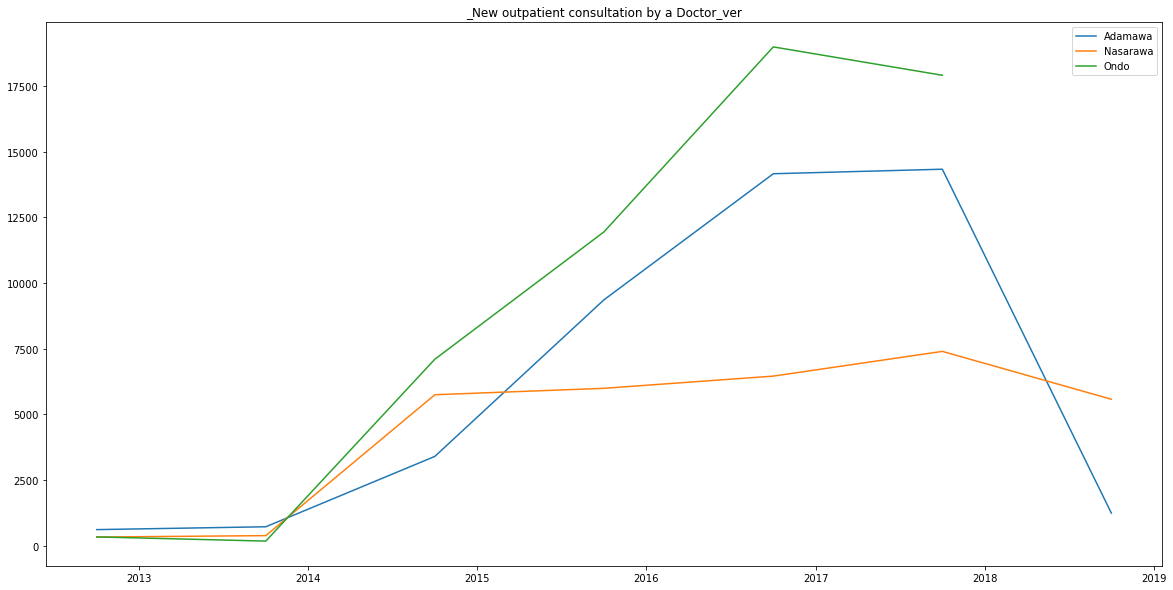

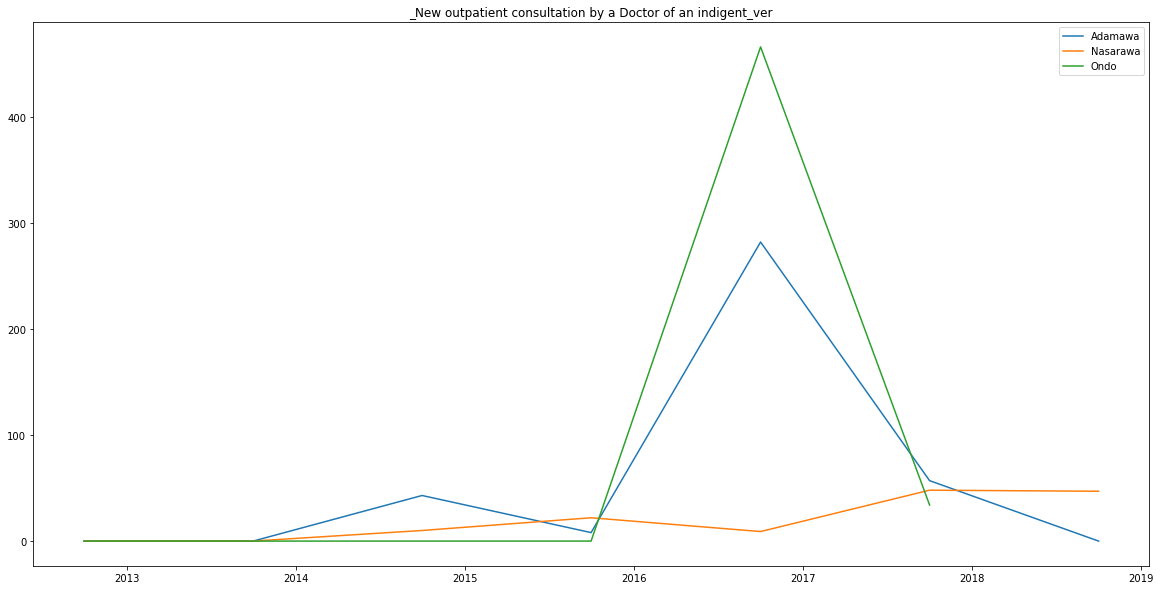

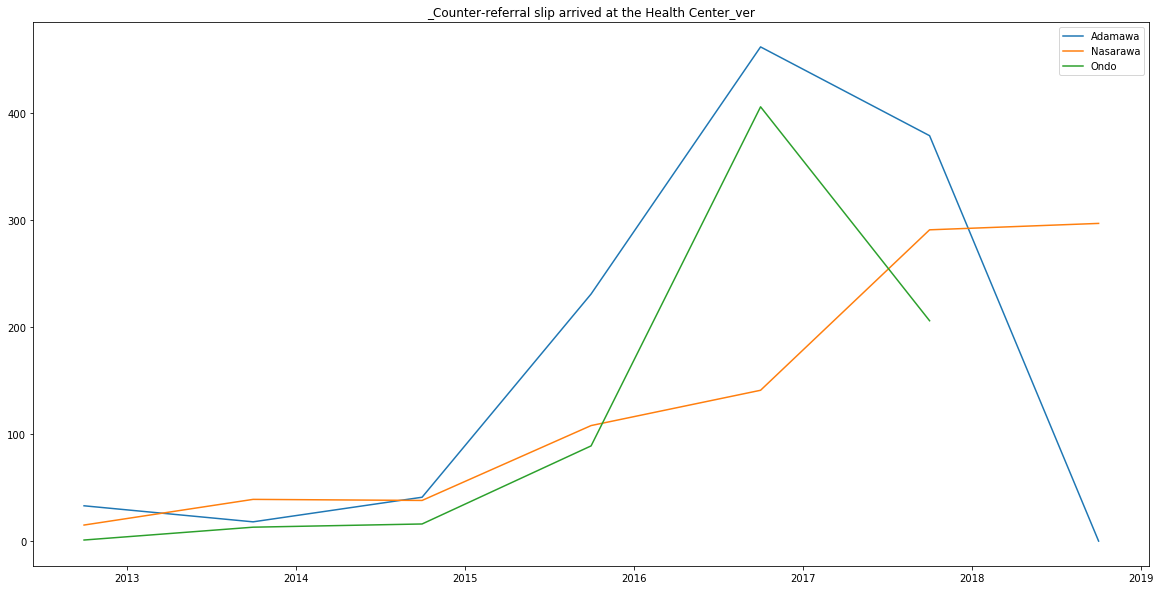

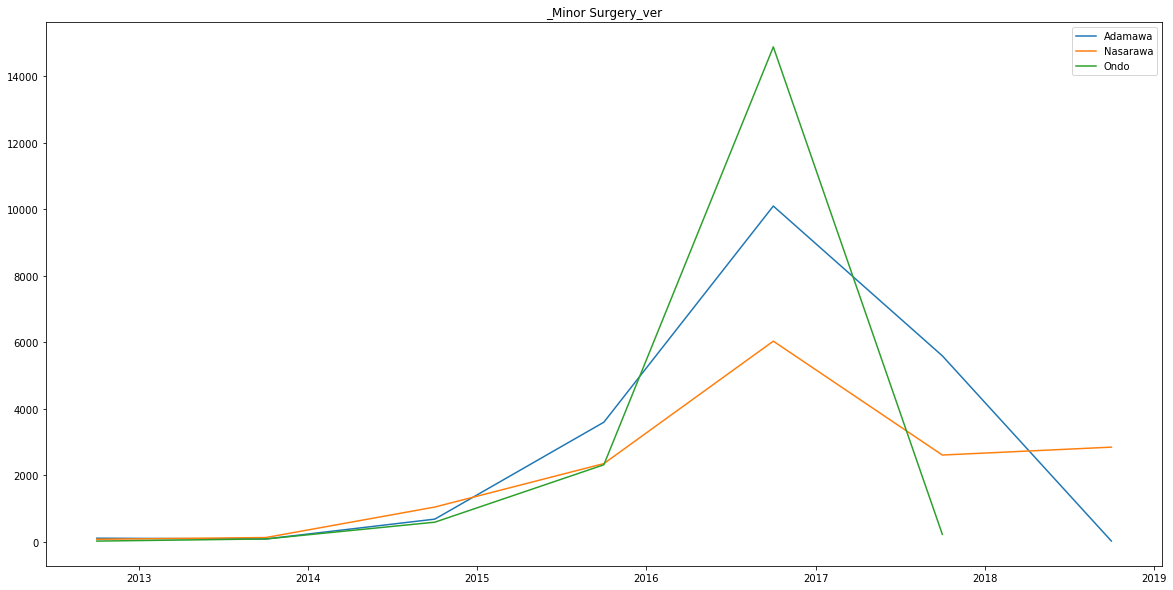

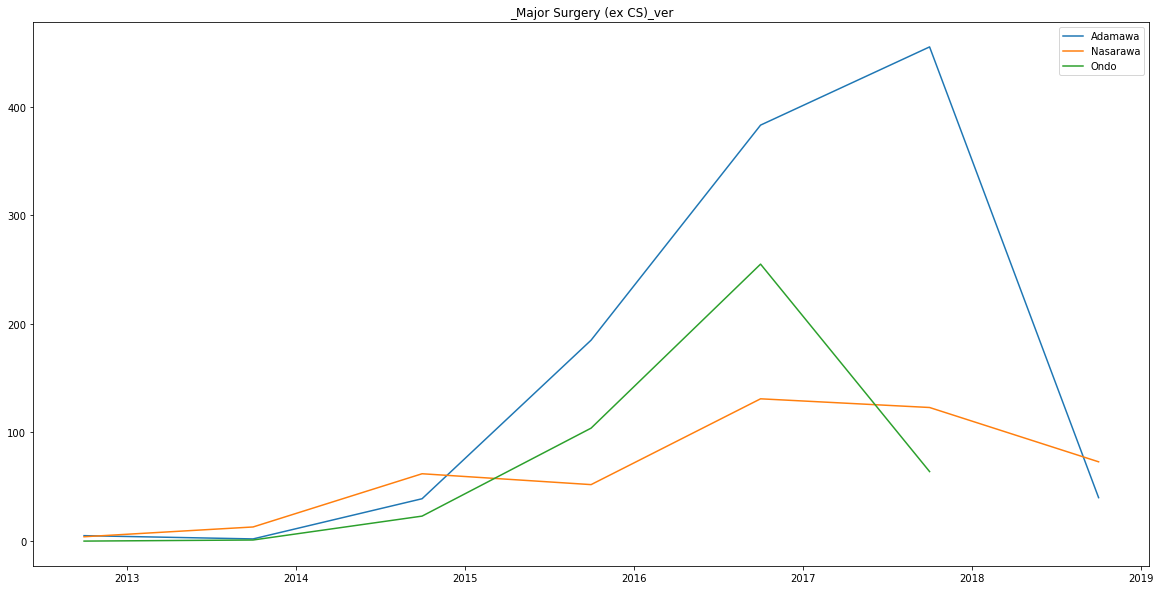

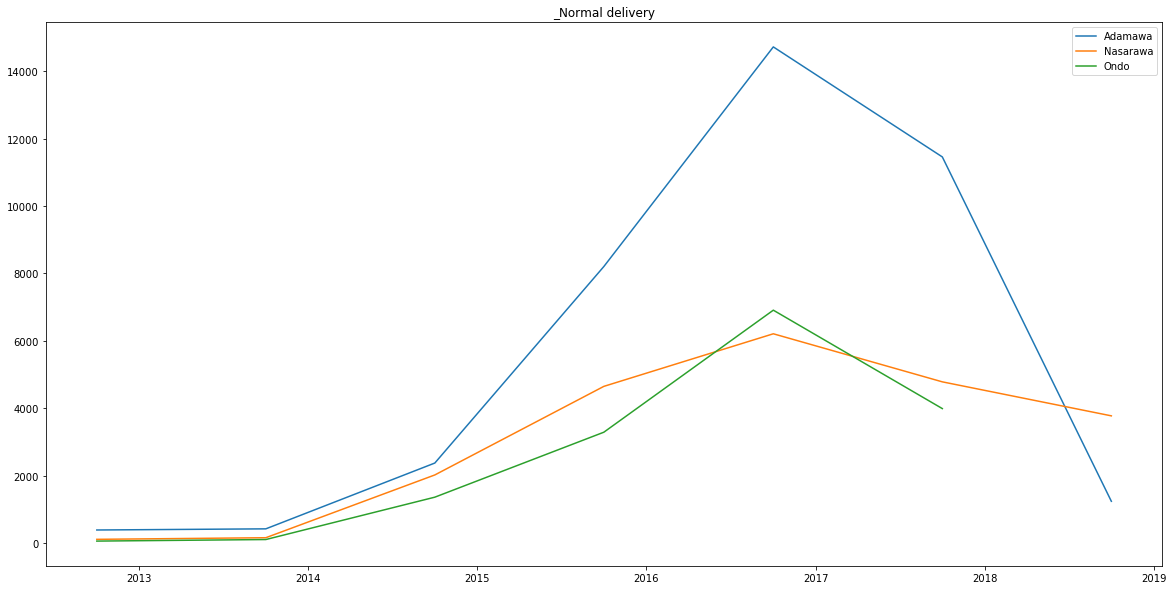

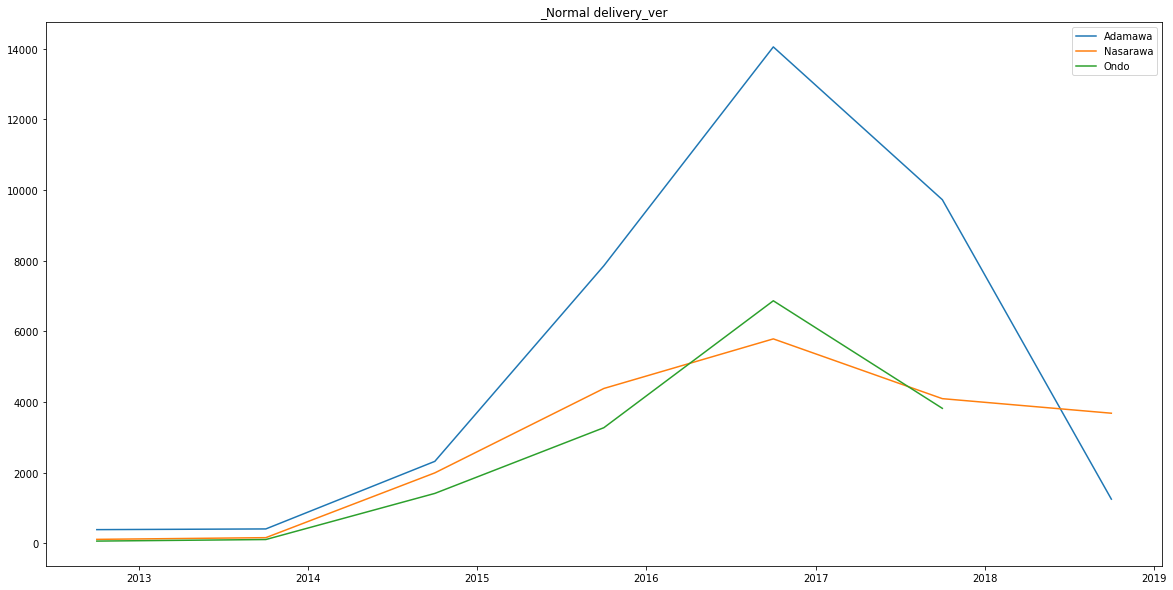

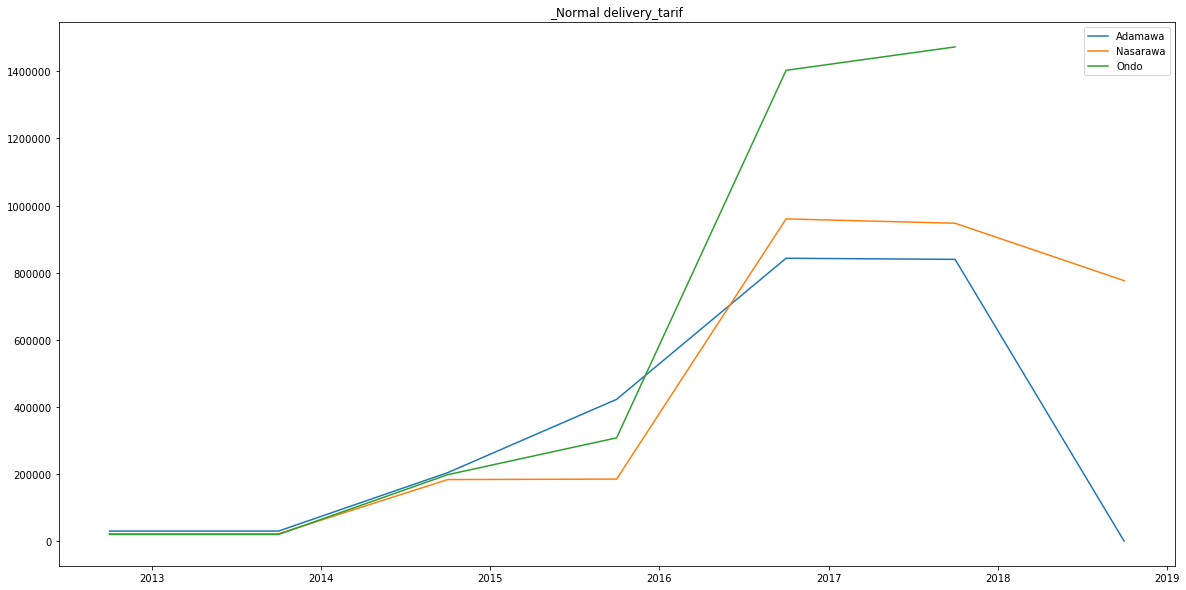

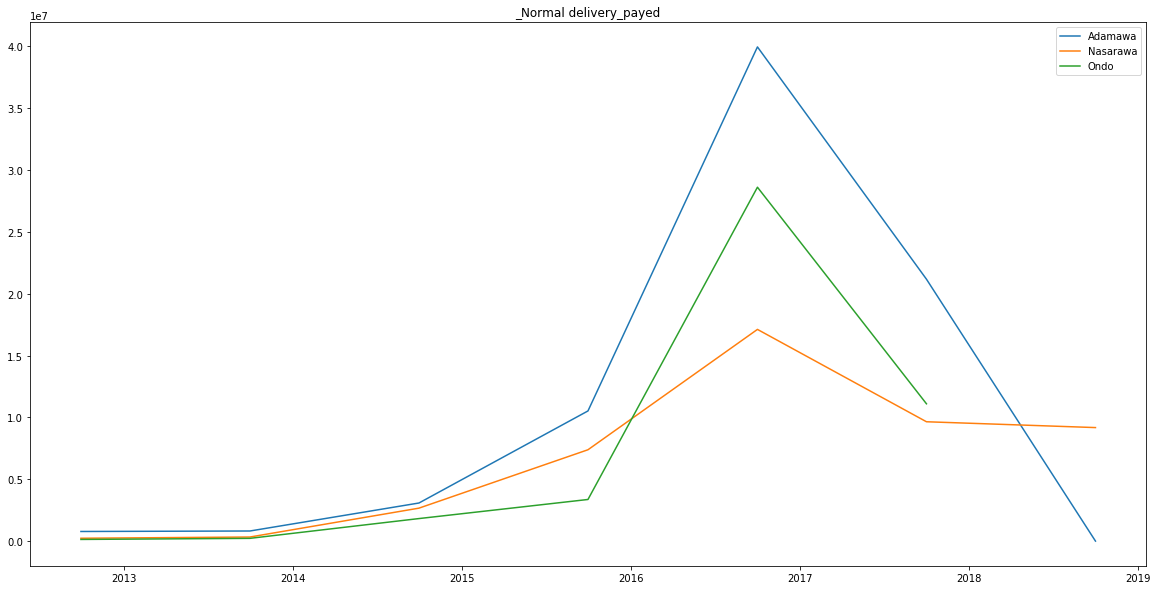

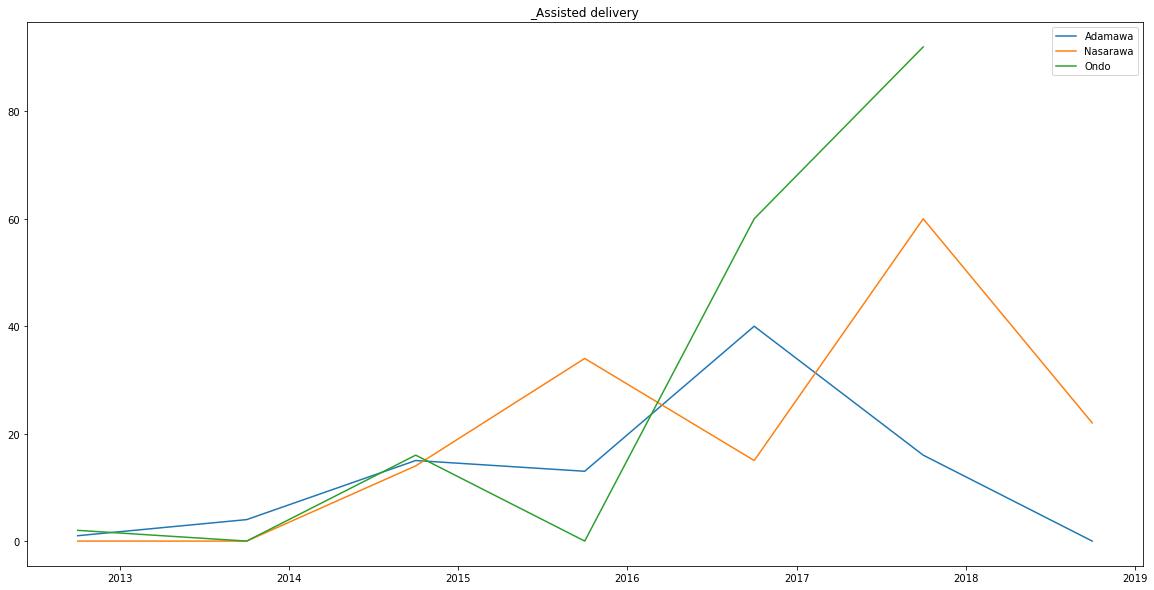

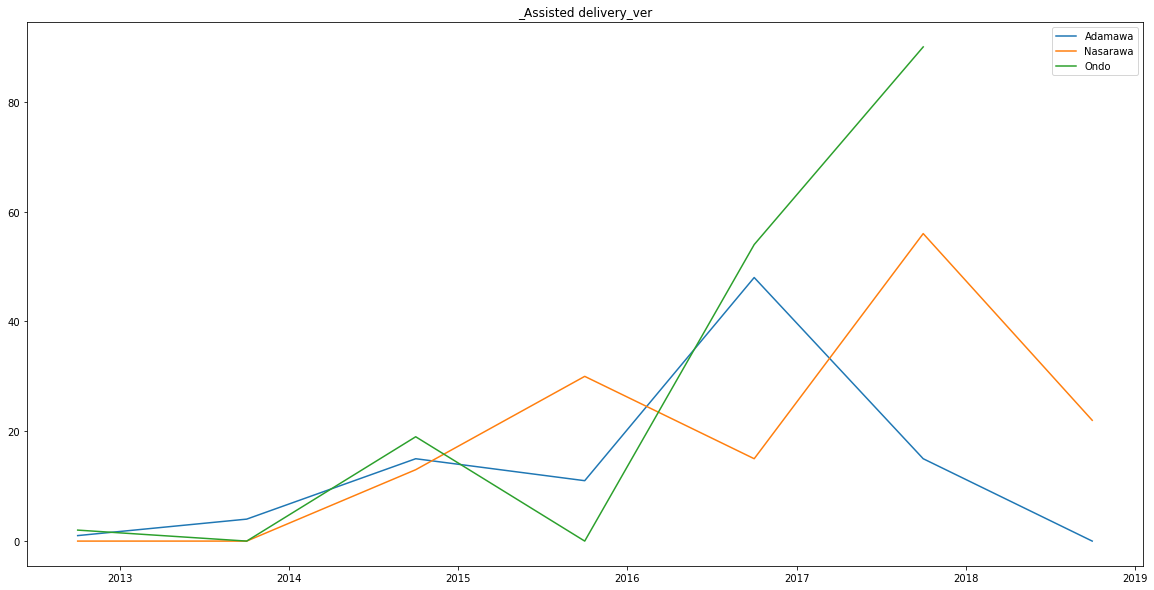

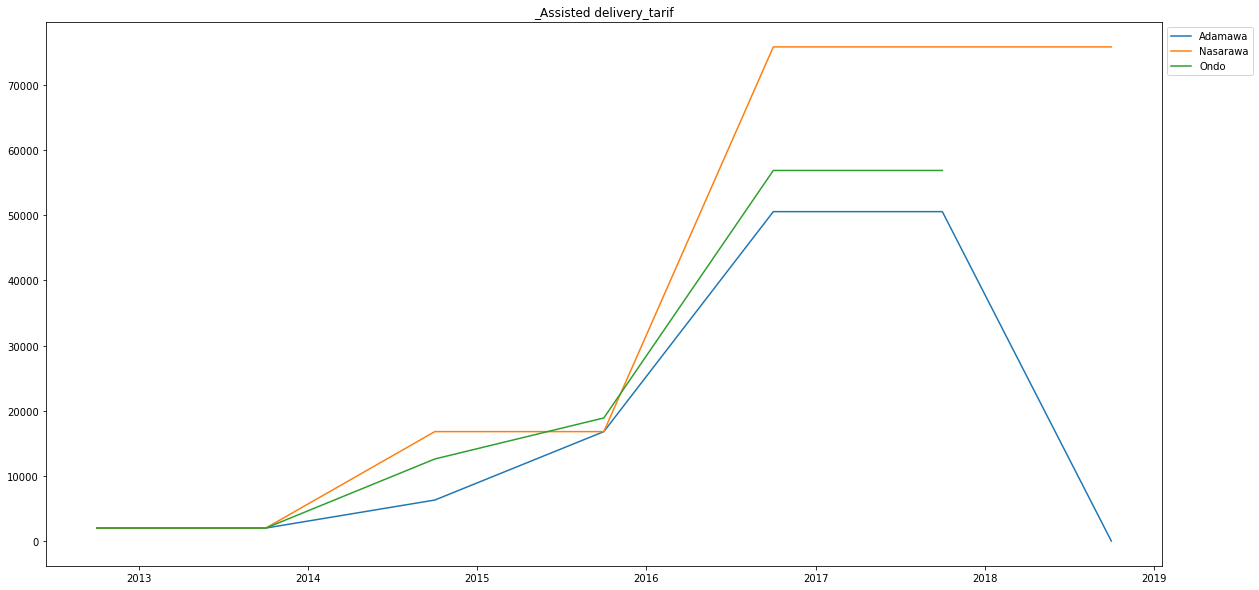

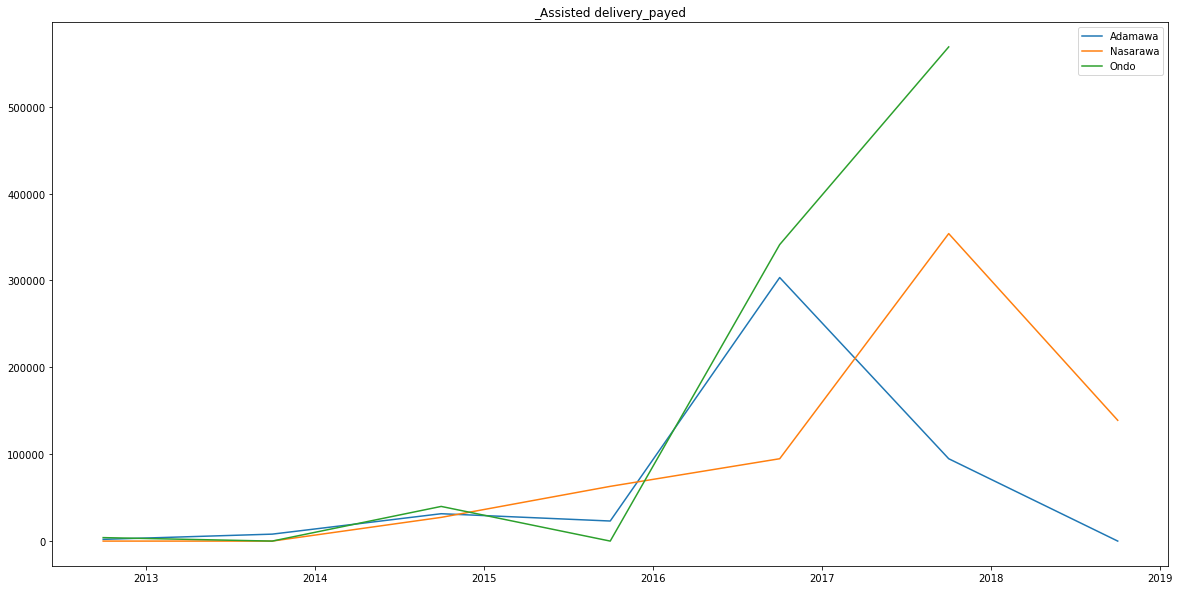

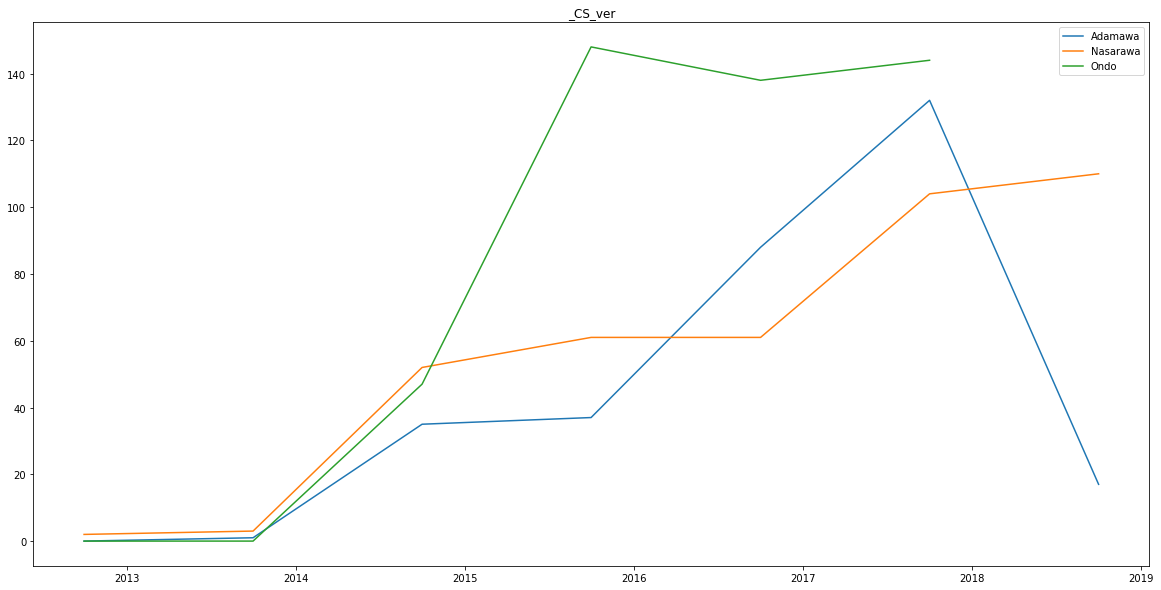

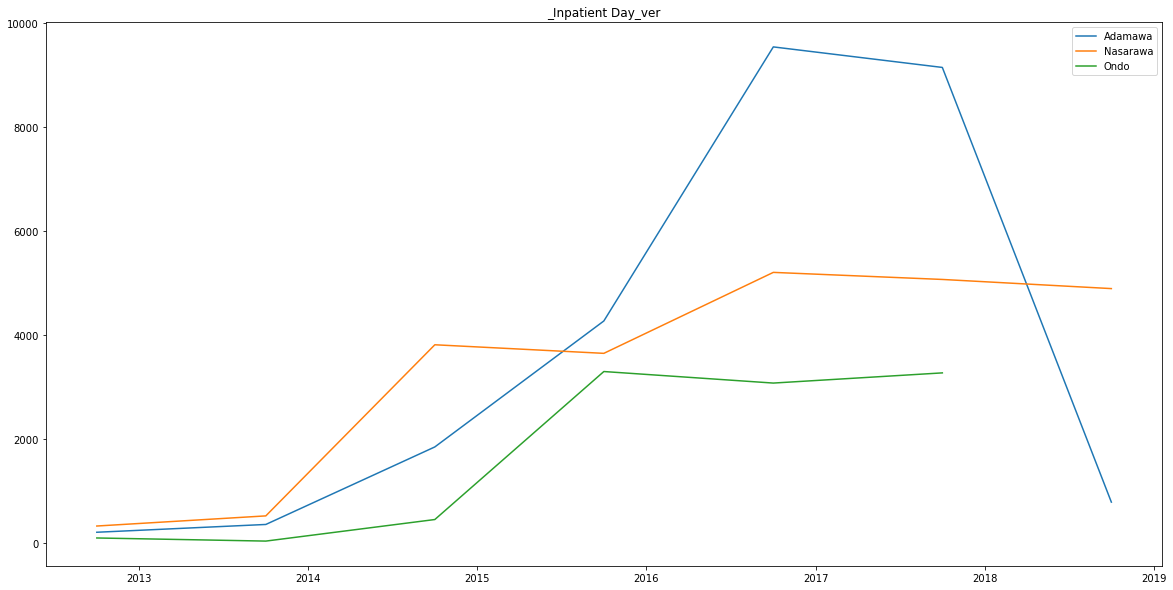

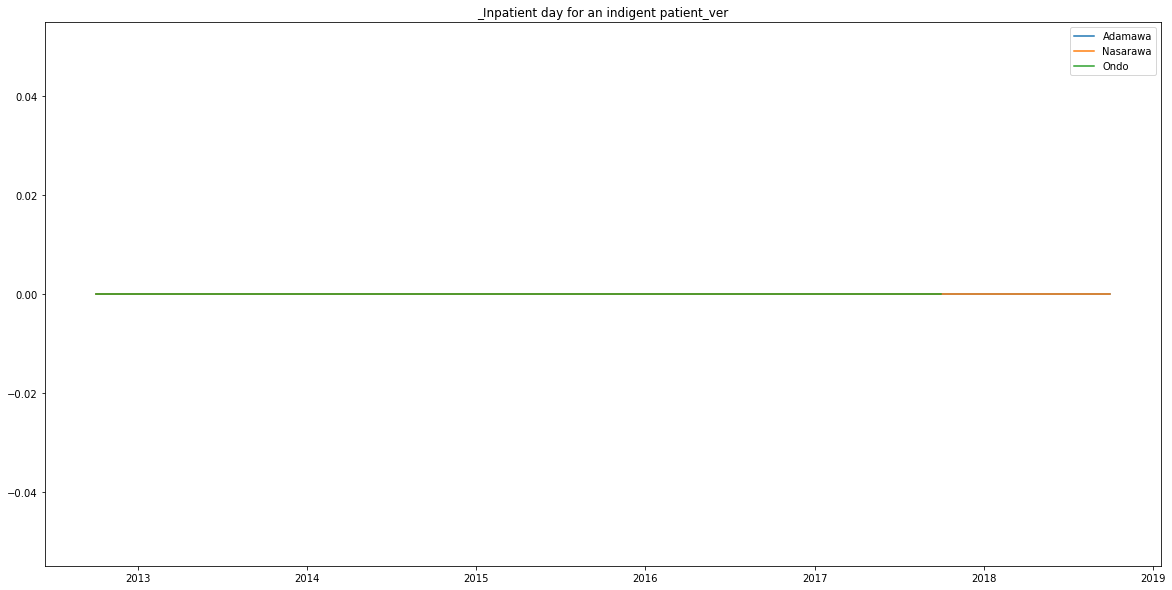

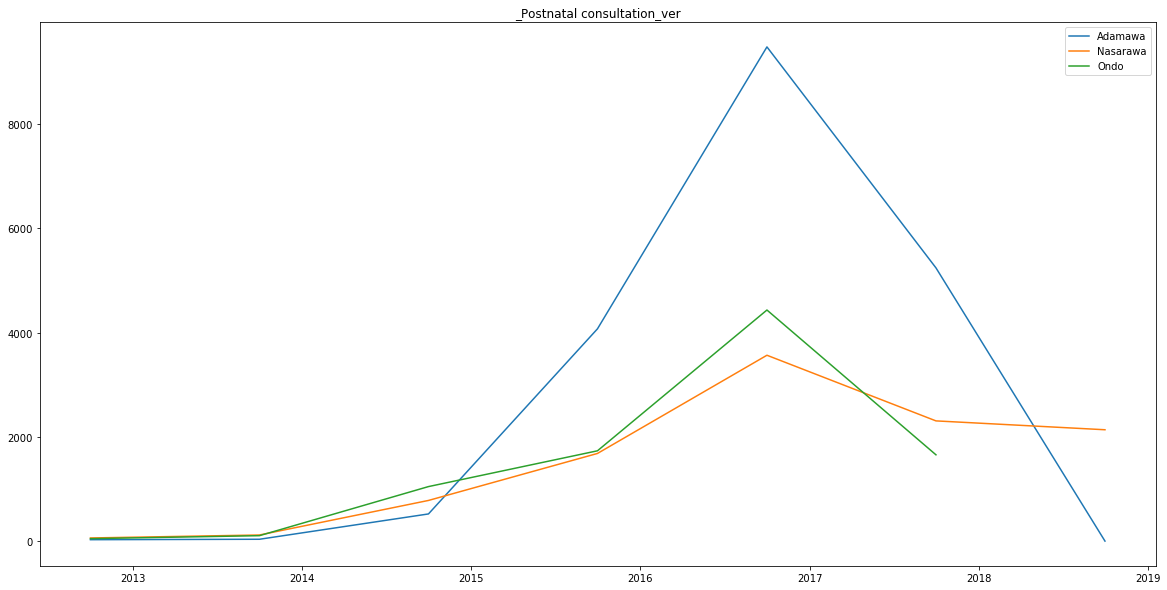

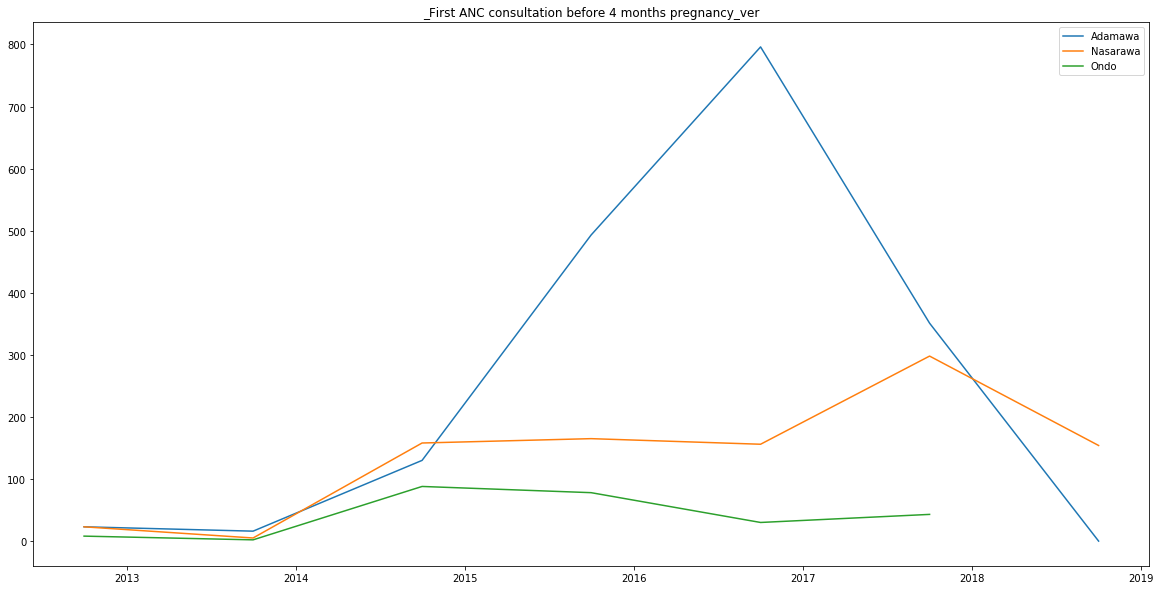

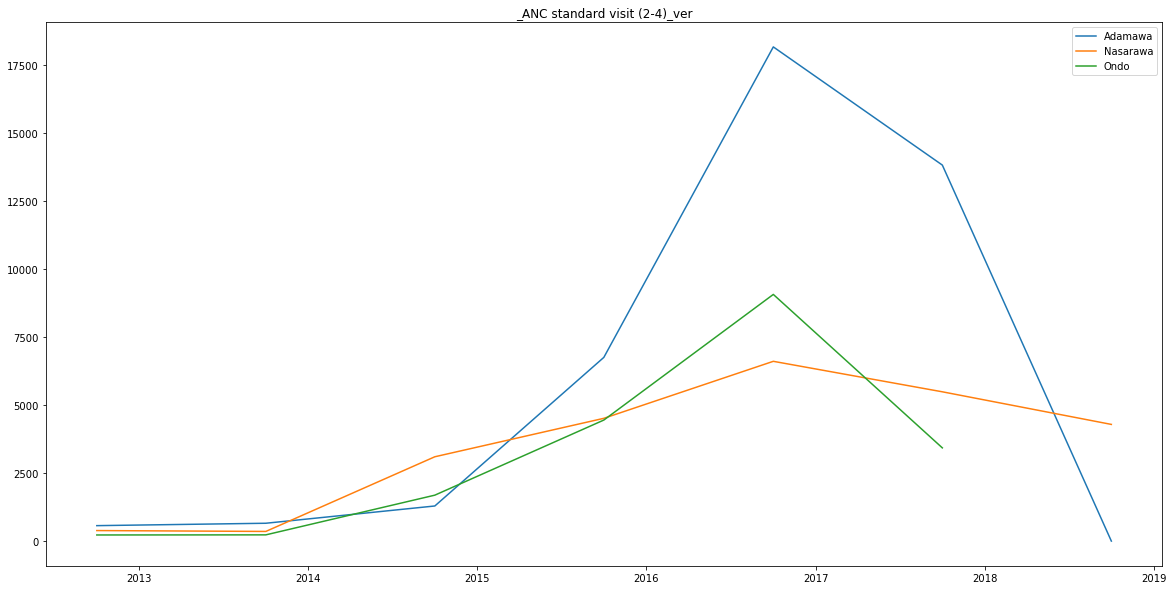

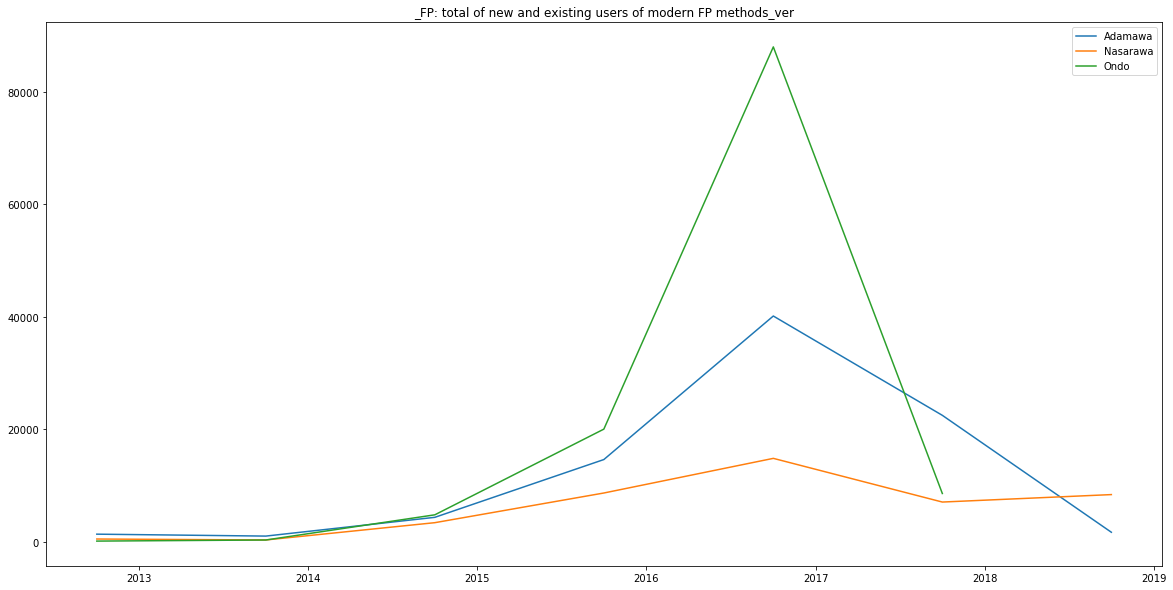

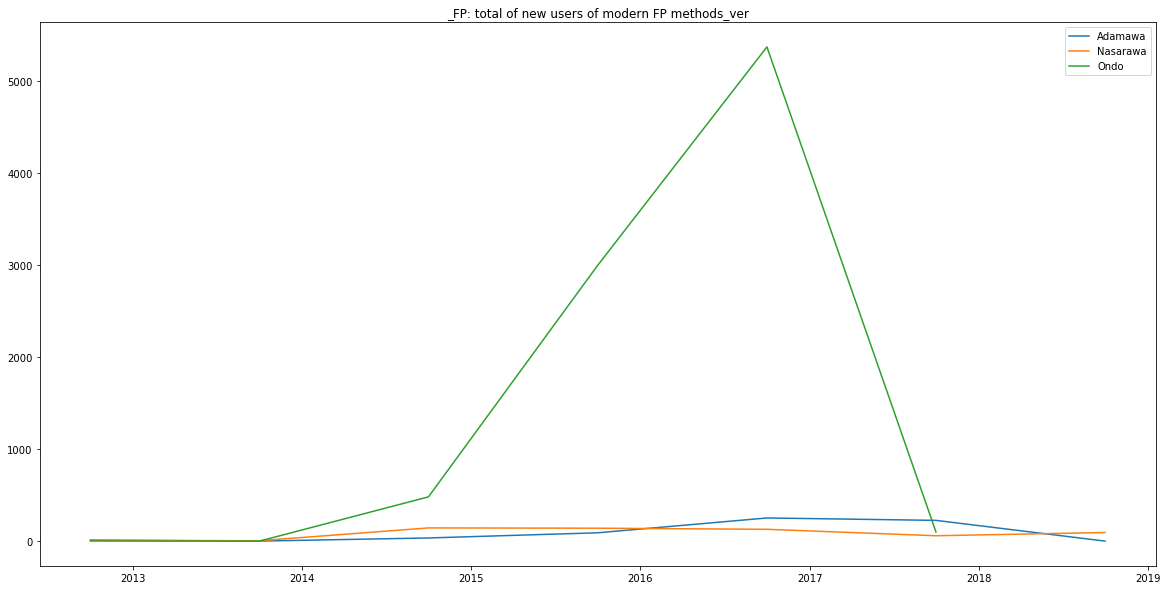

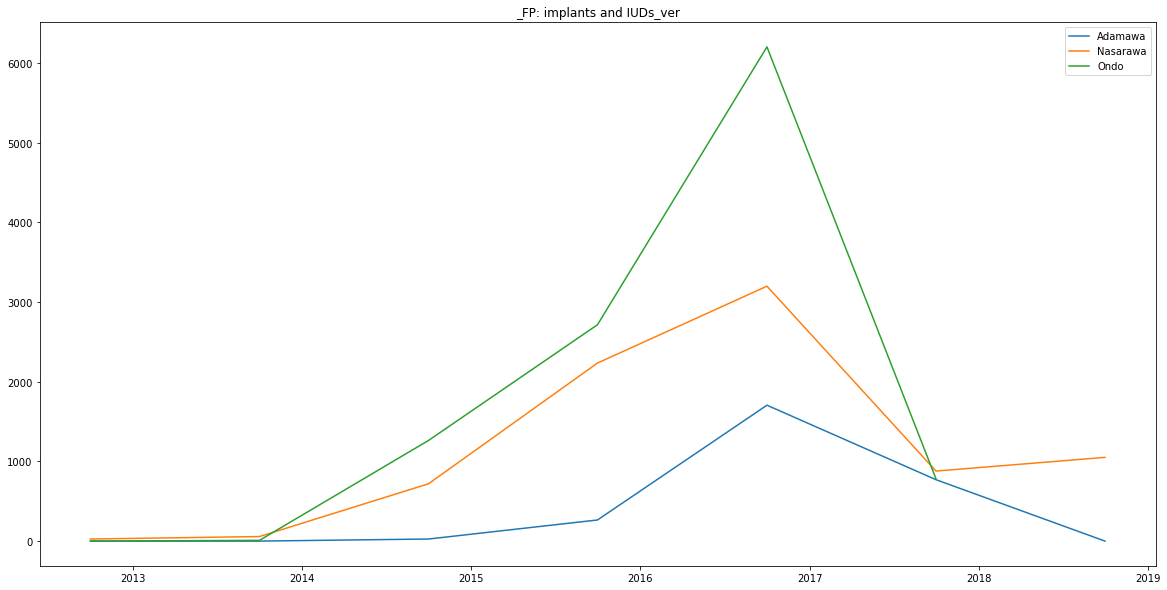

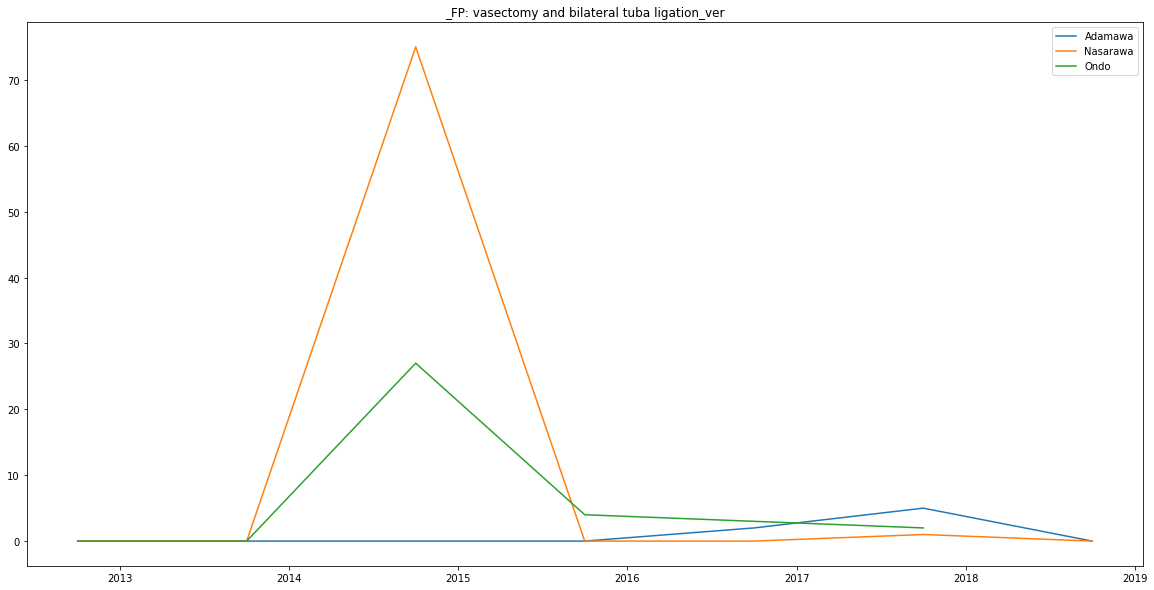

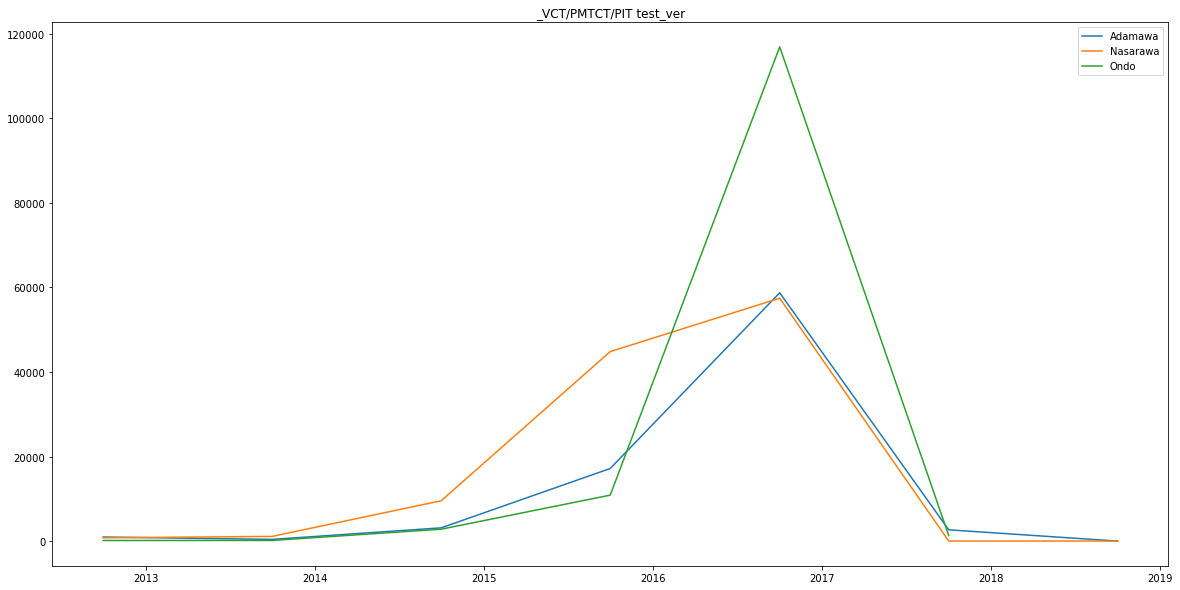

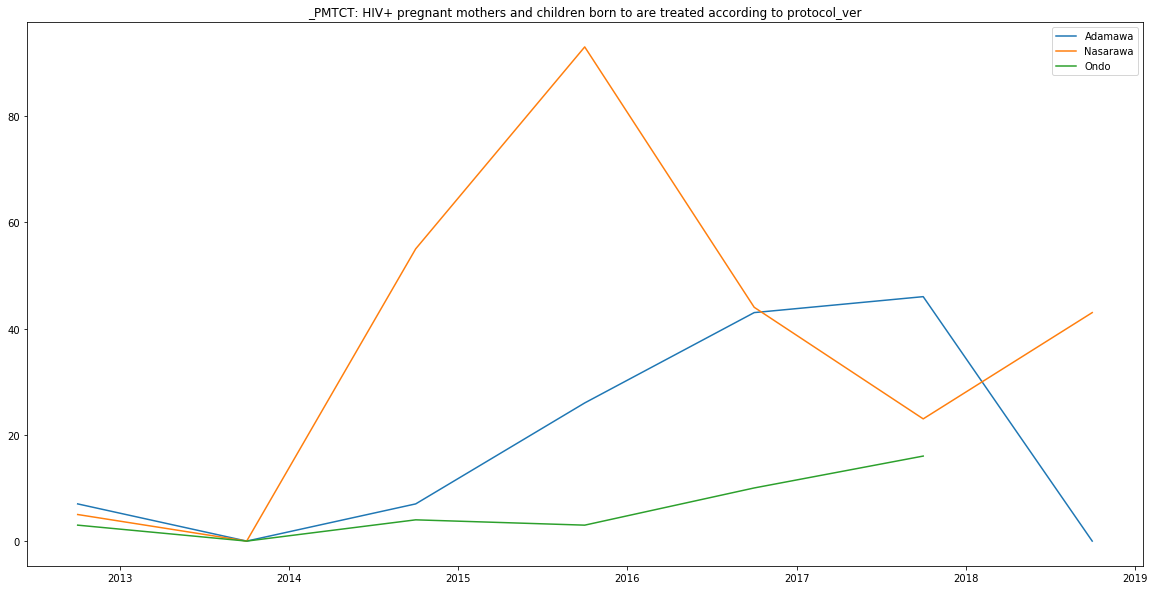

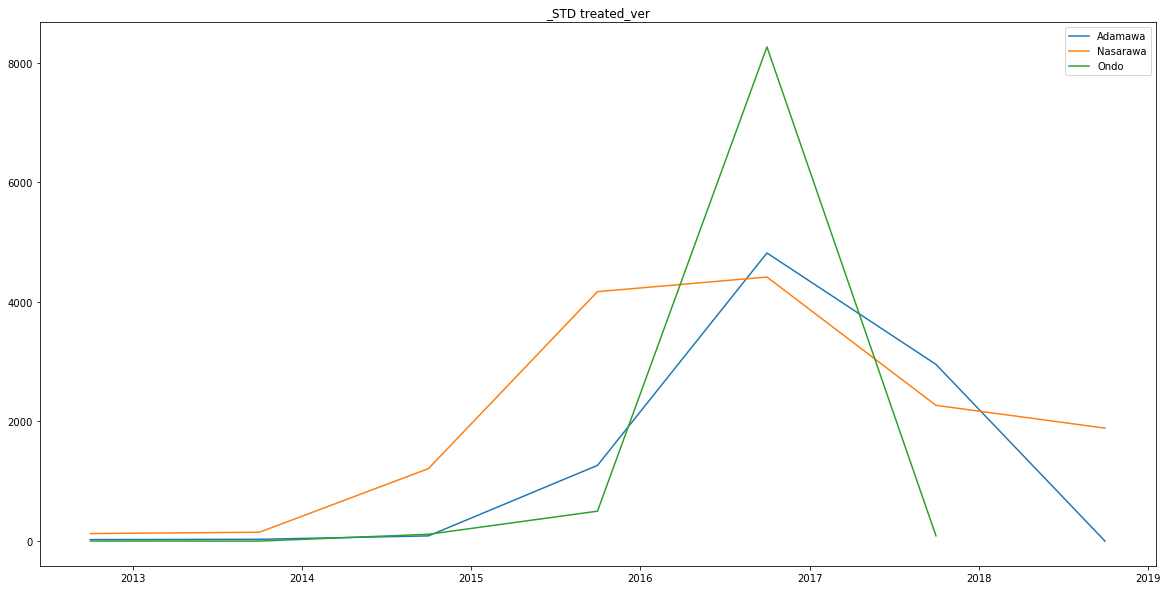

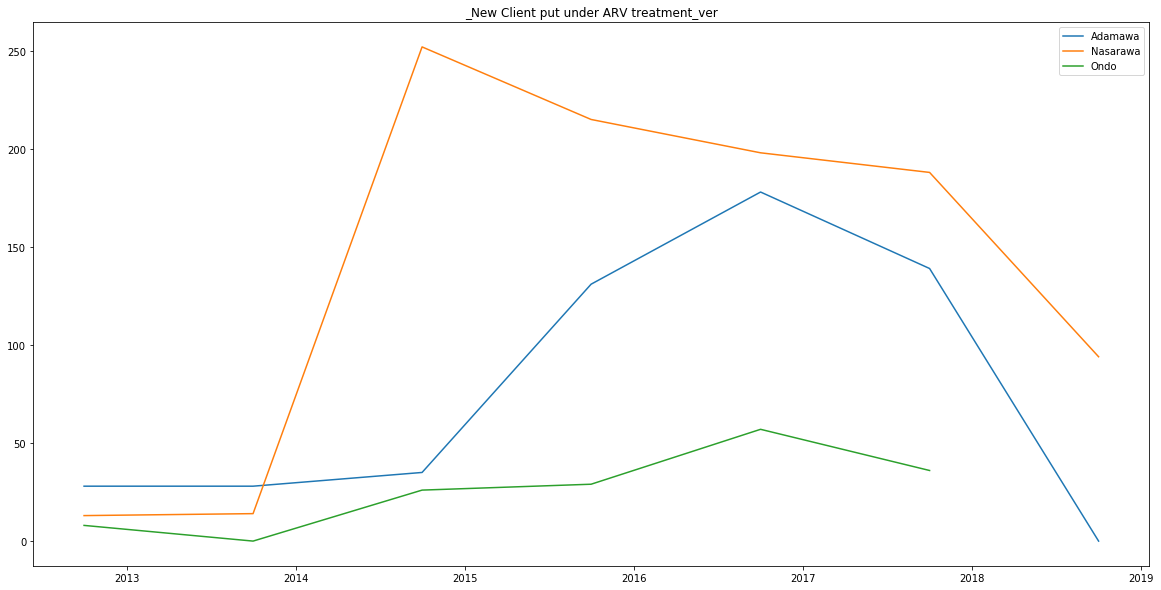

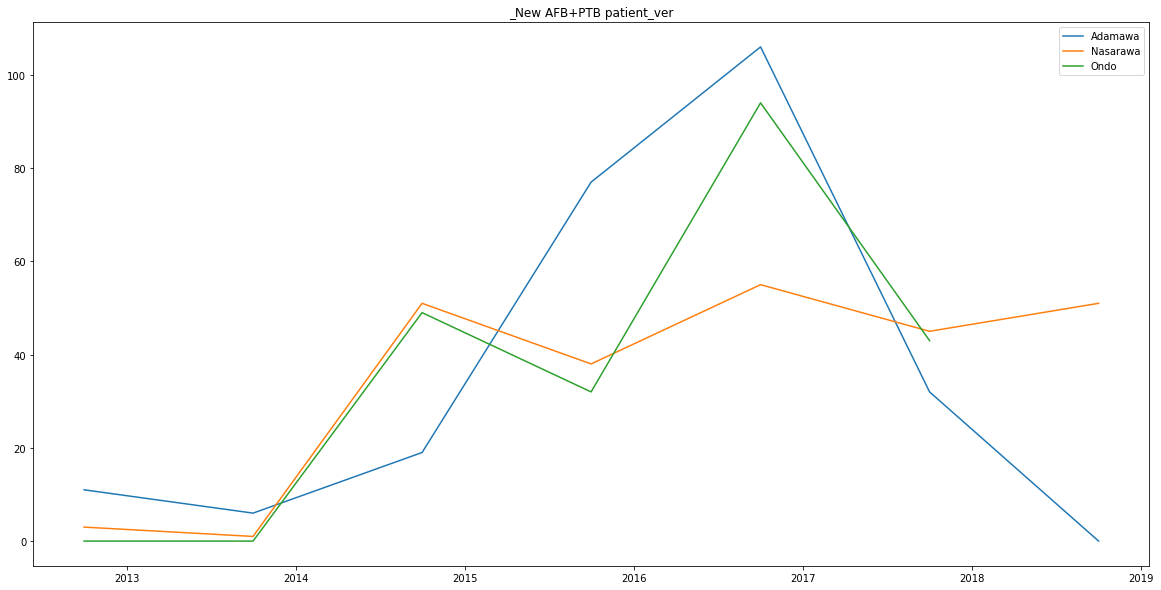

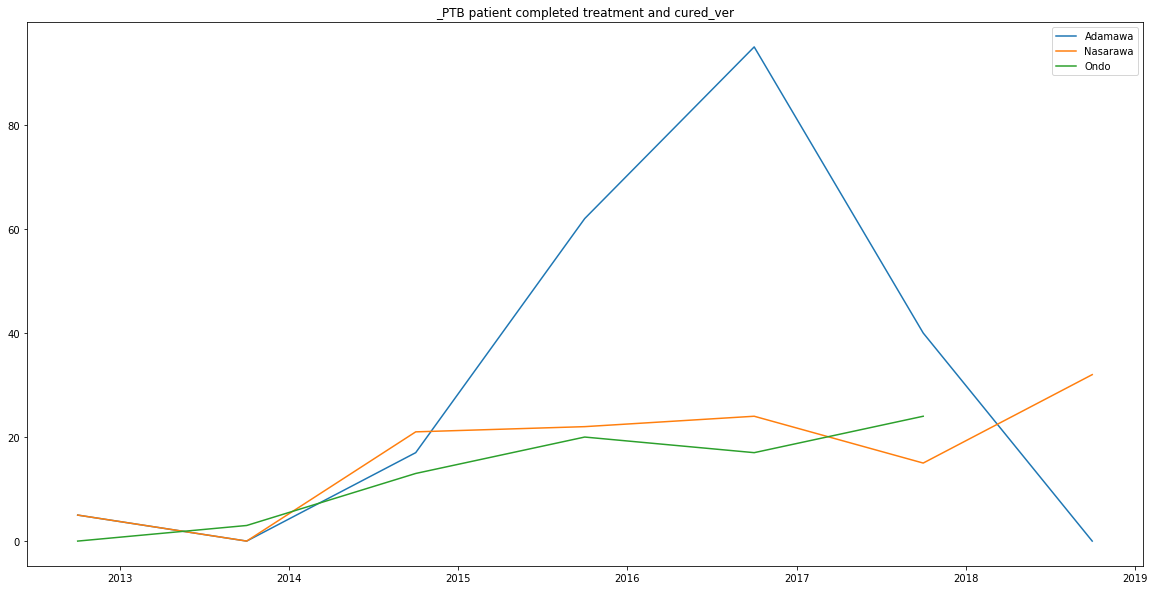

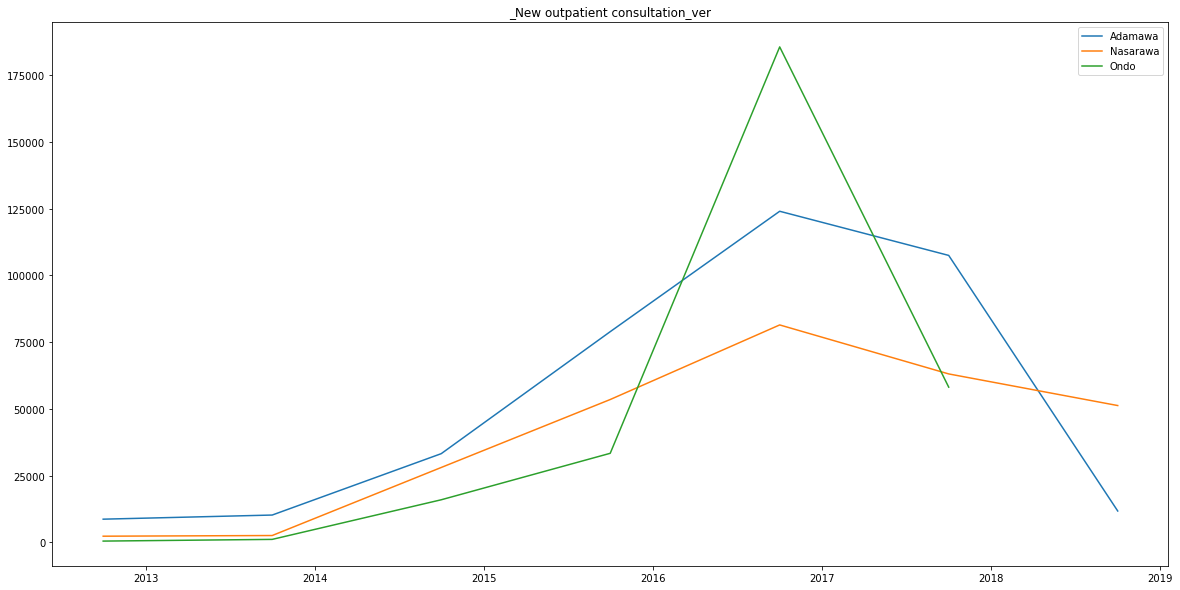

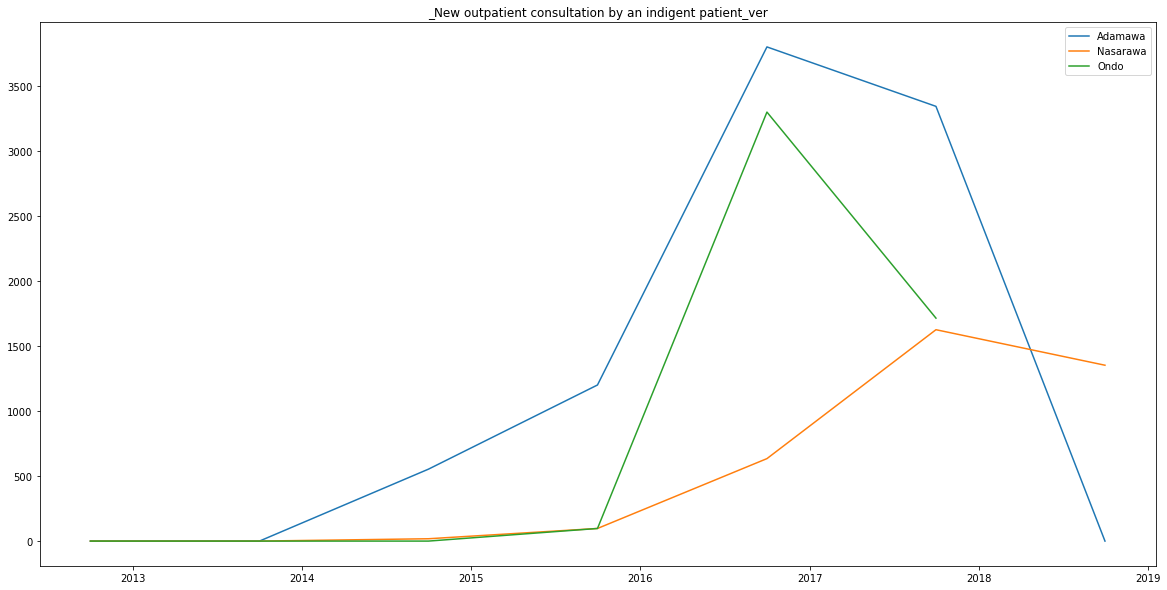

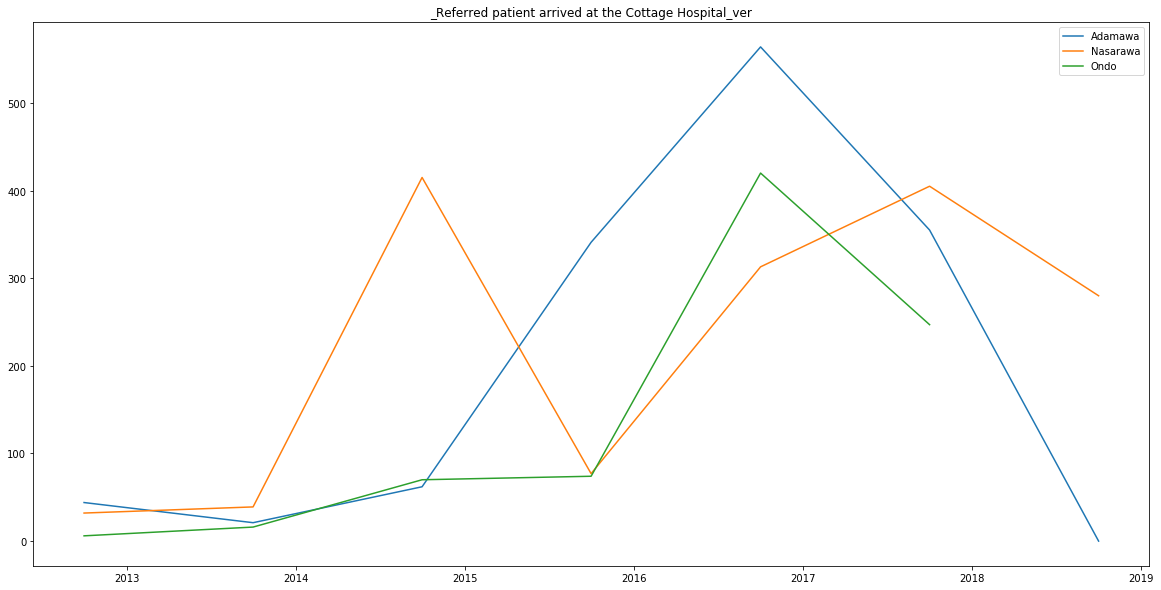

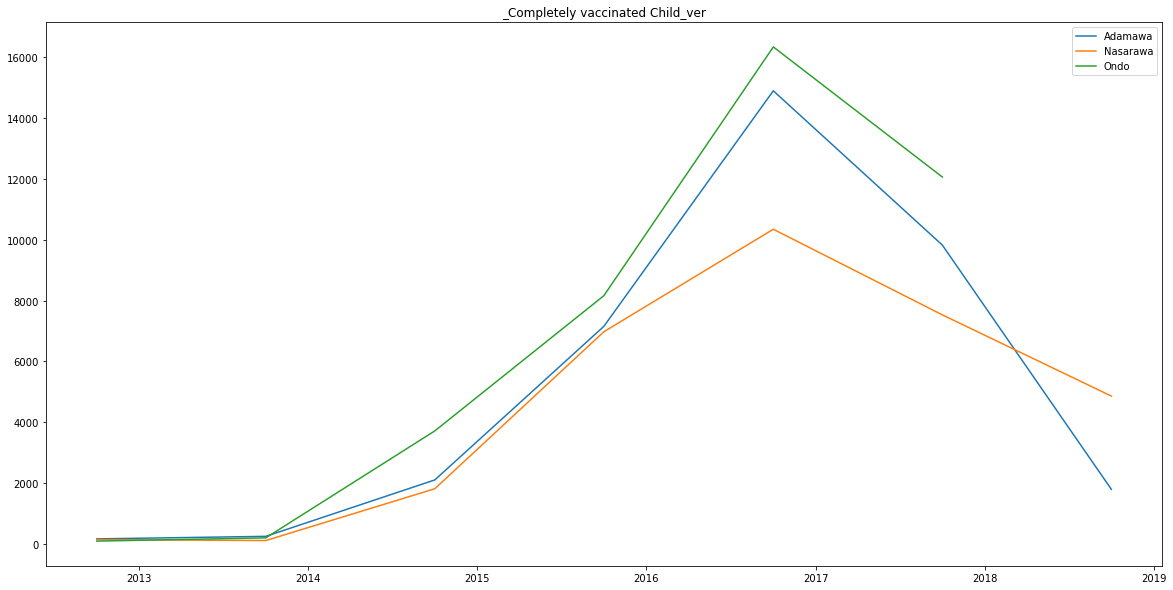

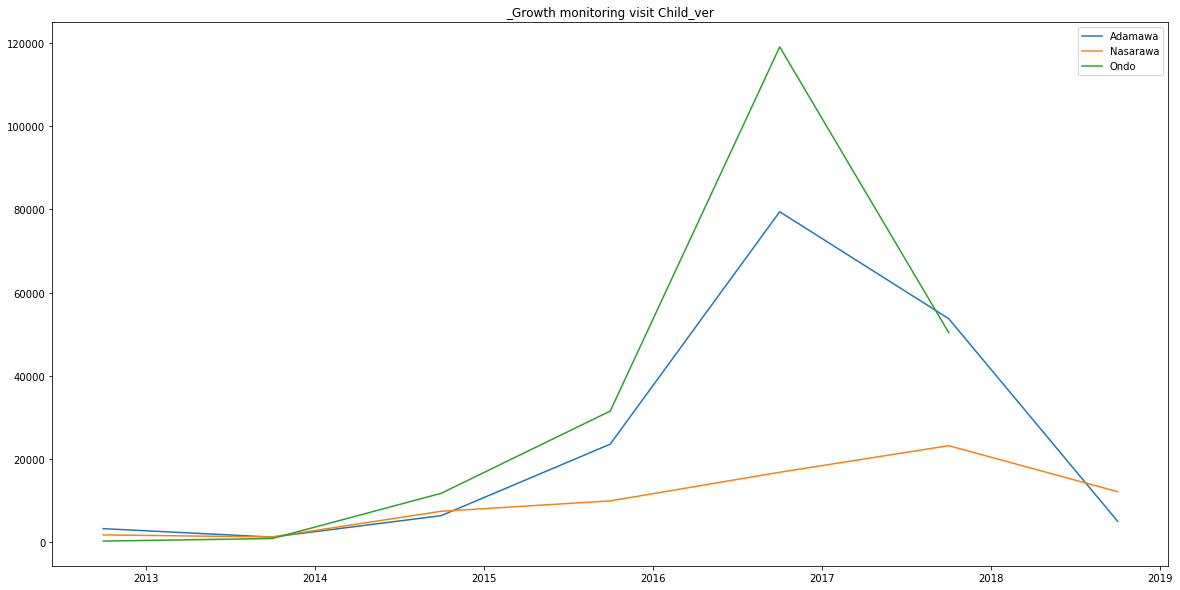

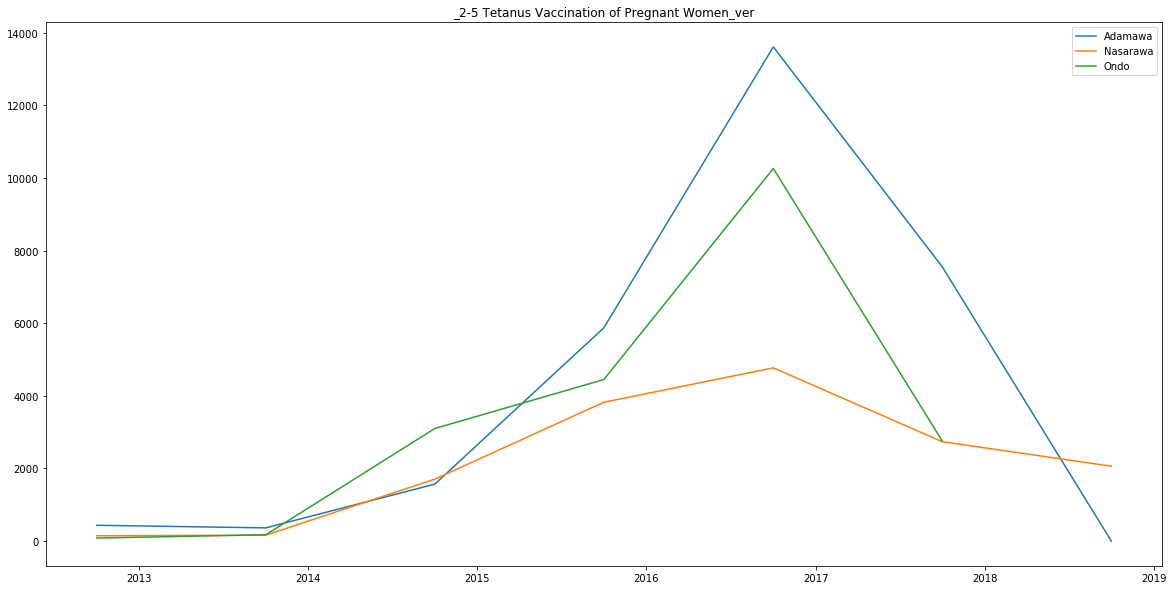

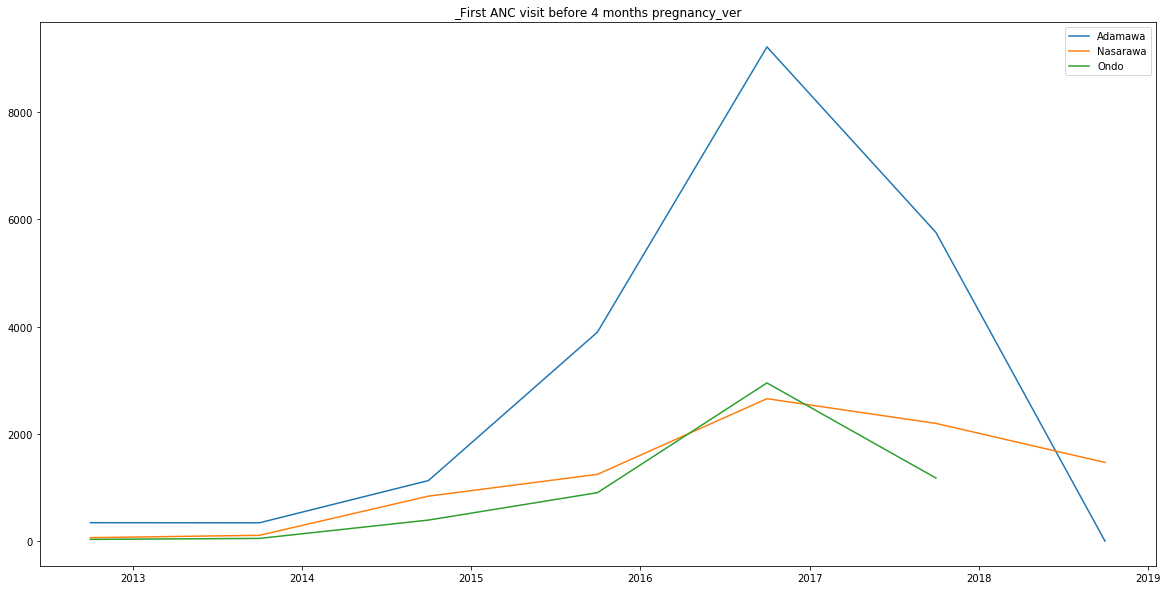

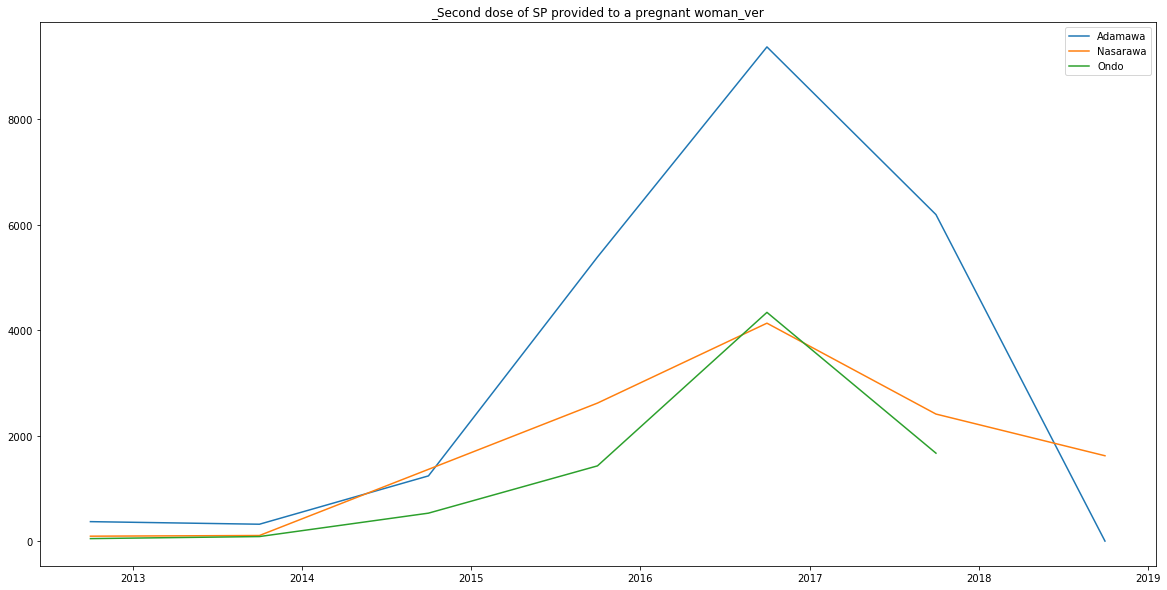

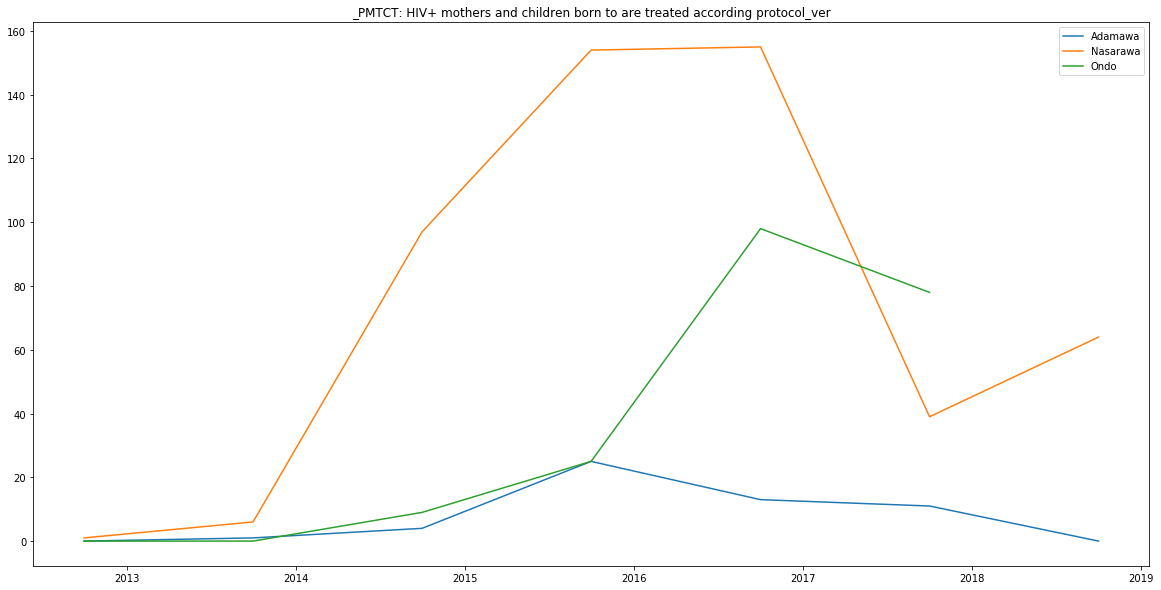

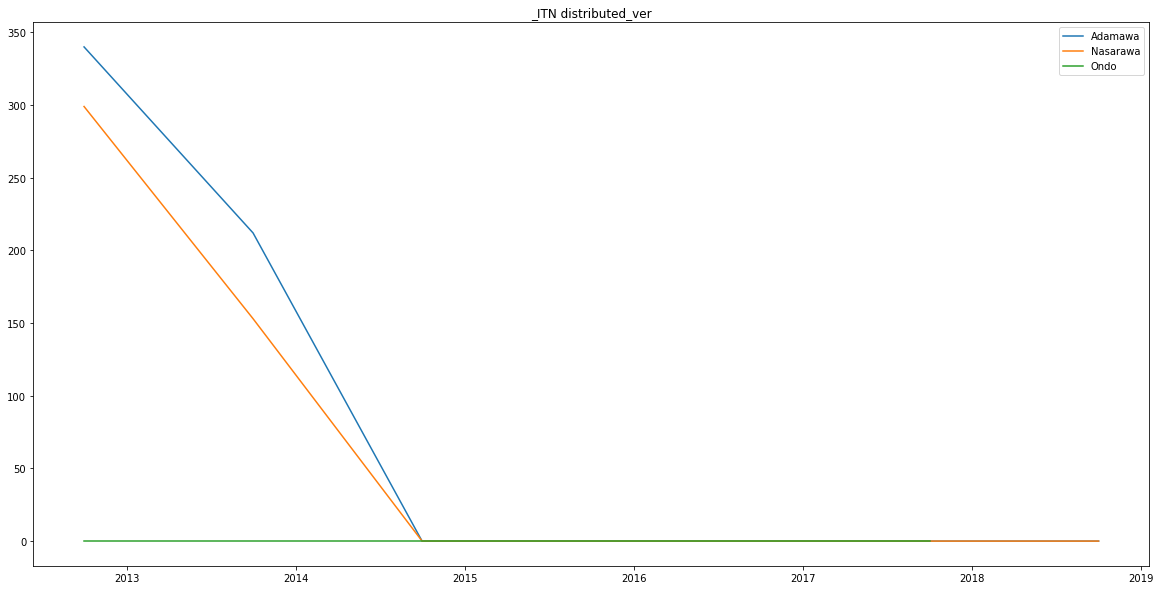

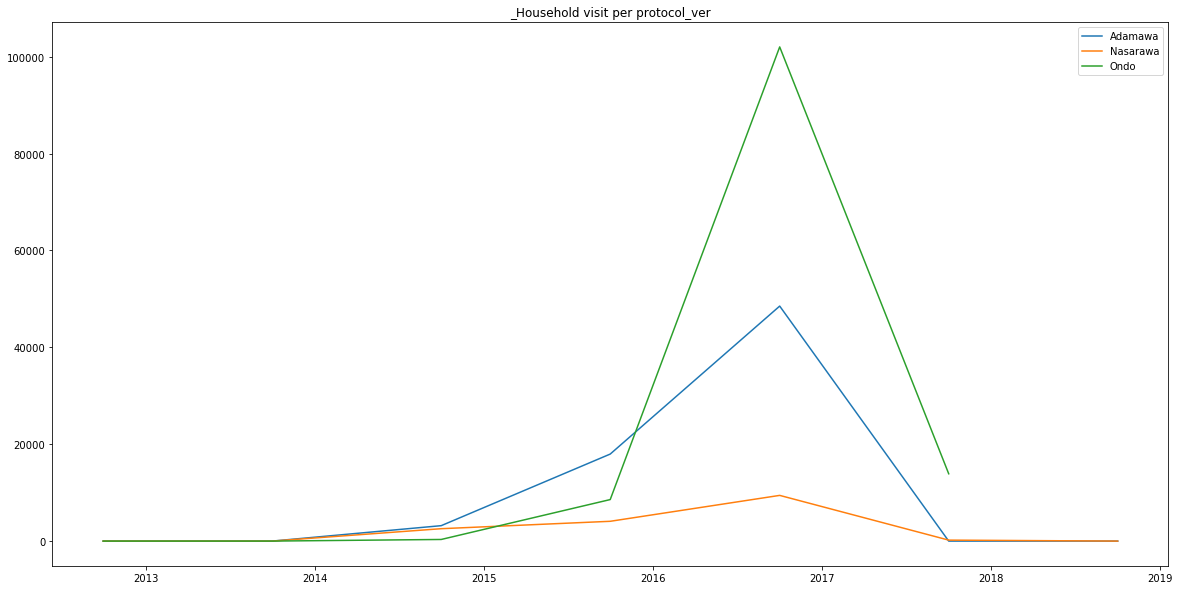

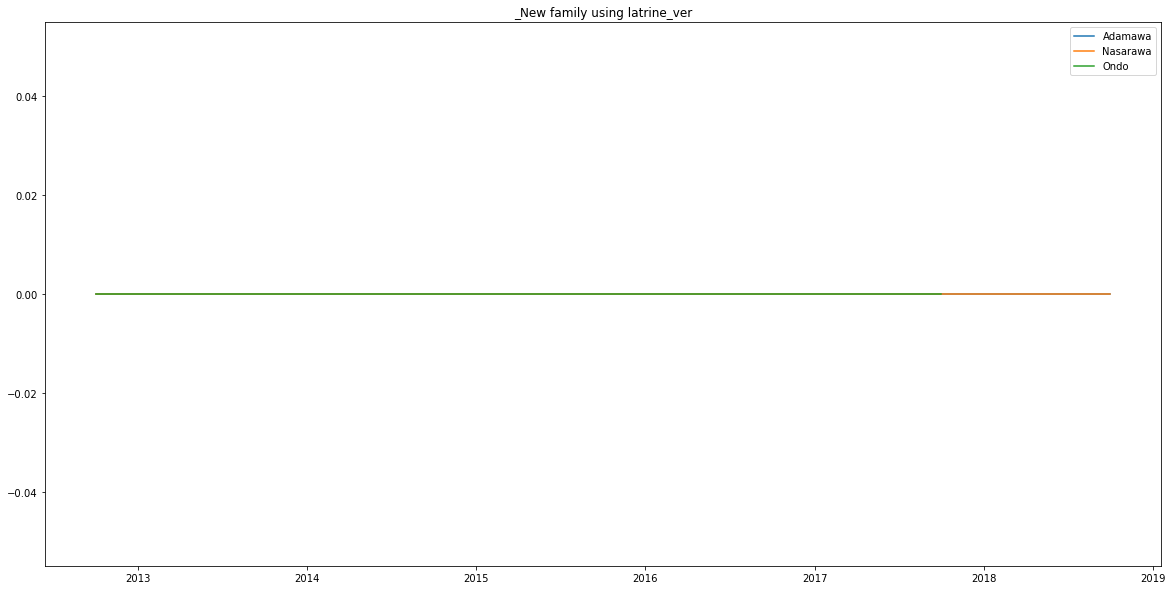

In [95]:
for data_element in interest_col: #[x for x in list(variable_dict.keys()) if x in orbf_quart.columns]:
    plt.figure(figsize=(20,10))
    for state in orbf_quart.State.unique():
        state_plot = orbf_quart[orbf_quart.State == state]
        plt.plot(state_plot.quarter, state_plot[data_element], label = state)
        plt.legend(bbox_to_anchor = (1,1))
        plt.title(data_element)
    plt.show()
    plt.close()

# Evolution of service provision at national level

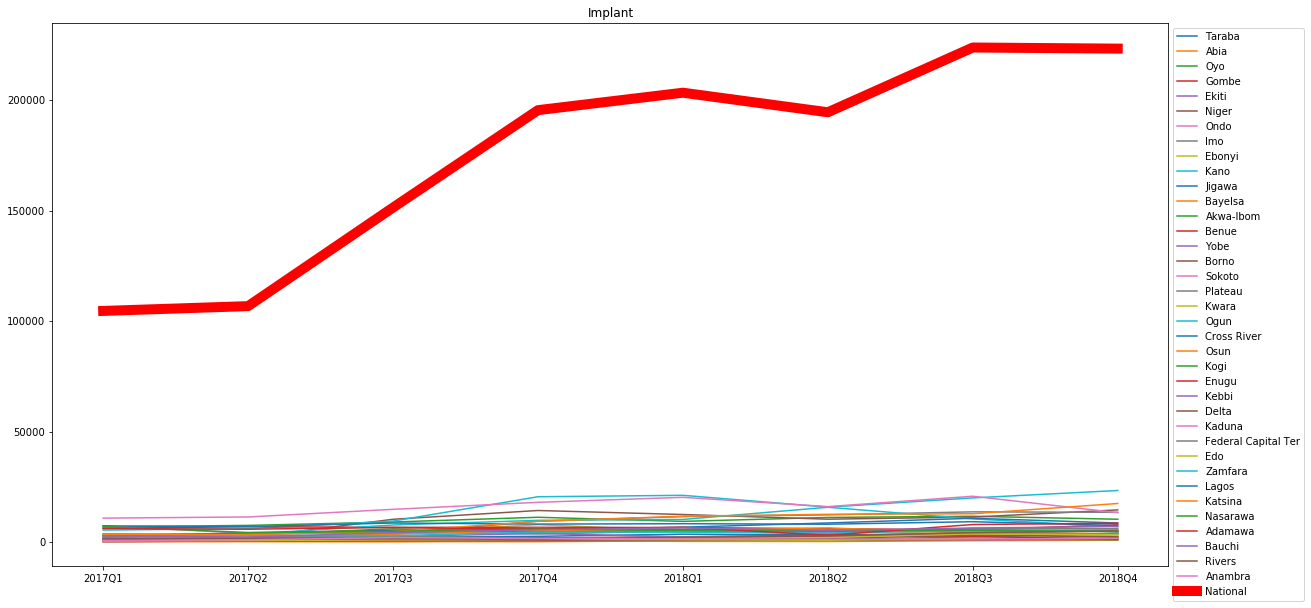

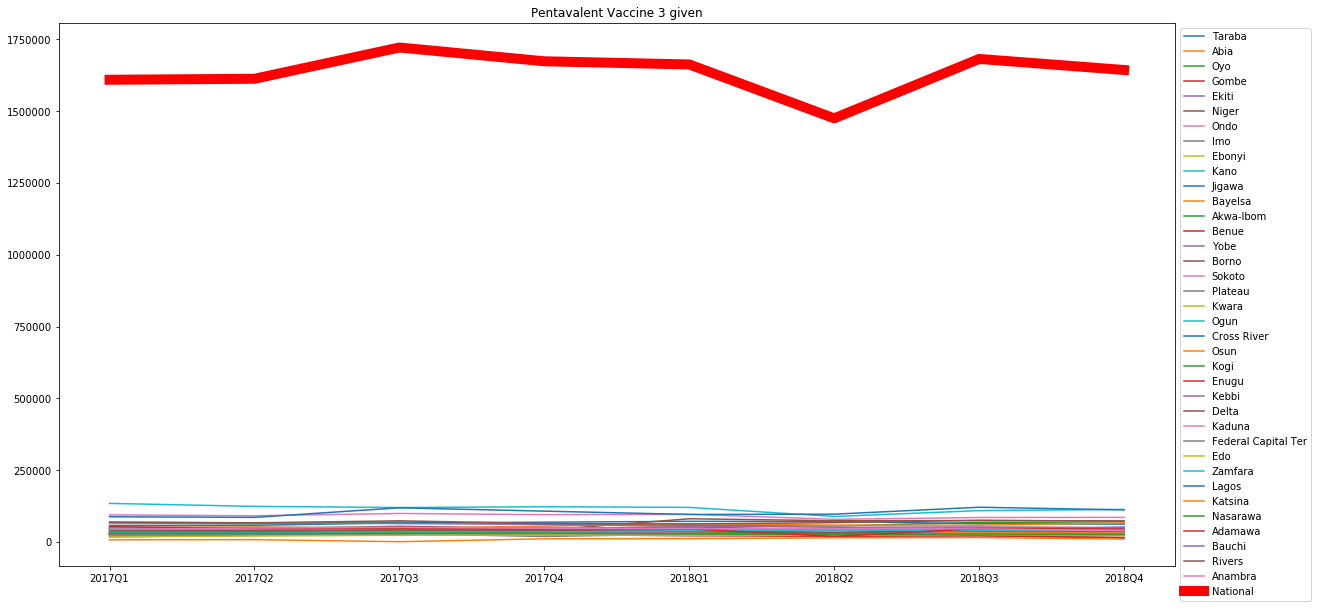

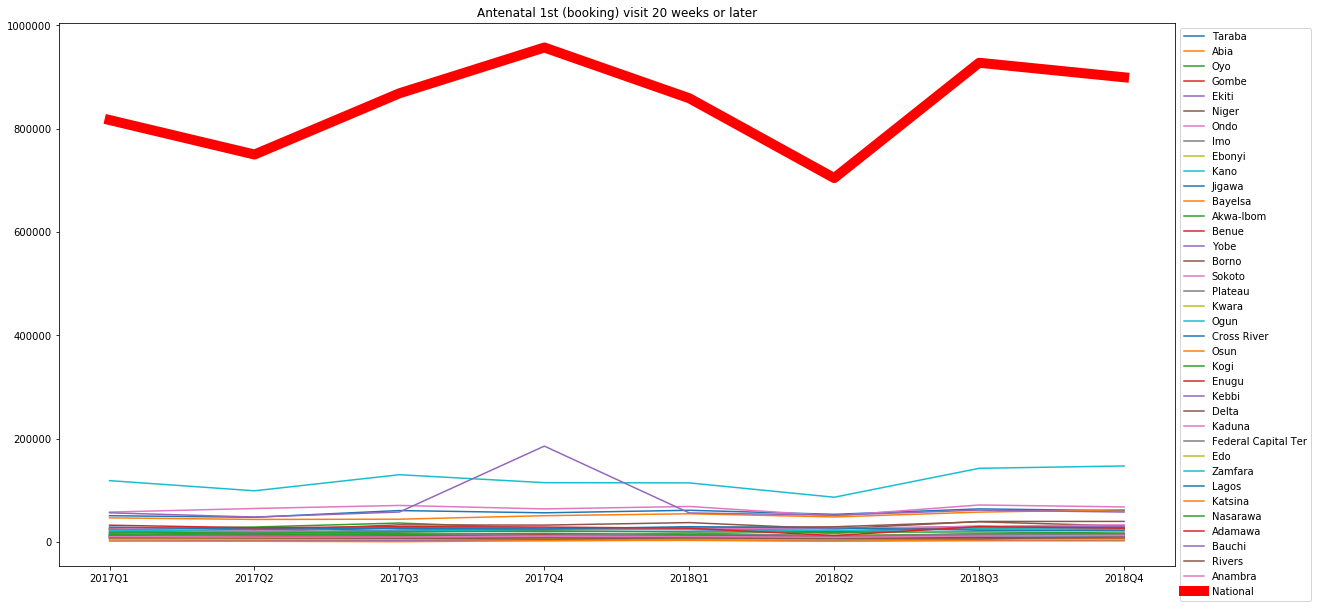

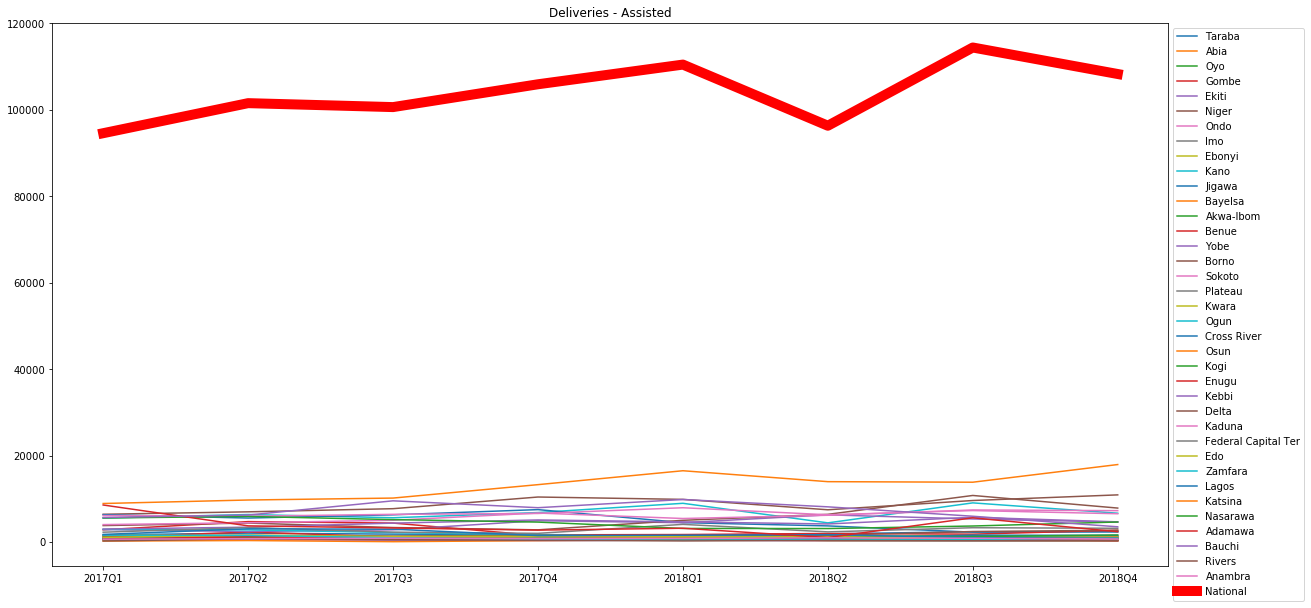

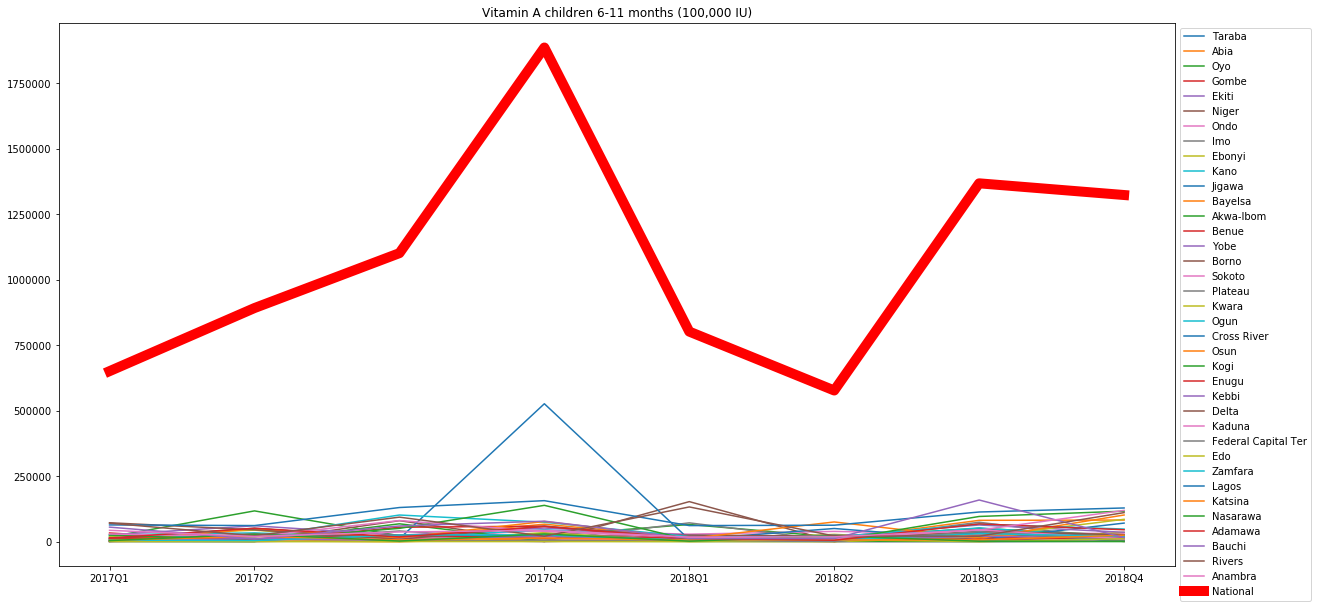

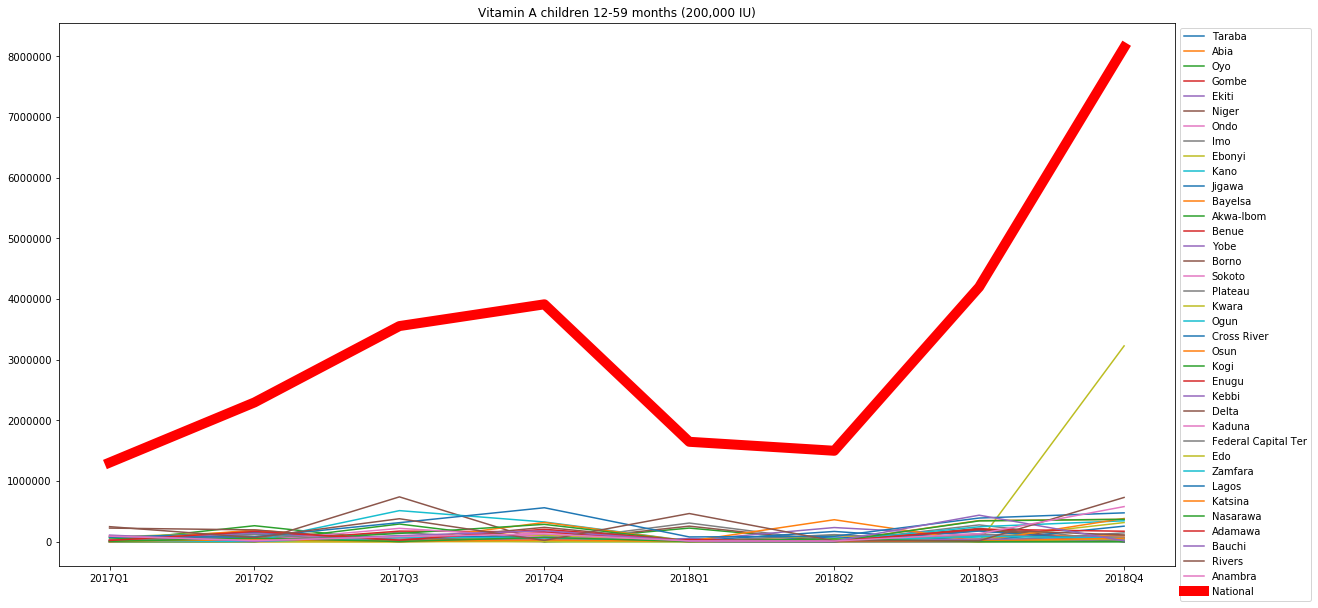

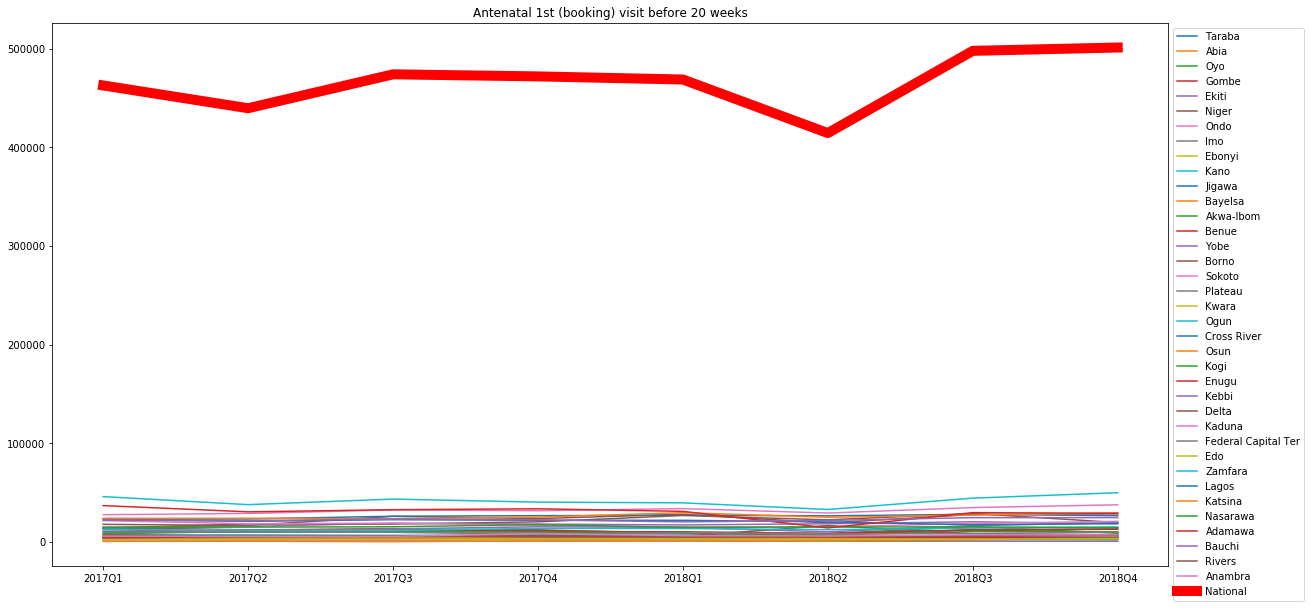

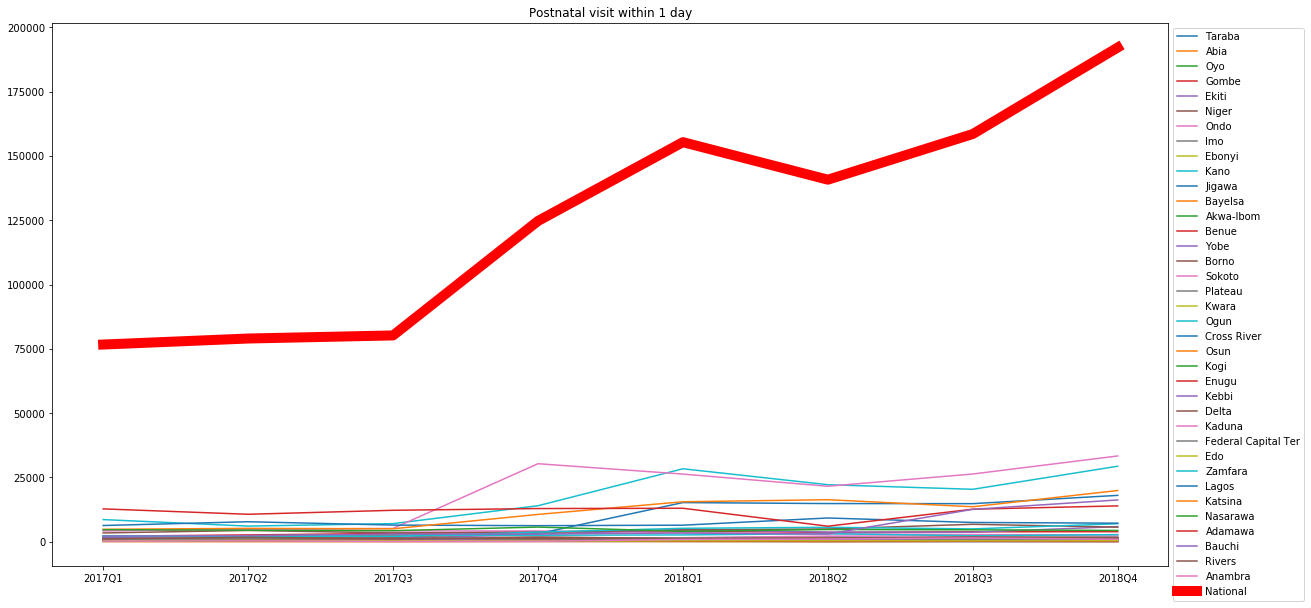

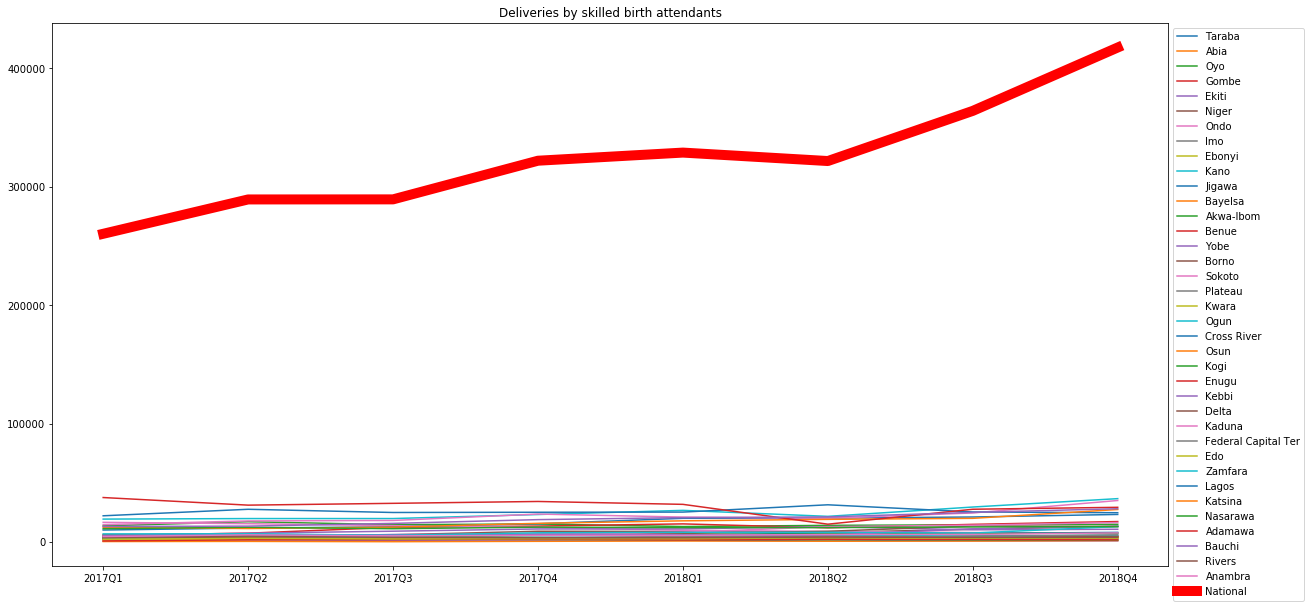

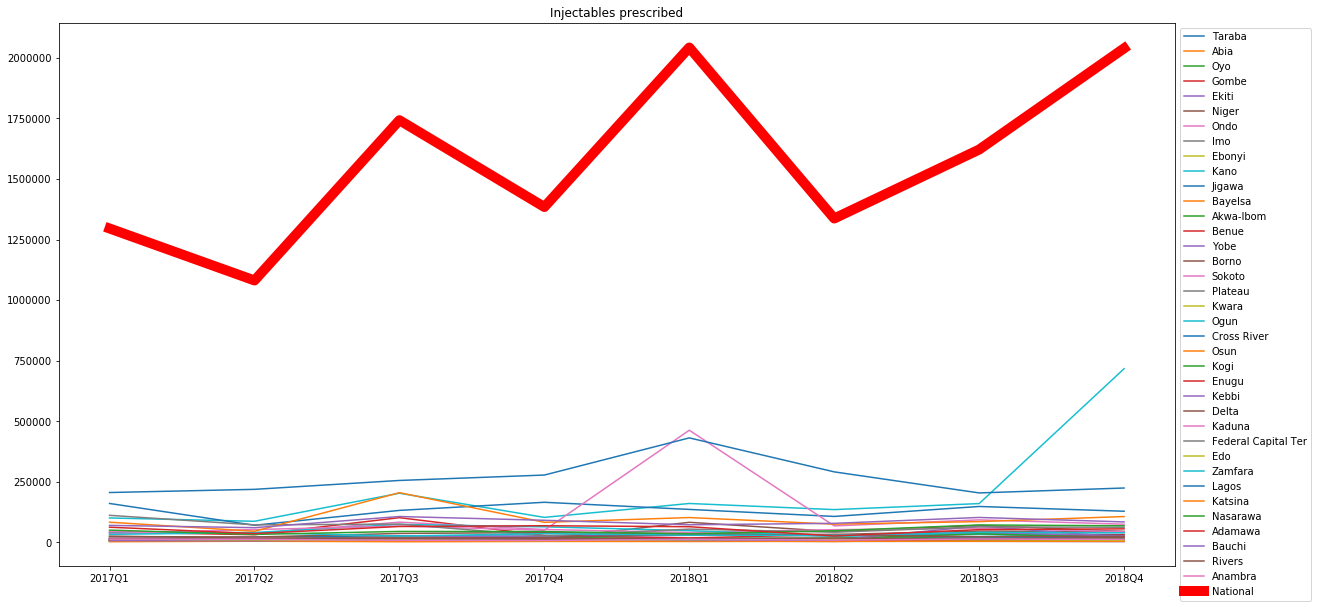

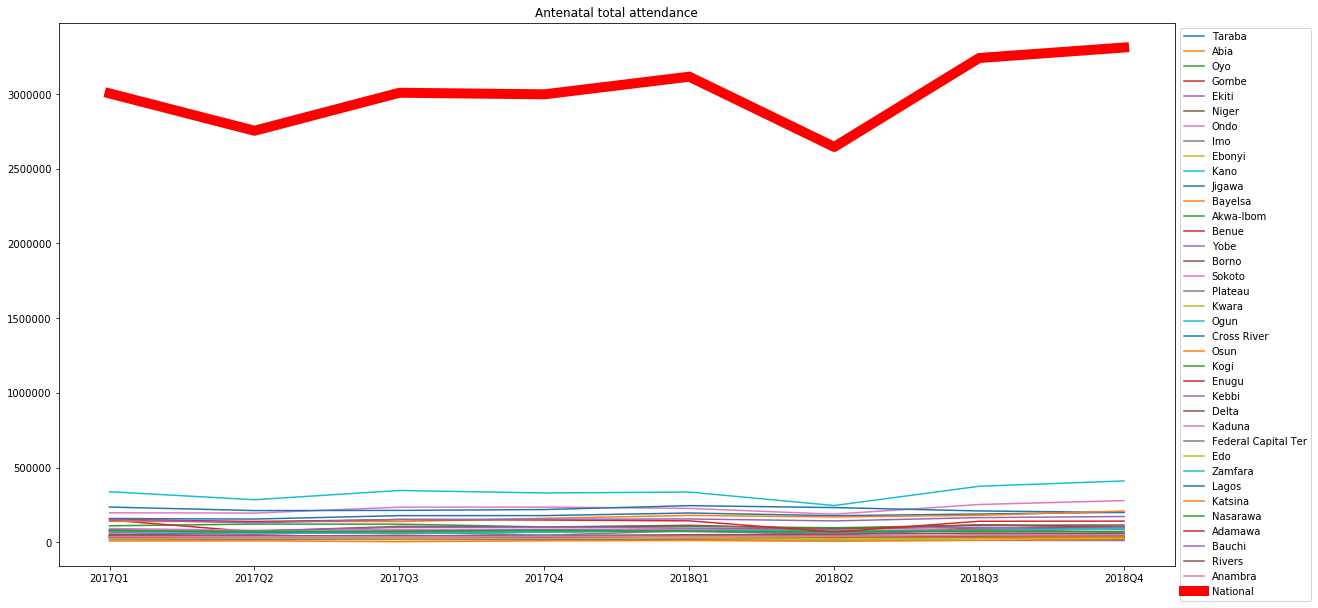

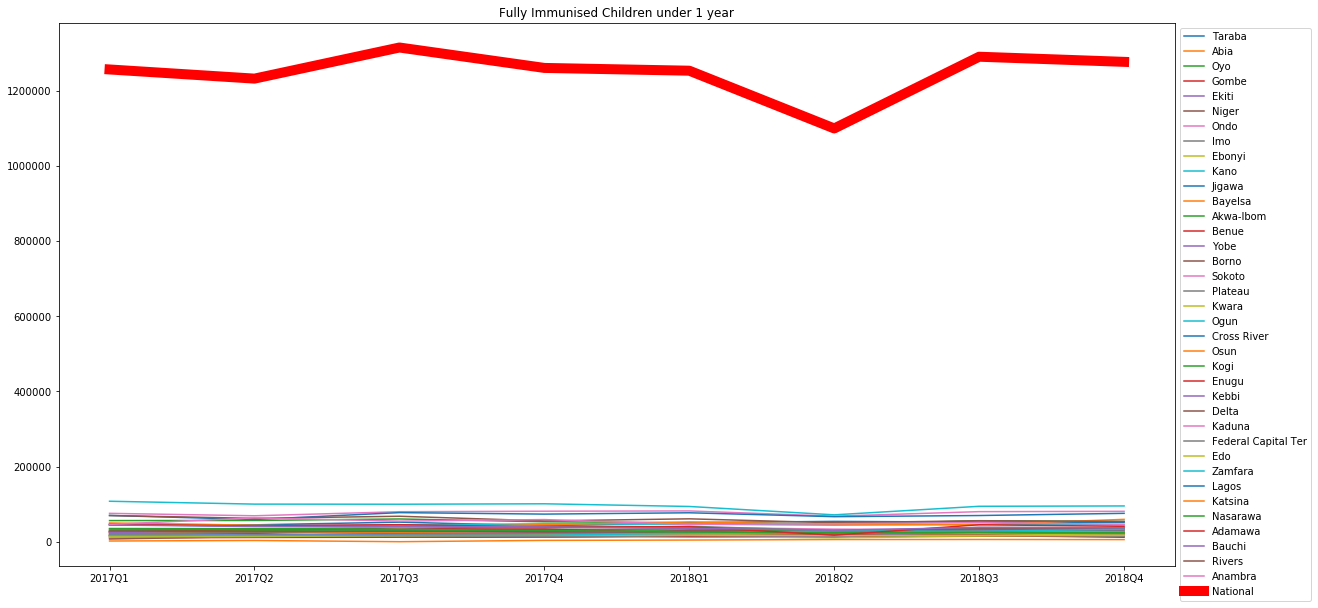

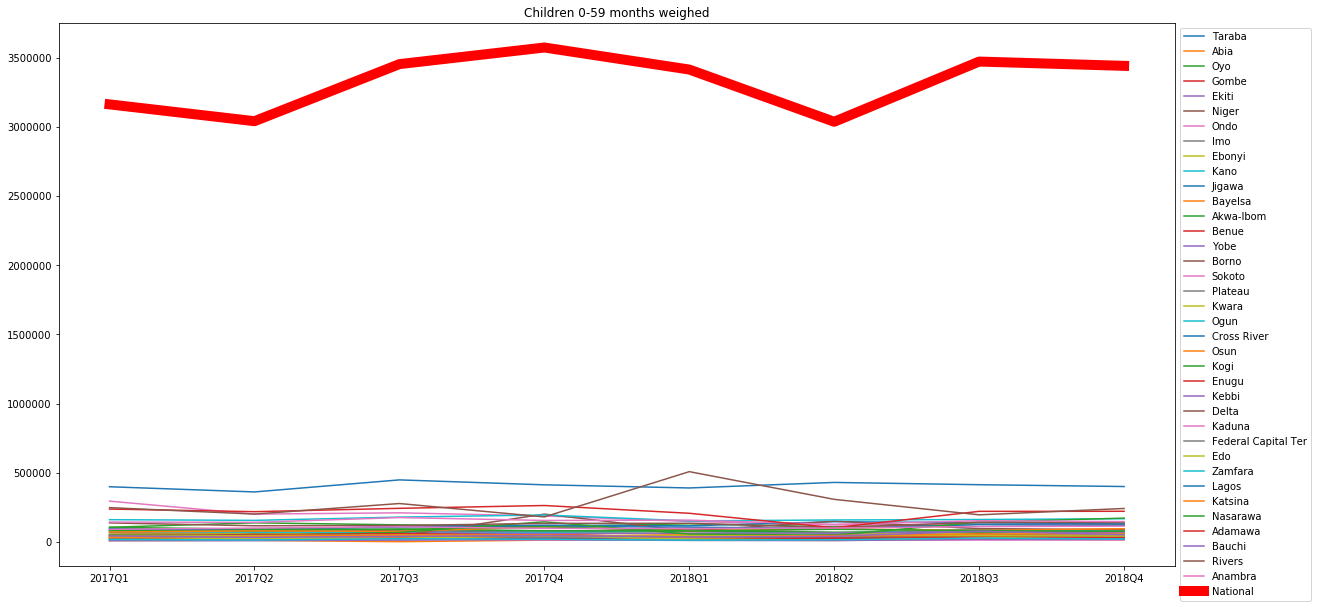

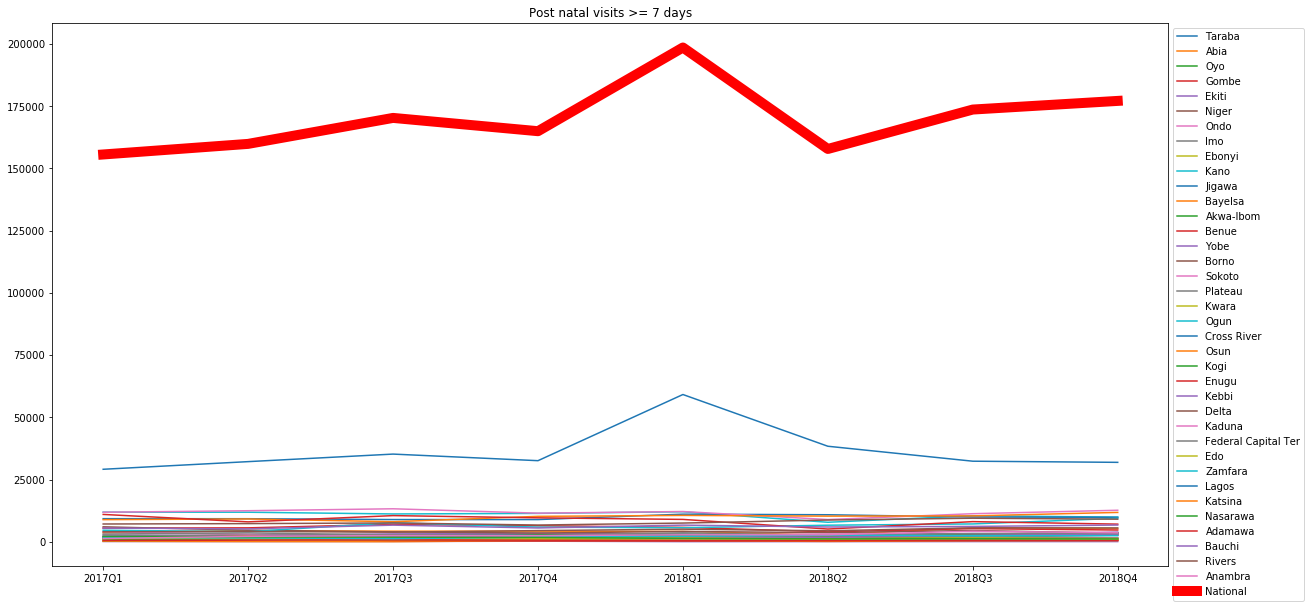

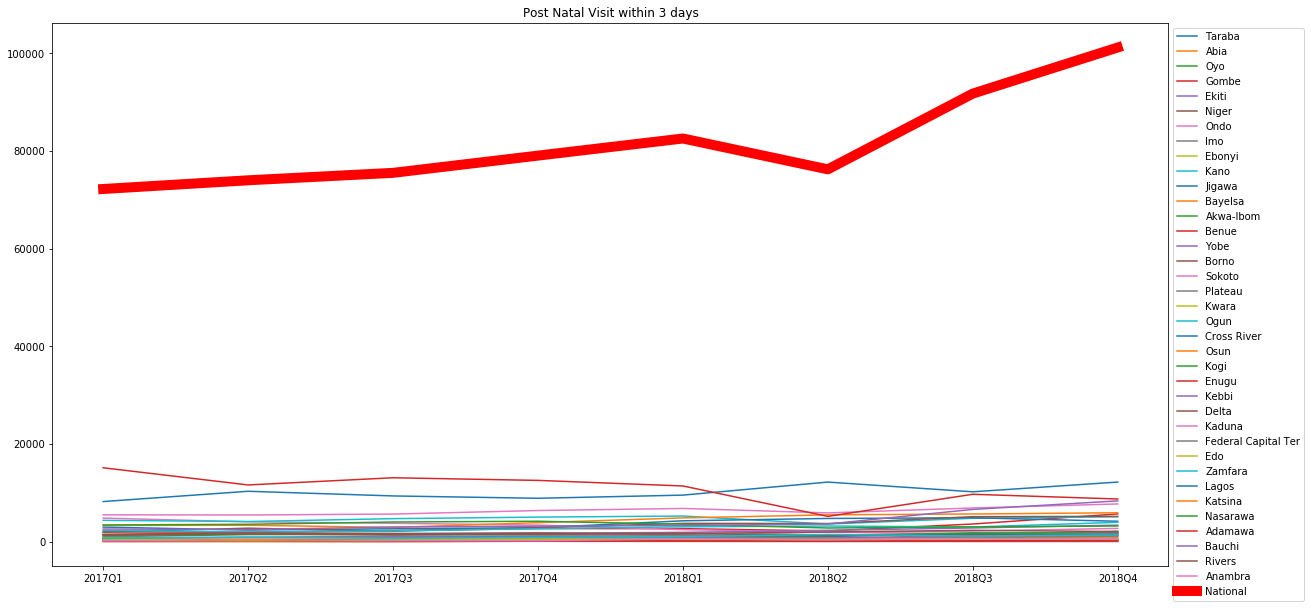

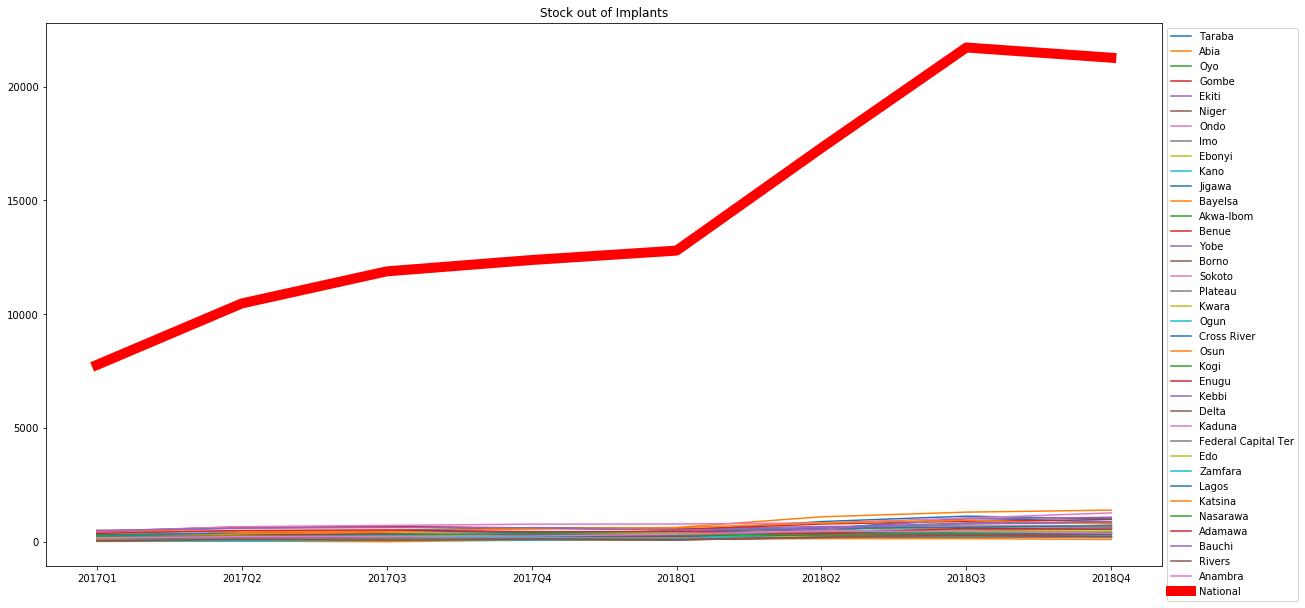

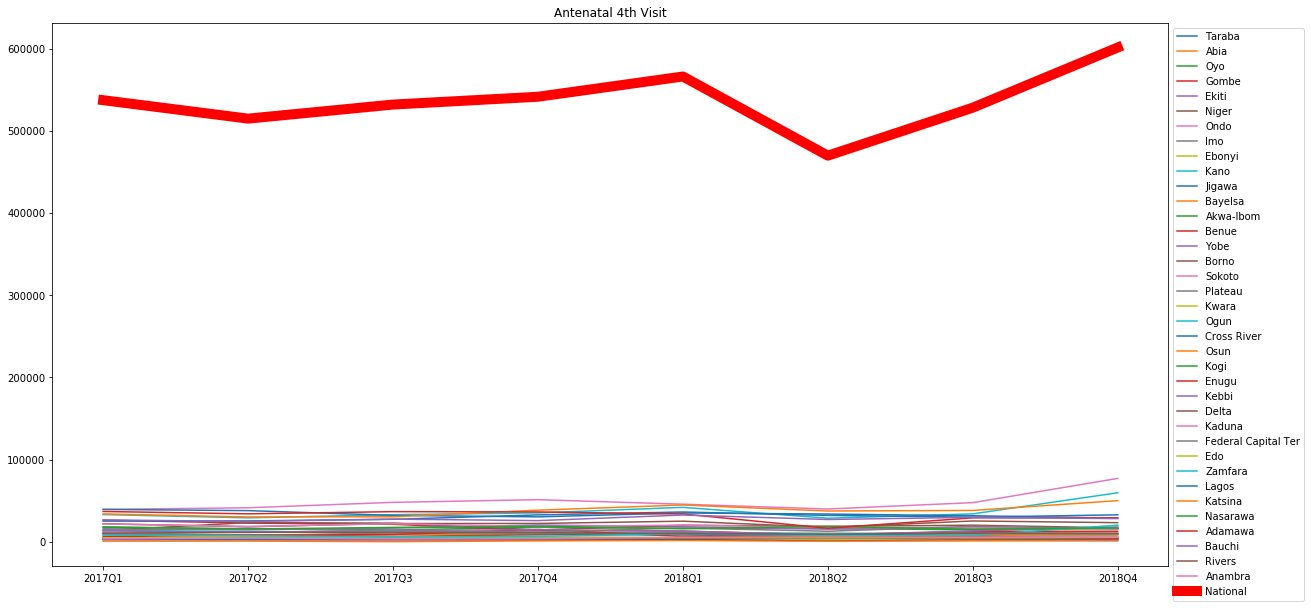

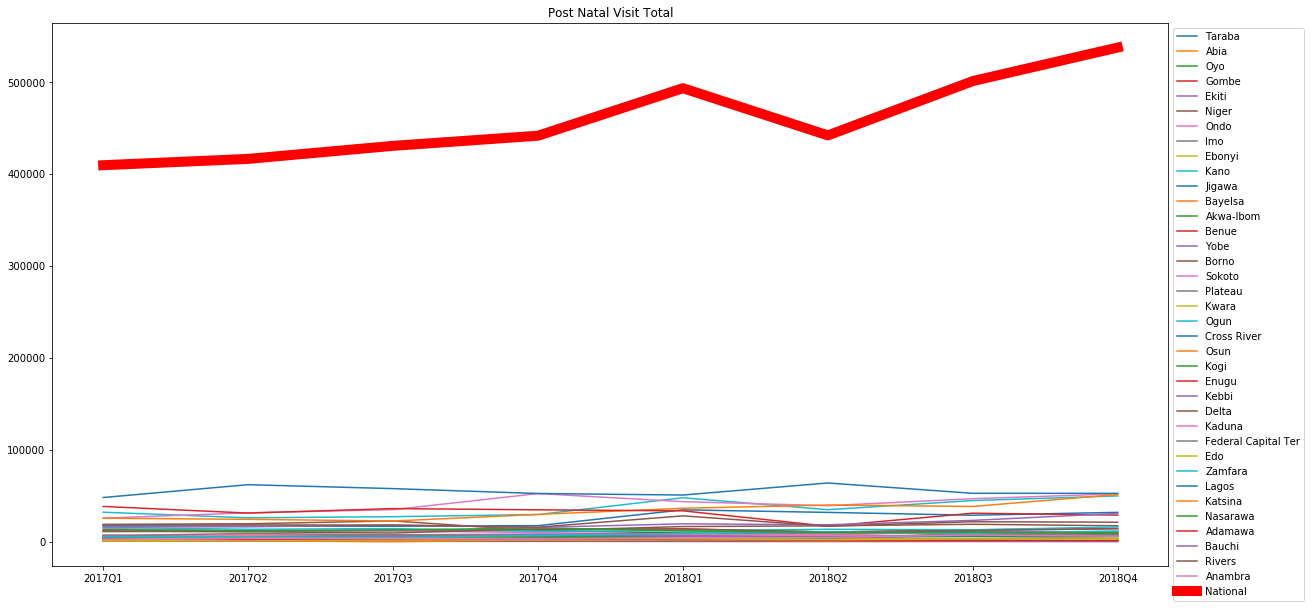

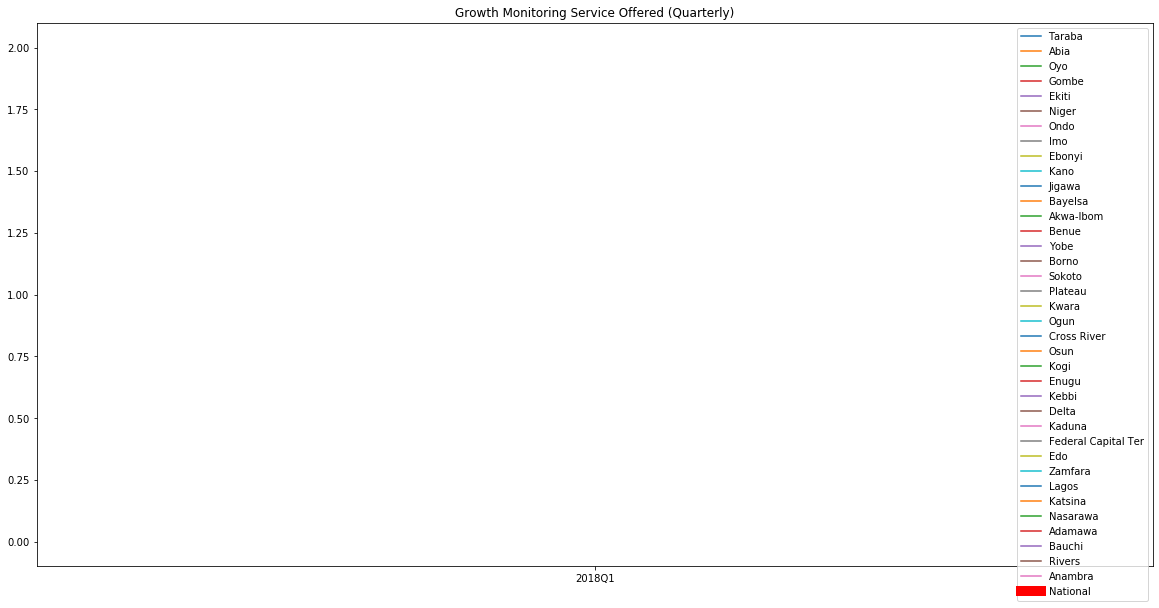

In [8]:
for de in hmis.de_name.unique():#.loc[hmis.de_name.isin(variable_dict.keys()),"de_name"].unique():
    plt.figure(figsize=(20,10))
    for state in hmis.state_name.unique():
        state_plot = hmis[(hmis.state_name == state) & (hmis.de_name == de)]
        state_plot = state_plot.sort_values("Period")
        plt.plot(state_plot.Period, state_plot.Value, label = state)  
    nat_plot = hmis[(hmis.de_name == de)].groupby("Period").sum()
    plt.plot(nat_plot, label = "National", color = "red", linewidth = 10)
    plt.title(de)
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()
    plt.close()

# Services Provision in PBF States

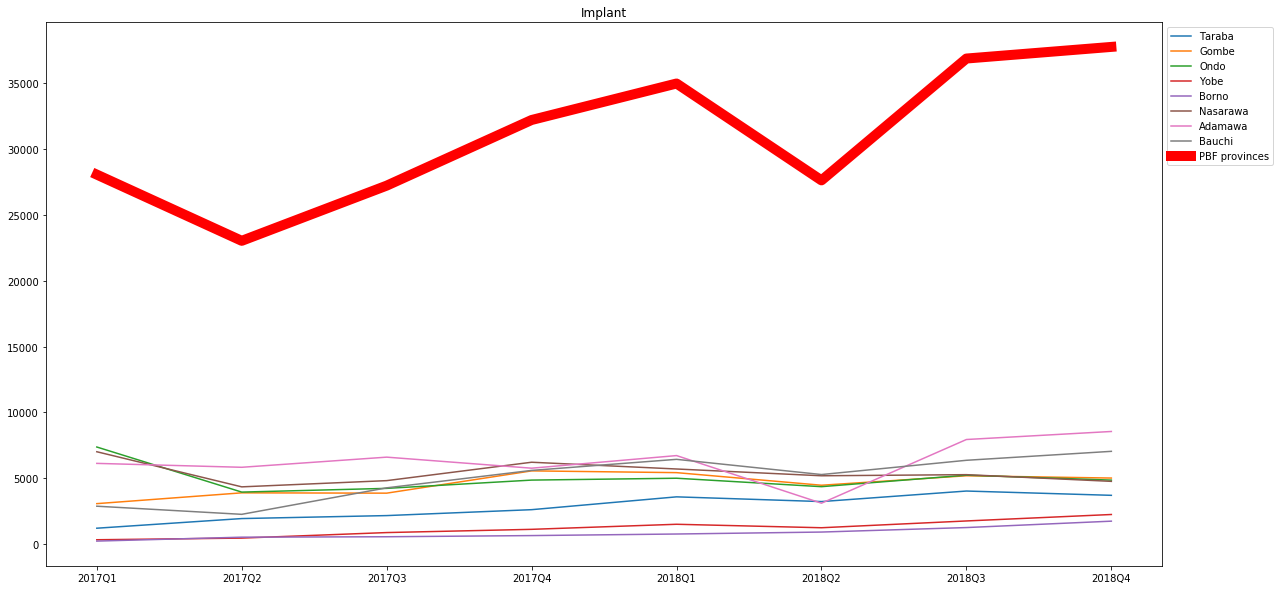

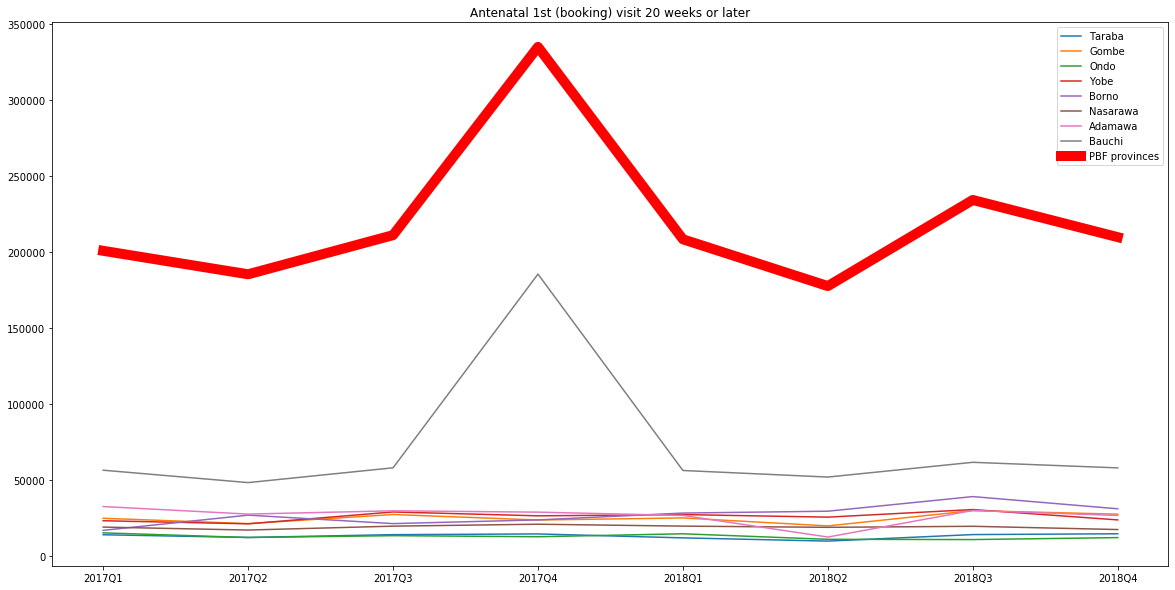

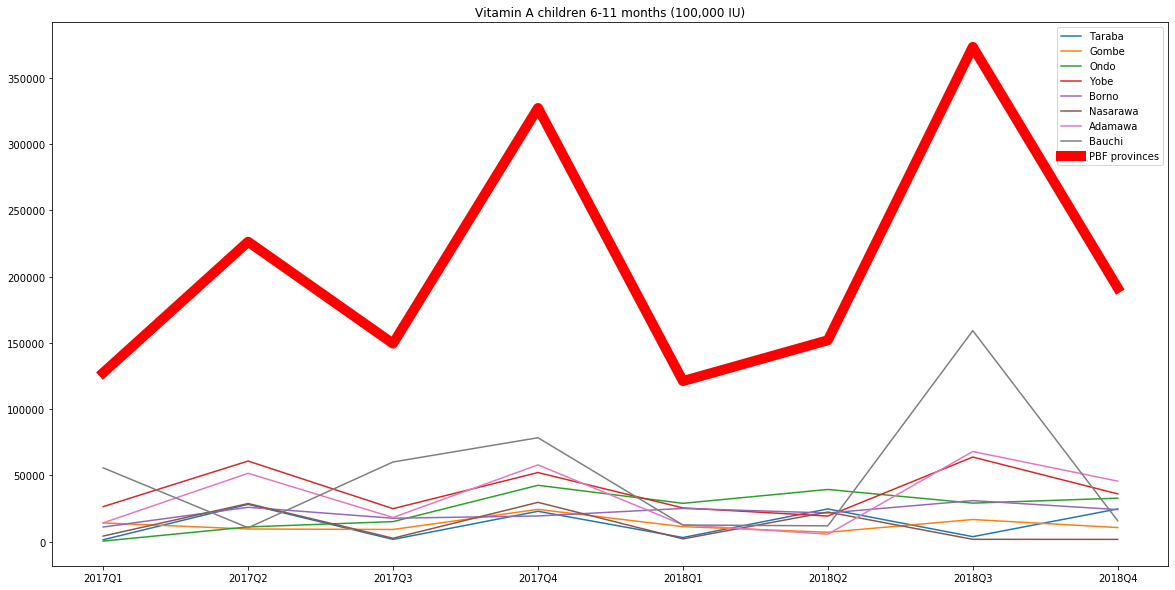

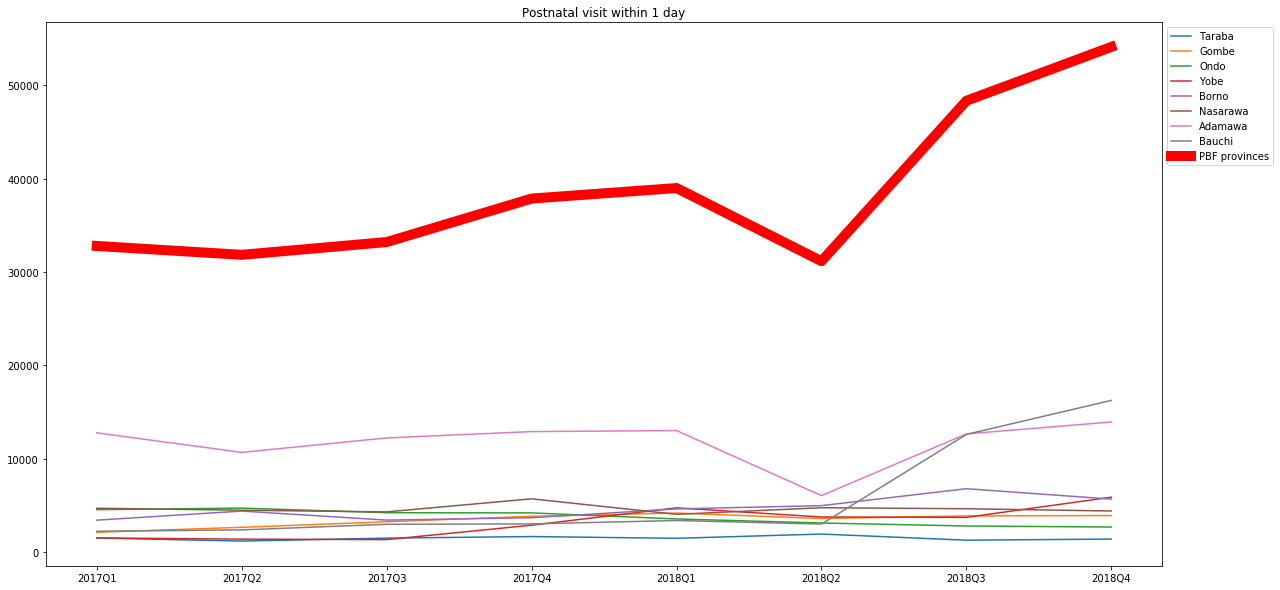

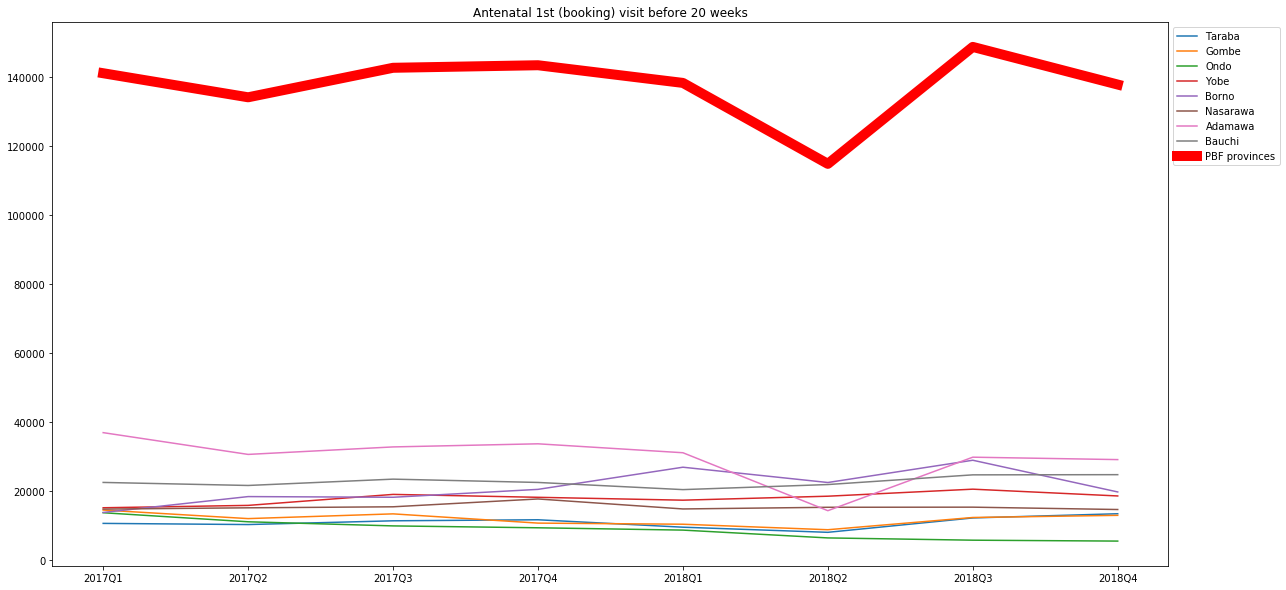

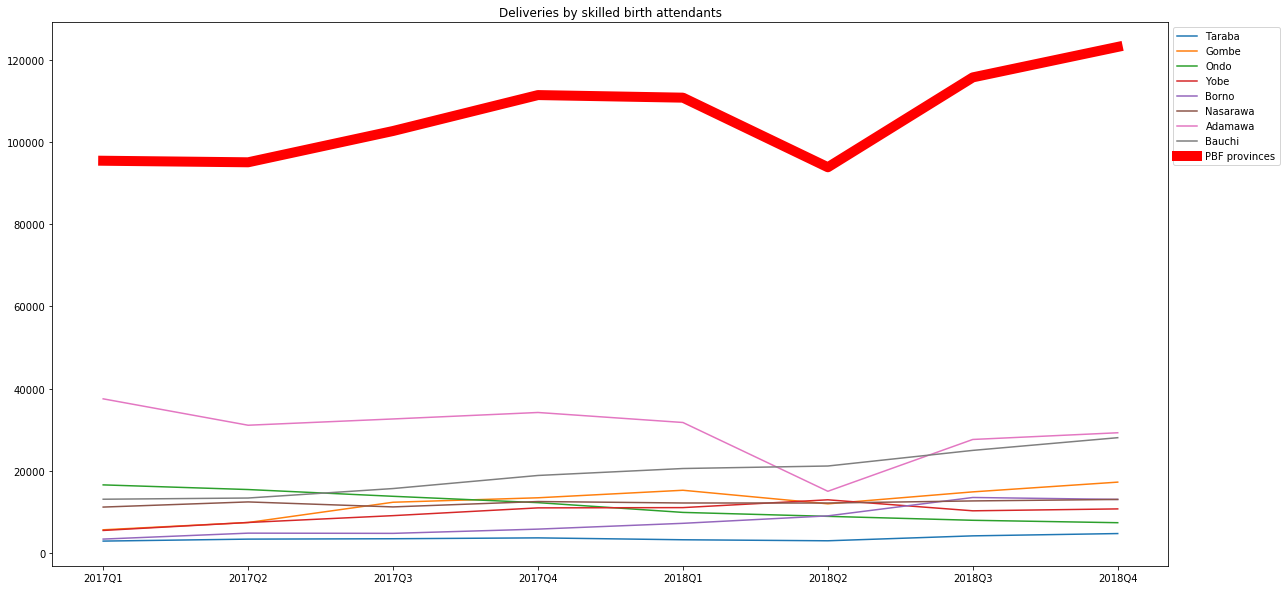

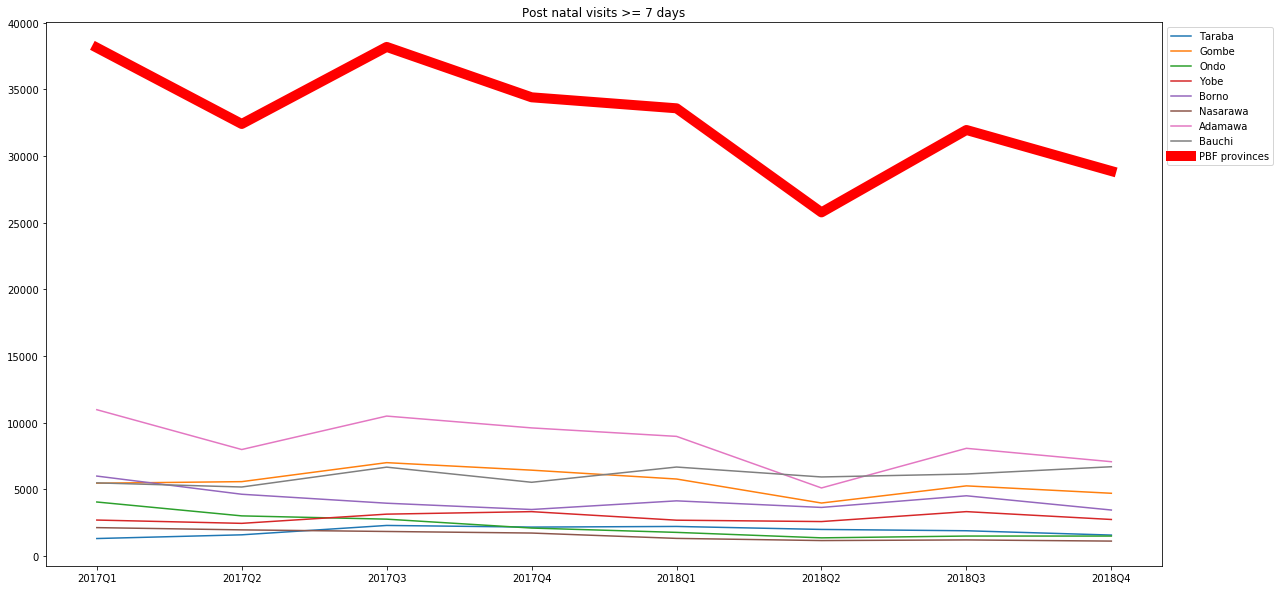

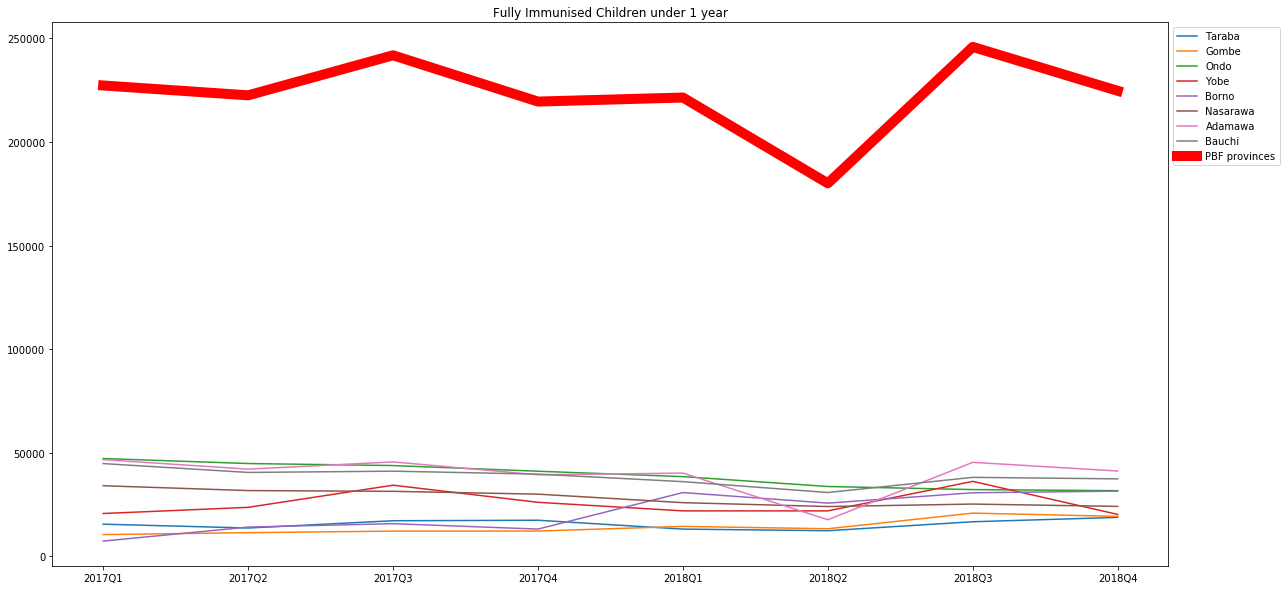

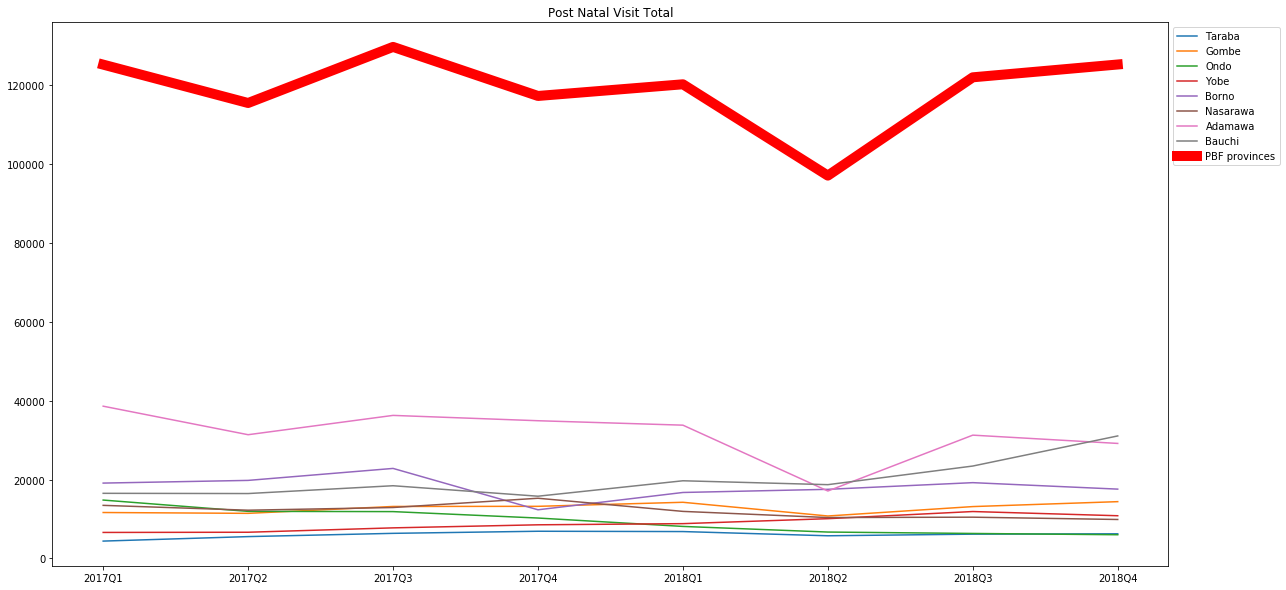

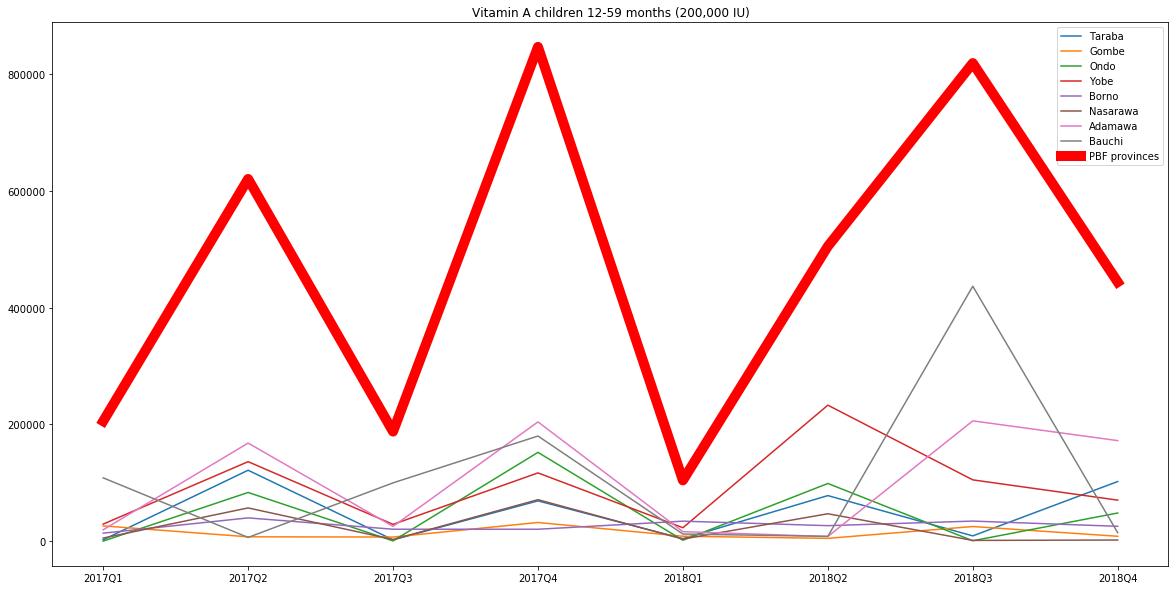

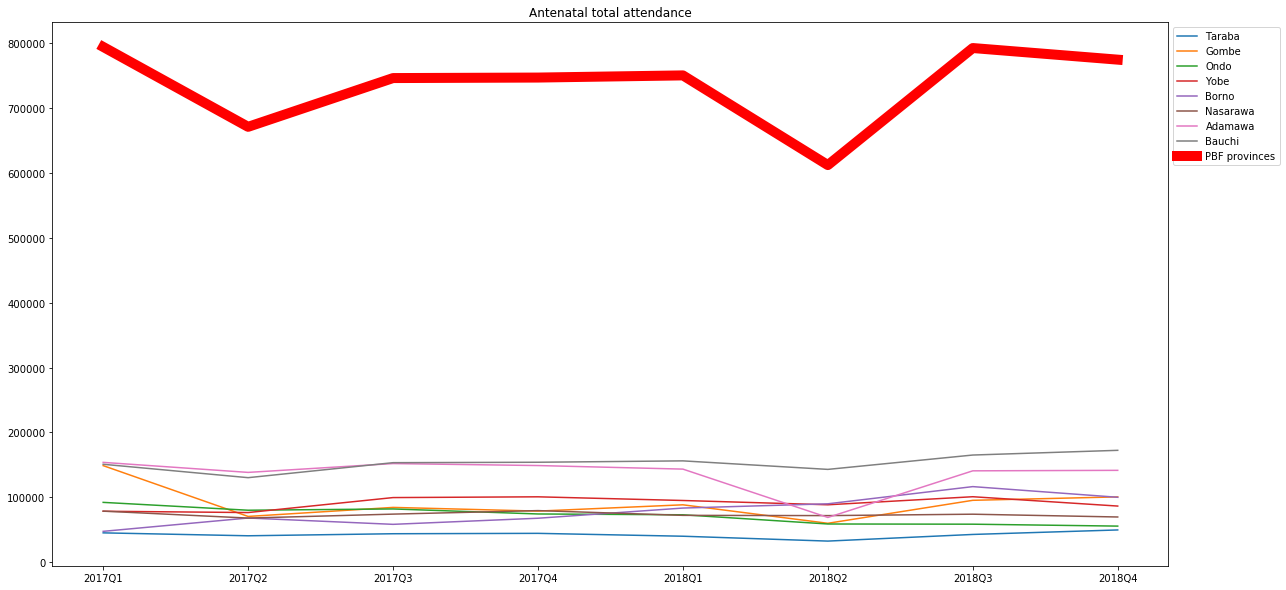

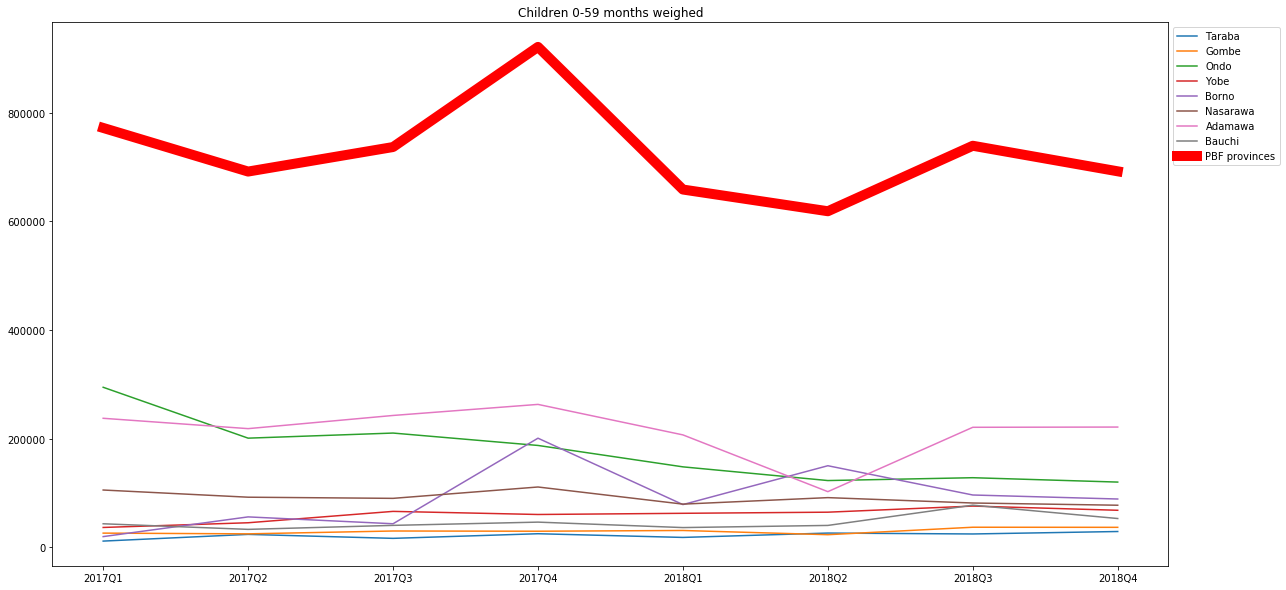

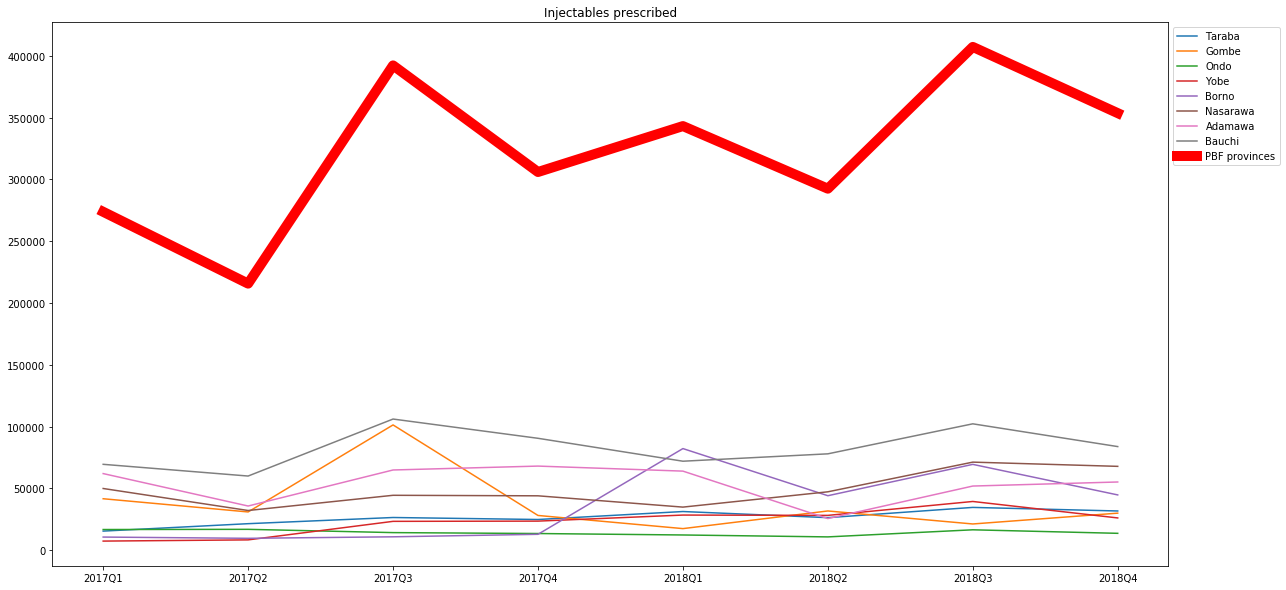

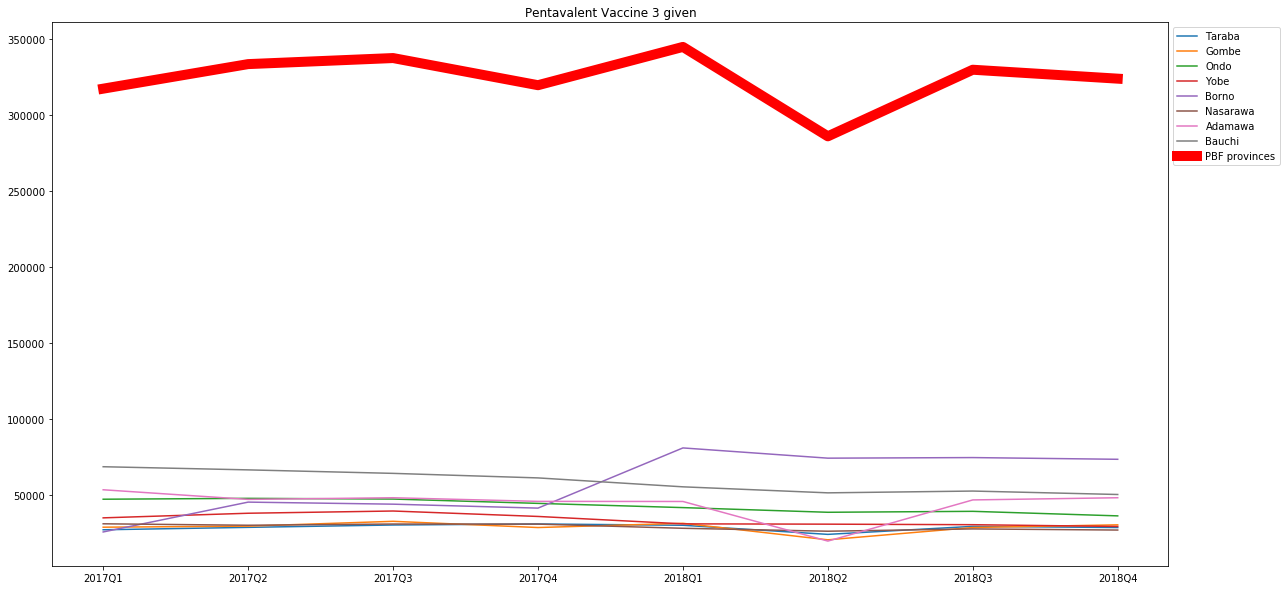

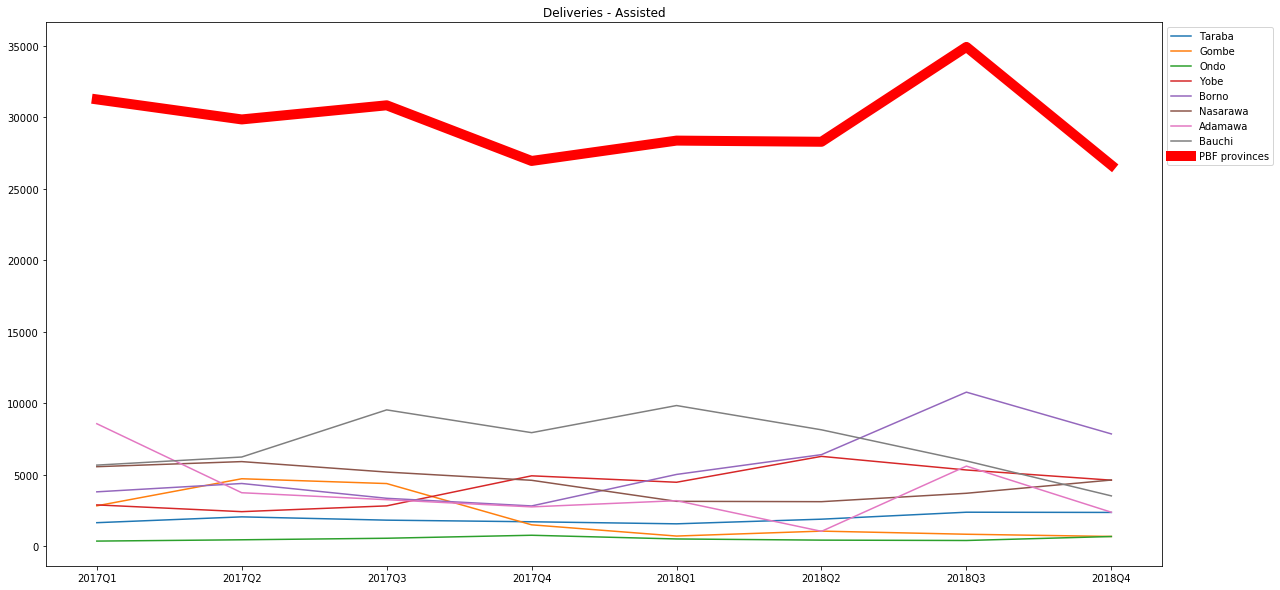

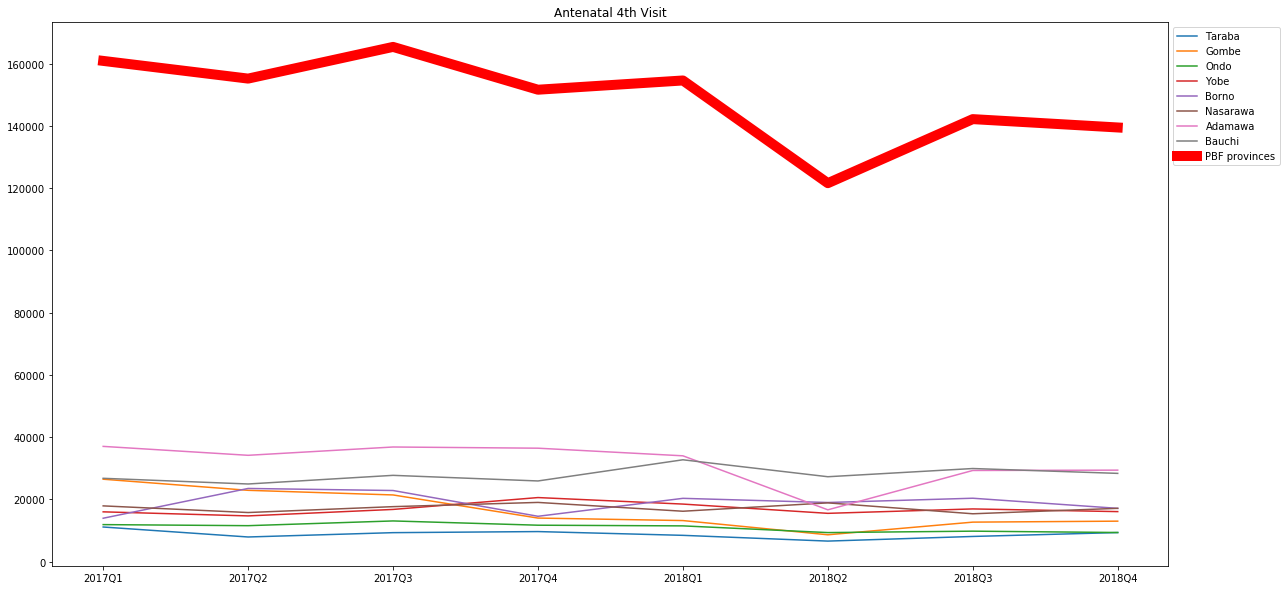

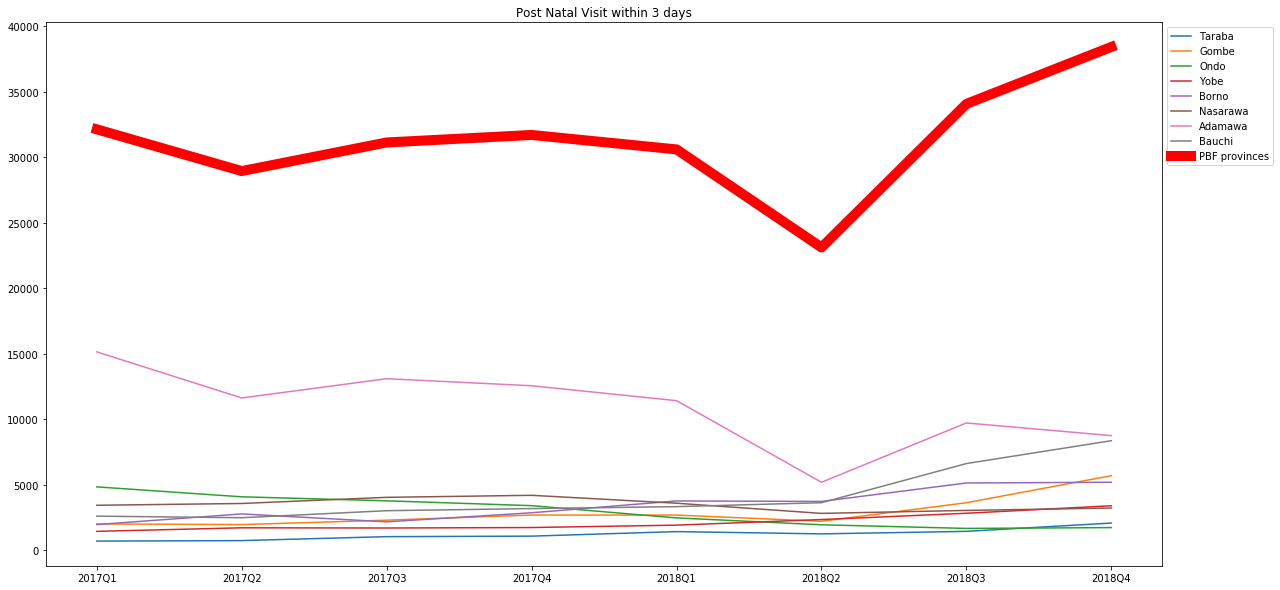

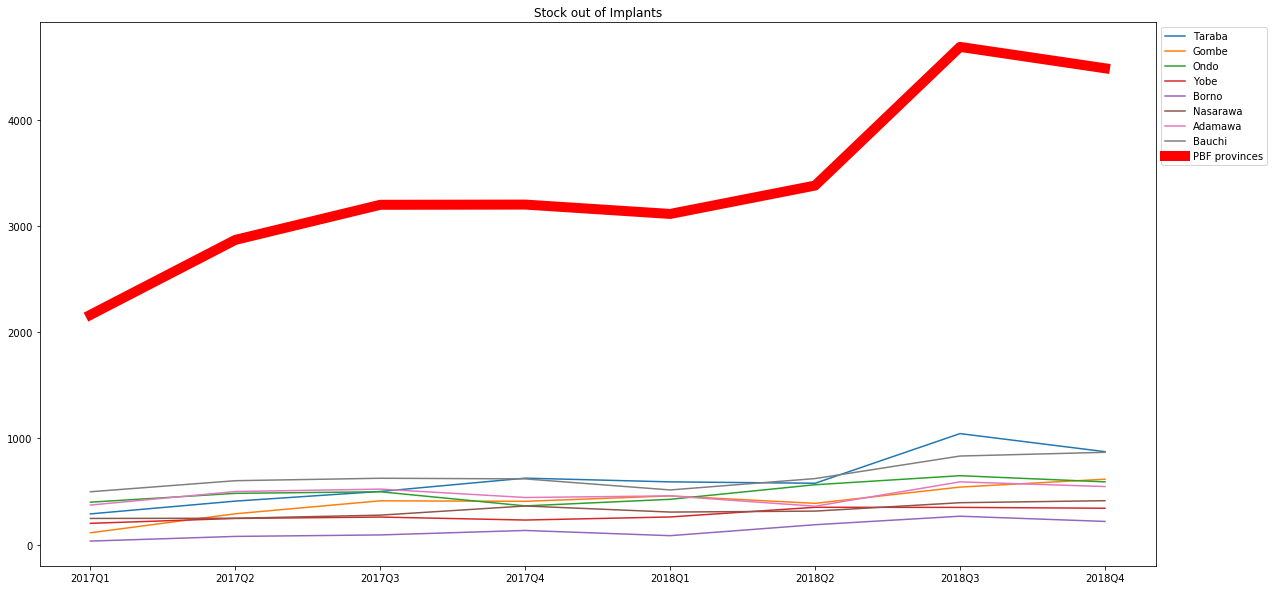

In [9]:
pbf_states = ["Bauchi", "Gombe", "Yobe", "Borno", "Taraba", "Ondo", "Nasarawa", "Adamawa"]
pbf_hmis = hmis[hmis.state_name.isin(pbf_states)]
for de in pbf_hmis.de_name.unique():
    plt.figure(figsize=(20,10))
    for state in pbf_hmis.state_name.unique():
        state_plot = pbf_hmis[(pbf_hmis.state_name == state) & (pbf_hmis.de_name == de)]
        state_plot = state_plot.sort_values("Period")
        plt.plot(state_plot.Period, state_plot.Value, label = state)  
    nat_plot = pbf_hmis[(pbf_hmis.de_name == de)].groupby("Period").sum()
    plt.plot(nat_plot, label = "PBF provinces", color = "red", linewidth = 10)
    plt.title(de)
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()
    plt.close()

# Share of PBF states in National services

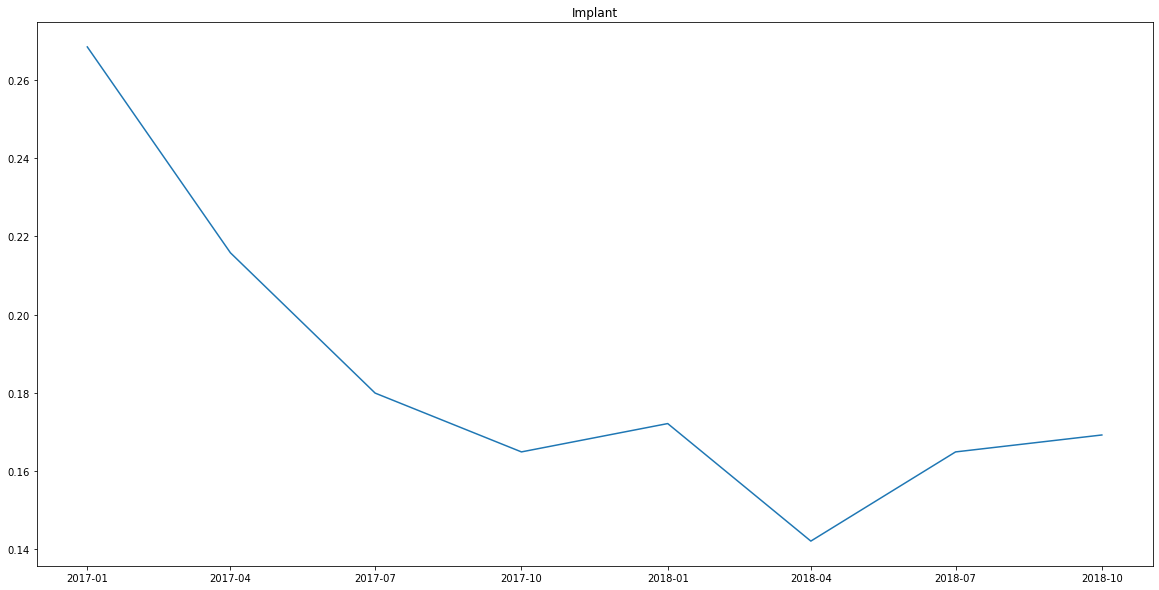

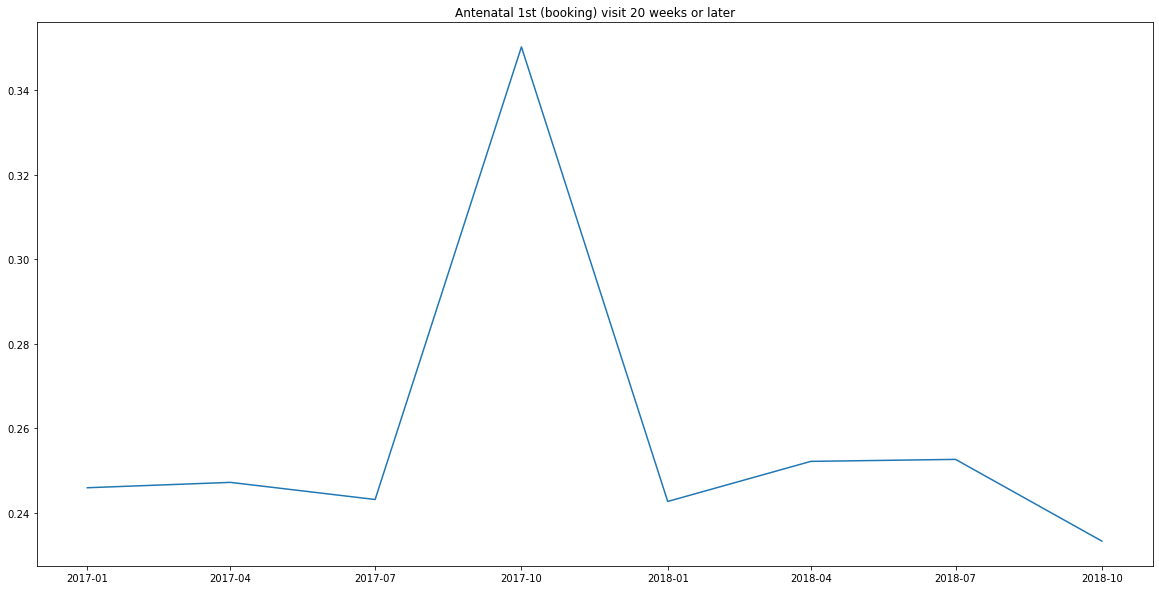

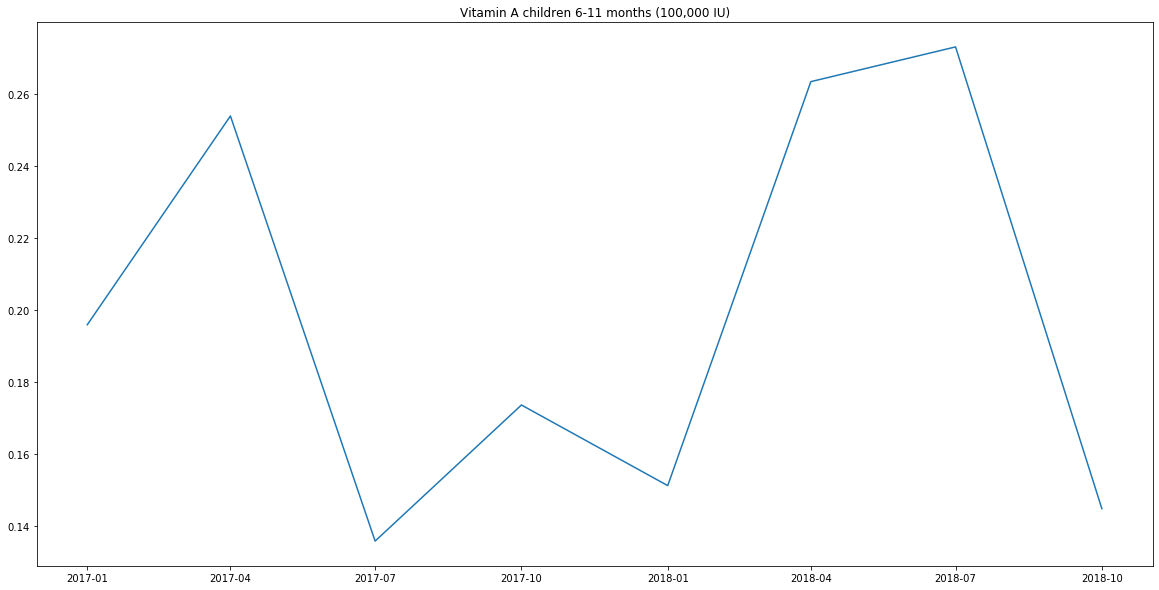

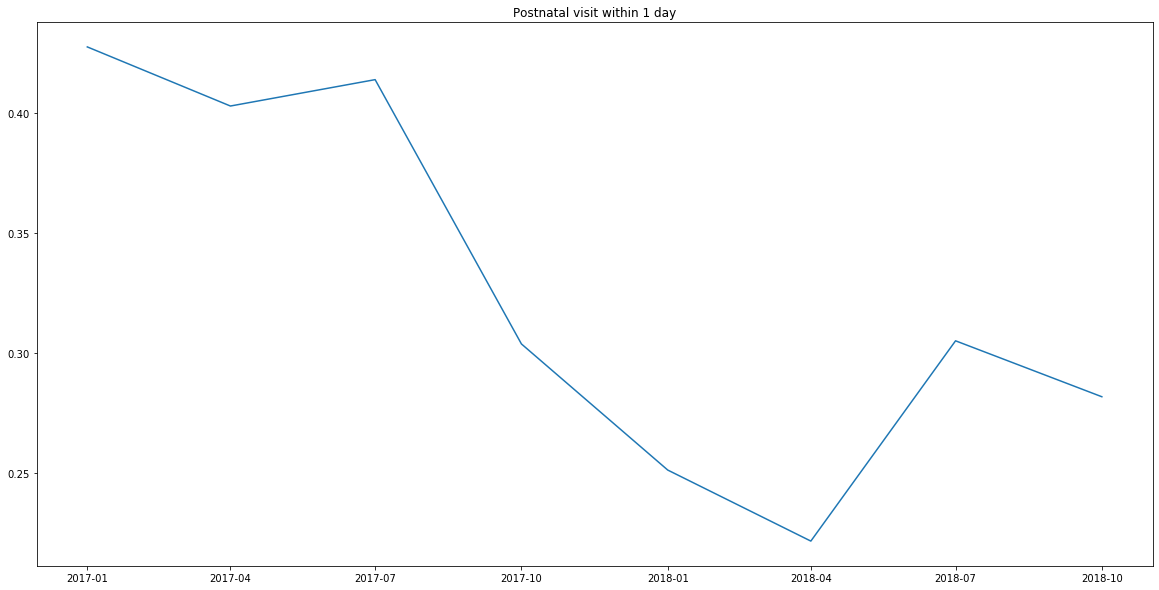

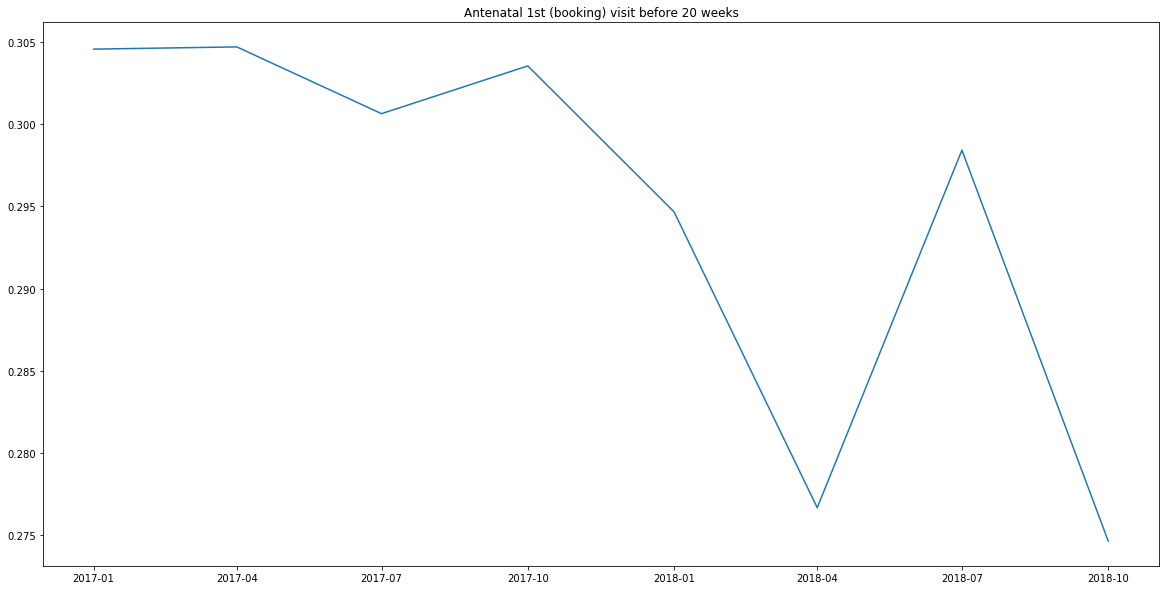

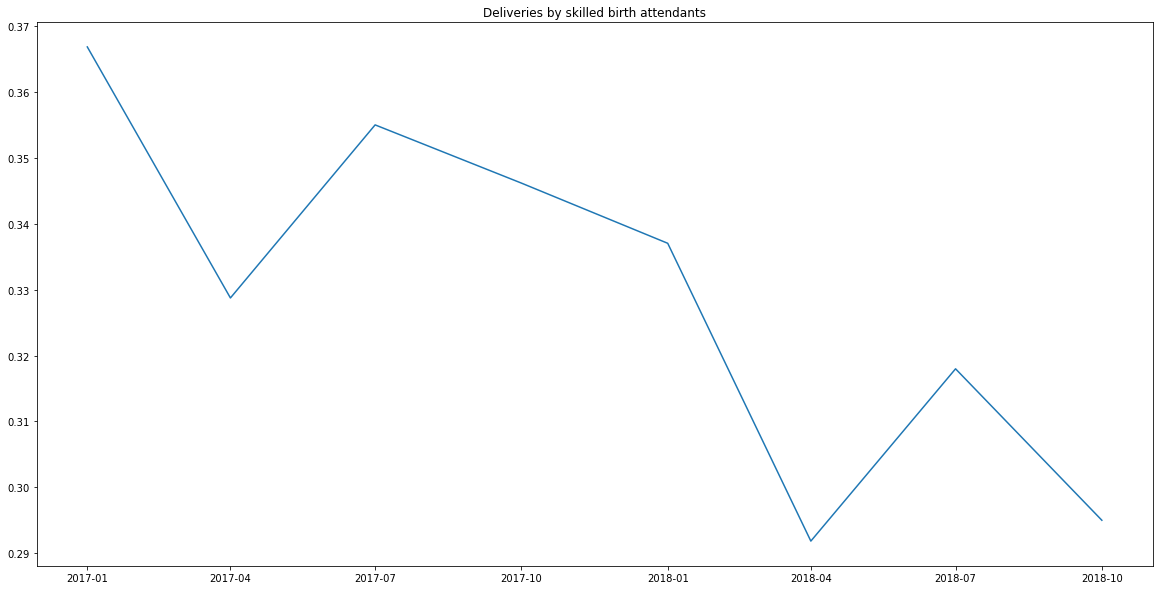

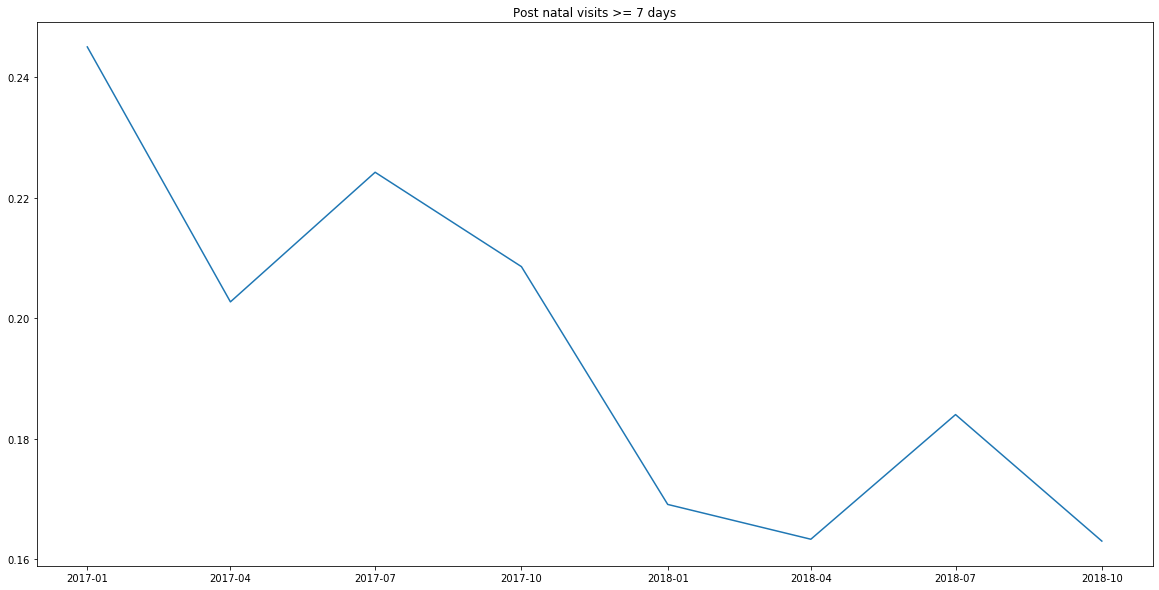

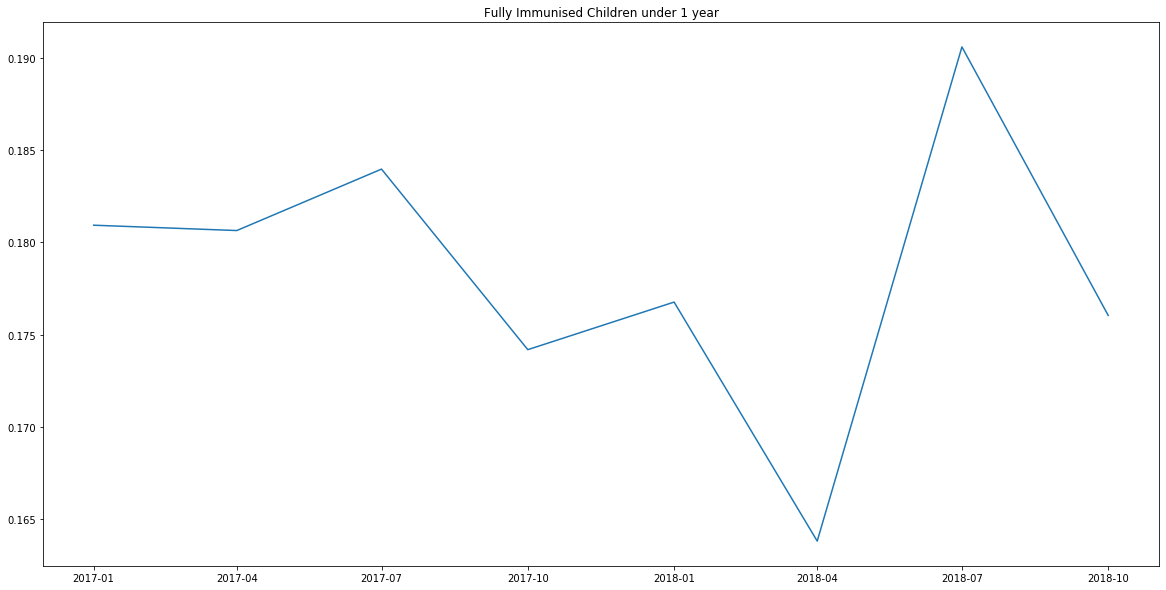

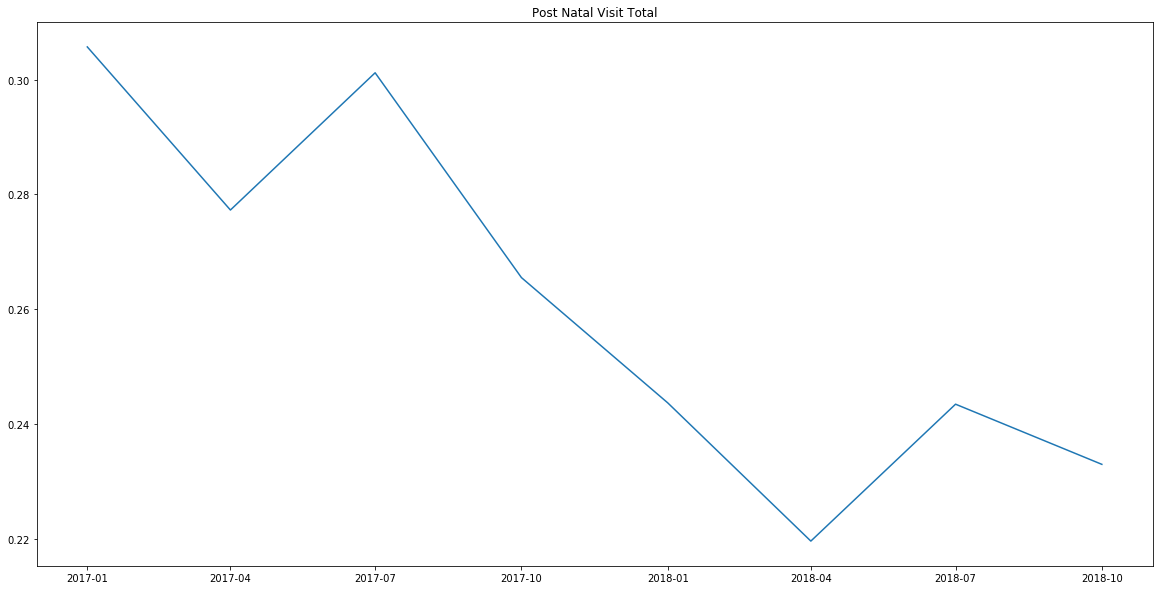

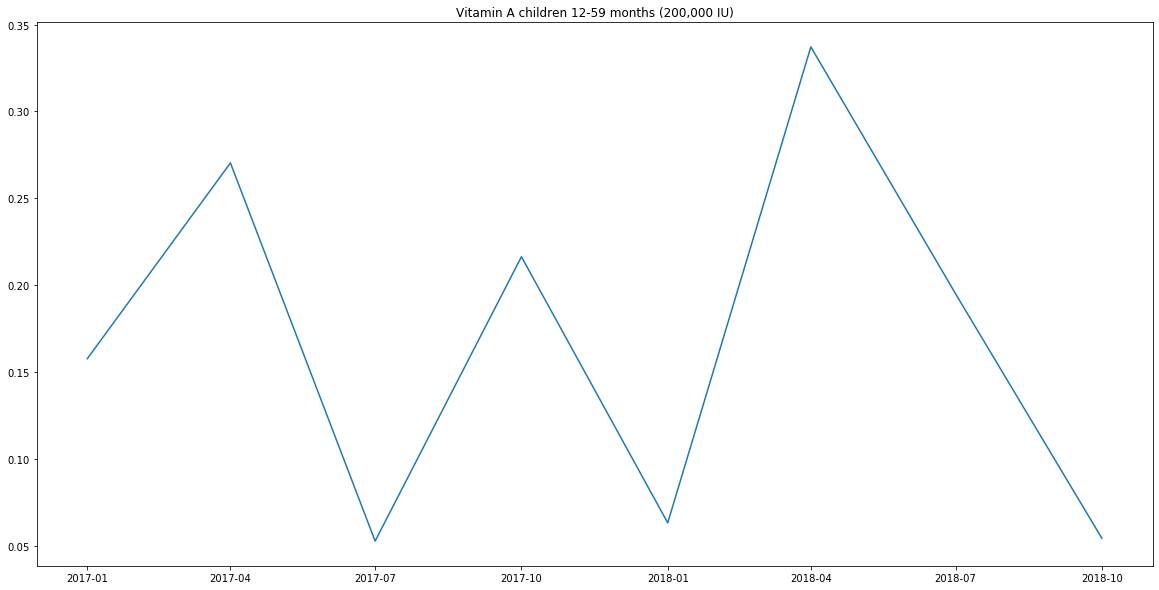

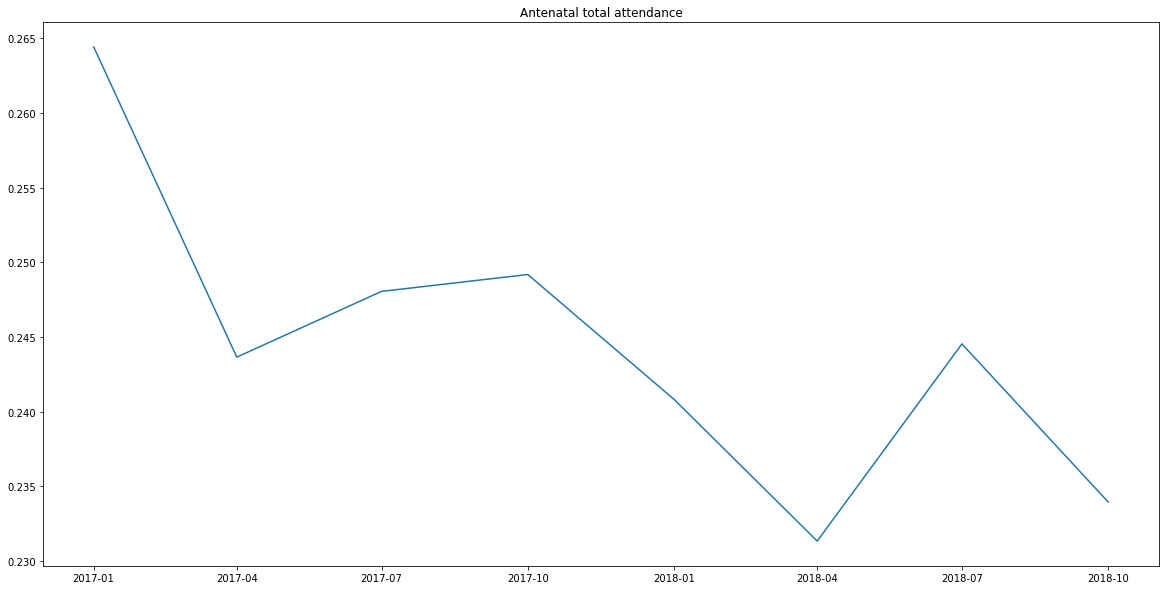

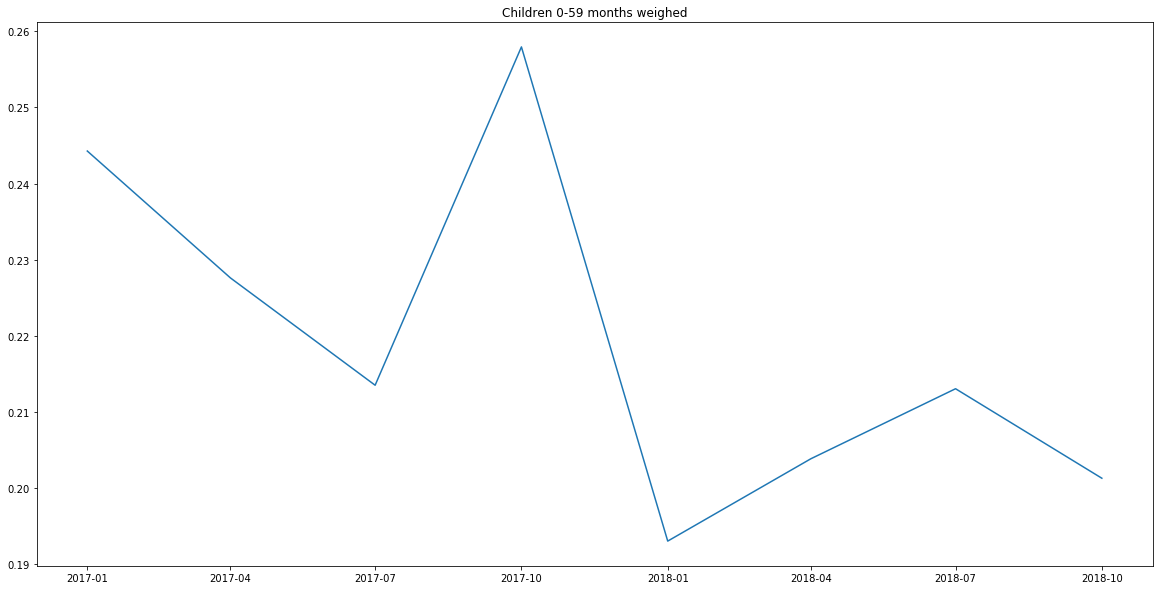

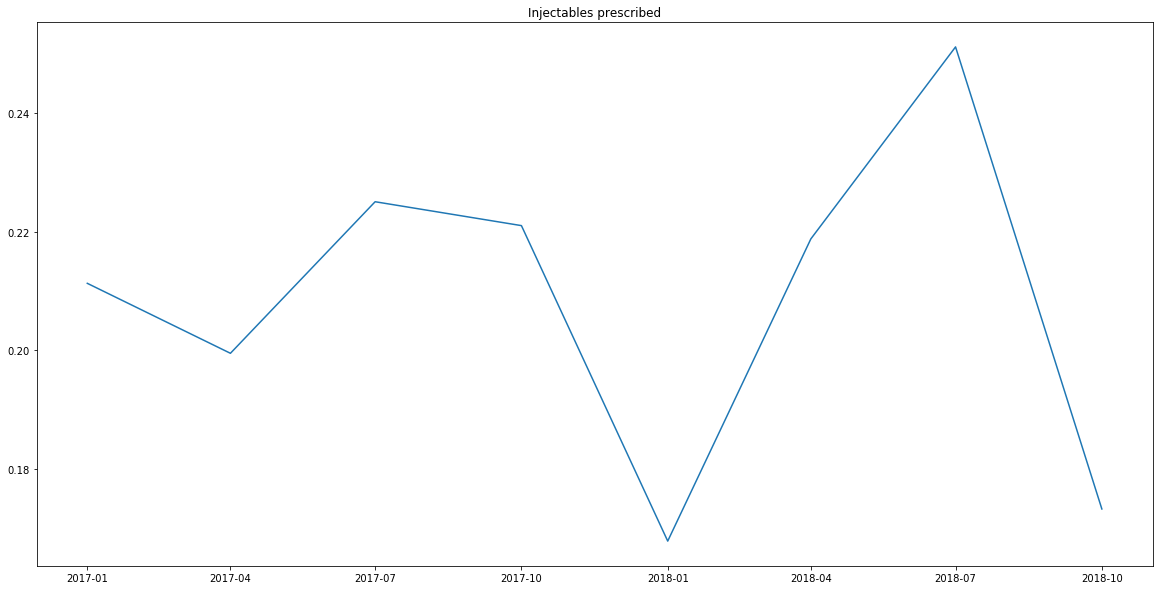

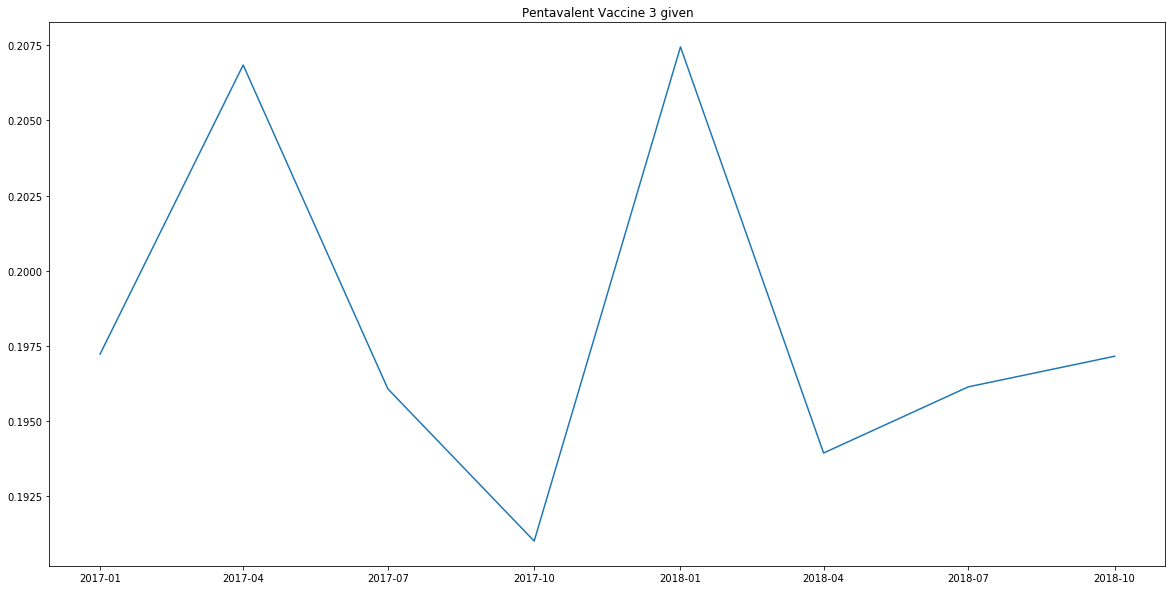

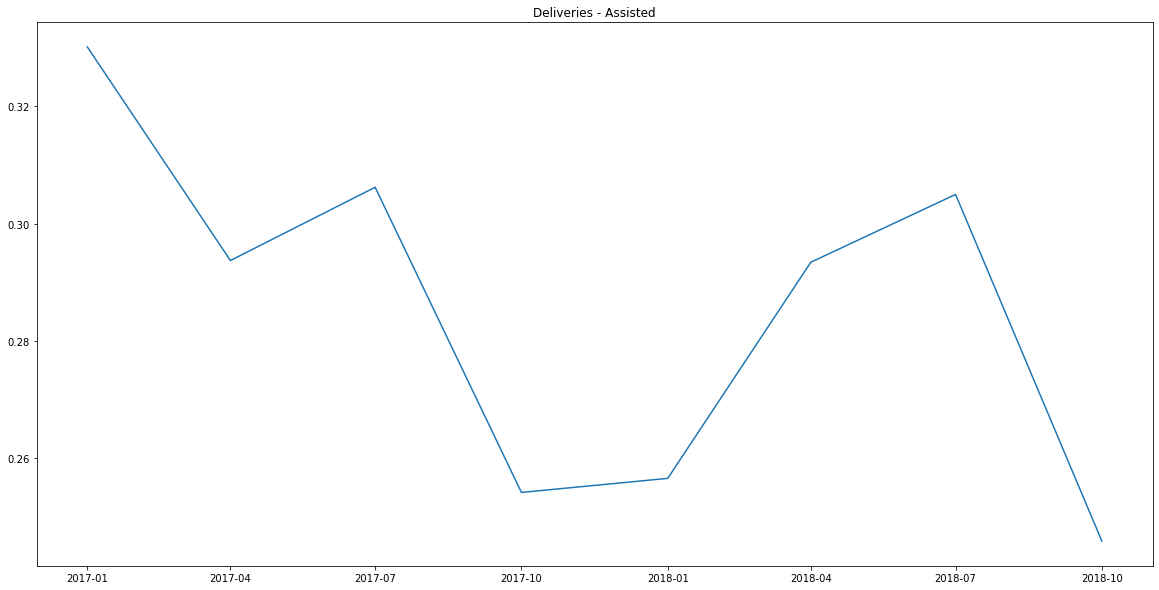

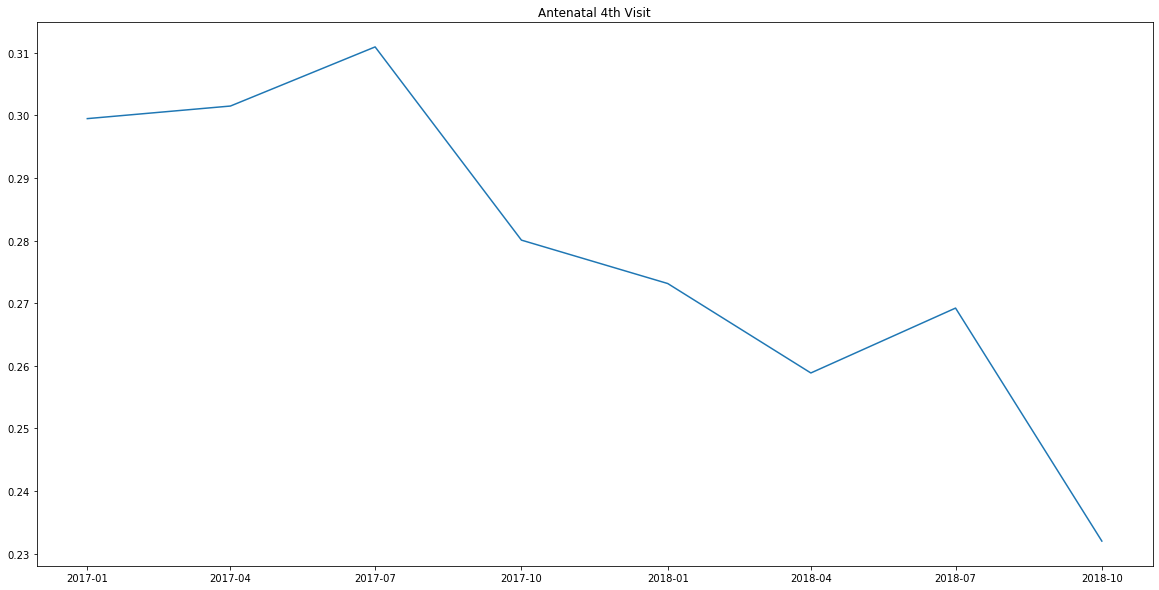

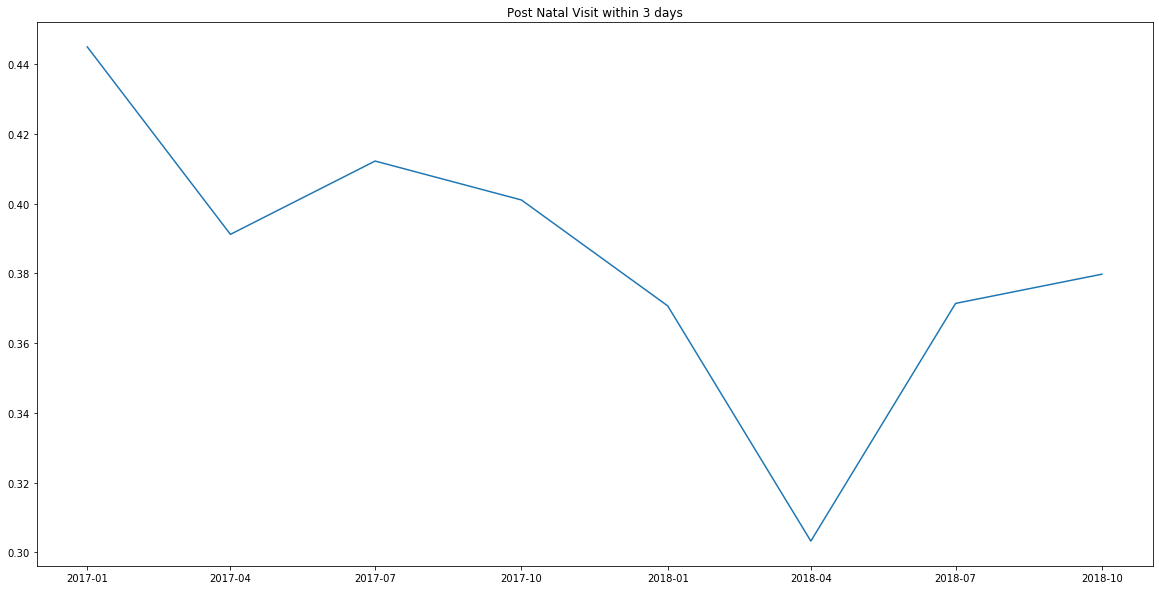

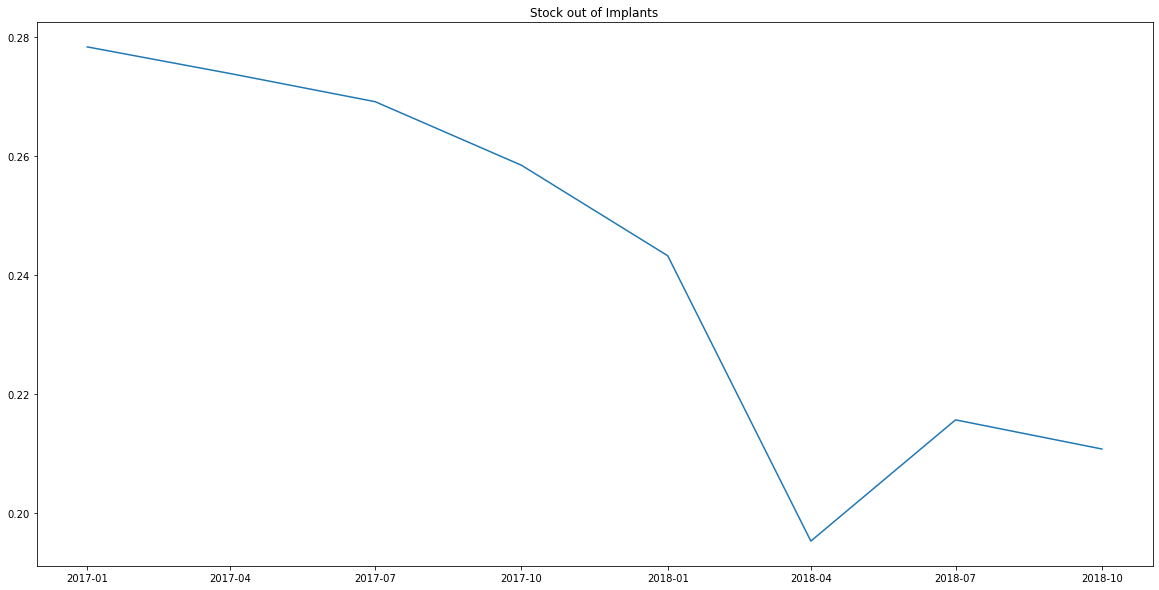

In [11]:
hmis.Period = pd.to_datetime(hmis.Period)
for de in pbf_hmis.de_name.unique():
    plt.figure(figsize=(20,10))
    share_plot = hmis[hmis.de_name == de].groupby("Period").apply(lambda x: x.loc[x.state_name.isin(pbf_states),"Value"].sum() / x.Value.sum())
    plt.plot(share_plot)  
    plt.title(de)
    plt.show()
    plt.close()